In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [57]:
import os
#os.listdir()

In [58]:
data = pd.read_csv('C:\\Users\\Darya\\Desktop\\№5 Lecture support materials, lectures, seminars, syllabus. Spring 2023-2024\\Seminar\\Introduction to Machine learning\\bank-additional-full.csv', header=0, sep = ';')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [59]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [60]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [61]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

After grouping, this is the columns

In [62]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

### Data exploration

In [63]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

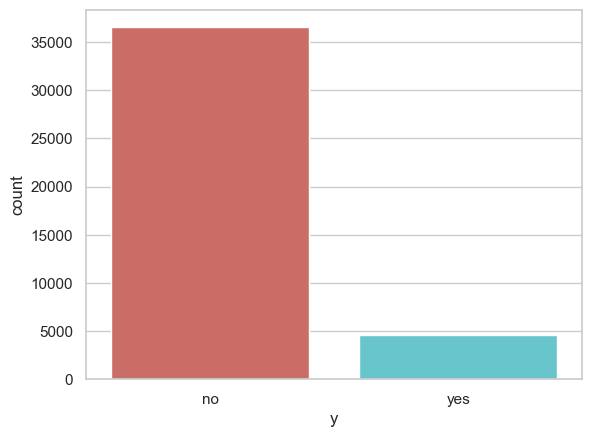

<Figure size 640x480 with 0 Axes>

In [64]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [65]:
data.groupby('y').mean()

TypeError: Could not convert housemaidservicesservicesadmin.servicesservicesadmin.blue-collartechnicianservicesblue-collarservicesblue-collarhousemaidblue-collarretiredblue-collarblue-collarblue-collarmanagementunemployedblue-collarretiredtechnicianadmin.techniciantechnicianself-employedtechnicianunknownadmin.technicianblue-collarmanagementblue-collarunknownservicestechnicianadmin.technicianmanagemententrepreneuradmin.admin.admin.technicianadmin.blue-collaradmin.blue-collaradmin.housemaidadmin.admin.blue-collartechnicianmanagementservicesunemployedtechnicianentrepreneurblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.admin.blue-collarmanagementmanagementadmin.unknownadmin.technicianservicesmanagementblue-collarblue-collarblue-collaradmin.technicianadmin.managementadmin.admin.admin.unknownadmin.unemployedblue-collarservicesmanagementadmin.technicianblue-collarservicesblue-collarservicesadmin.admin.serviceshousemaidadmin.entrepreneurtechnicianretiredunemployedservicesblue-collarmanagementblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collarservicestechnicianadmin.admin.admin.technicianretiredblue-collartechnicianblue-collarblue-collarmanagementmanagementhousemaidblue-collarservicesunemployedmanagementmanagementblue-collarunknownblue-collarblue-collaradmin.admin.blue-collarblue-collarentrepreneurservicesentrepreneurblue-collarblue-collarblue-collarblue-collartechnicianservicesmanagementblue-collarblue-collarblue-collarservicesentrepreneurservicesadmin.blue-collarmanagementblue-collarservicestechnicianadmin.servicesmanagementservicesadmin.servicesblue-collartechnicianblue-collaradmin.blue-collarmanagementtechnicianretiredblue-collaradmin.technicianblue-collarmanagementtechnicianblue-collarblue-collaradmin.blue-collaradmin.blue-collarservicesservicesblue-collaradmin.blue-collarstudentstudentunemployedservicesstudentstudenthousemaidadmin.retiredblue-collarhousemaidblue-collarblue-collarhousemaidservicesadmin.technicianservicestechniciantechnicianretiredtechnicianadmin.retiredblue-collaradmin.servicesmanagementadmin.self-employedadmin.blue-collaradmin.servicesmanagementretiredtechnicianmanagementservicestechnicianservicestechniciantechnicianblue-collarservicestechnicianblue-collarservicestechnicianservicesservicesblue-collarmanagementtechnicianadmin.admin.blue-collartechnicianadmin.admin.blue-collarself-employedstudentmanagementself-employedunemployedmanagementhousemaidadmin.housemaidblue-collarservicesblue-collartechnicianretiredblue-collartechnicianadmin.blue-collarblue-collarblue-collaradmin.blue-collarservicesmanagementadmin.technicianblue-collartechnicianself-employedblue-collaradmin.servicesunknownservicesblue-collarretiredunknownadmin.admin.blue-collarhousemaidadmin.blue-collarmanagementadmin.admin.blue-collarmanagementadmin.admin.retiredblue-collarservicesmanagementadmin.technicianservicestechnicianhousemaidadmin.admin.blue-collaradmin.servicesblue-collarmanagementself-employedservicesentrepreneurtechnicianblue-collarblue-collarmanagementmanagementservicesadmin.unknownblue-collartechnicianservicesblue-collarentrepreneurblue-collarblue-collartechnicianmanagementservicesadmin.unemployedblue-collarblue-collarservicesentrepreneurunemployedmanagementtechnicianblue-collaradmin.technicianself-employedadmin.blue-collarmanagementblue-collarblue-collaradmin.blue-collarservicesblue-collartechnicianadmin.admin.admin.blue-collaradmin.managementstudentmanagementmanagementself-employedhousemaidretiredmanagementadmin.admin.admin.technicianservicesblue-collarself-employedblue-collarservicesservicesblue-collarunemployedblue-collarentrepreneurservicesadmin.servicesblue-collaradmin.technicianblue-collarretiredentrepreneurblue-collarself-employedadmin.servicestechnicianblue-collarentrepreneurblue-collarmanagementblue-collarblue-collarmanagementtechnicianunknownservicesself-employedself-employedself-employedservicesservicestechnicianhousemaidblue-collaradmin.managementtechnicianhousemaidblue-collarmanagementadmin.blue-collartechniciantechnicianblue-collartechnicianstudentmanagementadmin.technicianadmin.managementunemployedhousemaidblue-collaradmin.technicianself-employedblue-collarservicesadmin.managementmanagementadmin.technicianmanagementadmin.admin.blue-collarblue-collarunknownblue-collarretiredmanagementtechnicianservicesretiredunknownmanagementadmin.admin.technicianhousemaidtechniciantechnicianunemployedservicesblue-collaradmin.servicestechnicianadmin.admin.admin.entrepreneuradmin.admin.servicesentrepreneurtechnicianunknowntechnicianblue-collarblue-collarentrepreneurmanagementservicesentrepreneurtechnicianhousemaidblue-collarblue-collaradmin.managementblue-collarblue-collarblue-collaradmin.admin.servicesadmin.technicianadmin.admin.servicesblue-collarblue-collartechnicianservicesadmin.blue-collaradmin.self-employedself-employedblue-collartechnicianentrepreneurself-employedadmin.admin.admin.admin.blue-collaradmin.blue-collarentrepreneurretiredblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.blue-collartechnicianadmin.unemployedentrepreneurtechnicianblue-collarretiredhousemaidadmin.admin.servicesmanagementblue-collarmanagementblue-collarunknowntechnicianunknownadmin.managementblue-collarblue-collarblue-collartechniciantechnicianadmin.servicesmanagementtechniciantechnicianadmin.admin.servicesadmin.blue-collarblue-collarservicesadmin.admin.servicesblue-collarblue-collarservicesblue-collaradmin.blue-collarmanagementadmin.technicianservicesblue-collartechnicianadmin.admin.techniciantechnicianservicesblue-collarblue-collartechnicianservicesadmin.techniciantechnicianadmin.servicesmanagementmanagementtechnicianadmin.admin.technicianmanagementhousemaidadmin.blue-collarretiredtechnicianmanagementhousemaidblue-collartechnicianblue-collarhousemaidhousemaidblue-collarblue-collarblue-collarservicesservicesmanagementmanagementself-employedretiredadmin.servicesadmin.blue-collartechnicianadmin.admin.blue-collaradmin.managementservicesadmin.admin.servicesadmin.admin.managemententrepreneurmanagementtechnicianself-employedmanagementservicesblue-collarhousemaidadmin.technicianmanagementadmin.managementretiredblue-collaradmin.servicesblue-collarhousemaidentrepreneuradmin.self-employedhousemaidself-employedself-employedunemployedadmin.admin.blue-collaradmin.retiredblue-collarmanagementstudentadmin.servicestechniciantechnicianretiredservicesblue-collaradmin.blue-collarentrepreneurblue-collarservicestechnicianadmin.entrepreneurblue-collartechnicianadmin.blue-collaradmin.self-employedtechnicianblue-collarretiredadmin.unemployedblue-collaradmin.housemaidmanagementtechnicianblue-collarblue-collarunemployedservicesadmin.technicianservicesblue-collarblue-collaradmin.servicesblue-collarservicesblue-collarblue-collarblue-collarblue-collarunemployedservicestechniciantechniciantechnicianadmin.self-employedtechnicianstudentblue-collarhousemaidmanagementtechnicianhousemaidblue-collarblue-collarblue-collaradmin.servicestechnicianservicestechnicianblue-collarblue-collarself-employedblue-collaradmin.technicianblue-collarblue-collarmanagementmanagemententrepreneurunknownservicesblue-collarblue-collarblue-collarblue-collarblue-collarservicesentrepreneuradmin.admin.technicianservicesentrepreneuradmin.admin.self-employedservicesblue-collaradmin.blue-collarblue-collartechnicianhousemaidmanagementadmin.admin.blue-collarmanagementmanagementtechniciantechnicianservicesblue-collartechnicianentrepreneuradmin.technicianblue-collarblue-collaradmin.blue-collartechnicianadmin.admin.technicianentrepreneuradmin.admin.blue-collarservicesadmin.technicianmanagementblue-collarblue-collarservicesblue-collarhousemaidadmin.blue-collarblue-collarblue-collarmanagementblue-collartechnicianadmin.blue-collarblue-collartechniciantechnicianadmin.admin.blue-collarblue-collarentrepreneurtechnicianblue-collaradmin.unknownservicesadmin.blue-collartechnicianretiredblue-collarunknowntechnicianadmin.technicianadmin.servicesblue-collarblue-collarretiredtechnicianadmin.blue-collarblue-collarmanagementtechniciantechniciantechnicianblue-collarmanagementtechniciantechnicianblue-collaradmin.servicesblue-collarblue-collarblue-collaradmin.admin.blue-collarservicesblue-collarretiredblue-collarservicesretiredentrepreneurblue-collarblue-collaradmin.techniciantechnicianblue-collarblue-collarservicesretiredadmin.blue-collaradmin.blue-collarmanagementadmin.managementadmin.techniciantechnicianblue-collarservicesblue-collarservicesadmin.blue-collarblue-collartechnicianblue-collarservicestechnicianservicesmanagementhousemaidtechnicianservicesblue-collarblue-collarblue-collarservicesunknownblue-collarblue-collarblue-collarservicesadmin.blue-collarunemployedadmin.blue-collarmanagementself-employedadmin.blue-collaradmin.blue-collarentrepreneurblue-collarentrepreneuradmin.blue-collarentrepreneurmanagementblue-collaradmin.blue-collarunemployedadmin.housemaidservicesservicesblue-collartechnicianservicesentrepreneurserviceshousemaidtechnicianservicesentrepreneurtechnicianblue-collarblue-collaradmin.self-employedblue-collarservicesunemployedservicesmanagementadmin.technicianentrepreneurblue-collarblue-collaradmin.admin.admin.blue-collaradmin.techniciantechnicianmanagementself-employedtechnicianblue-collarservicesadmin.technicianblue-collarservicesadmin.blue-collarmanagementservicesservicestechnicianhousemaidblue-collarblue-collarretiredadmin.technicianservicesblue-collarblue-collarmanagementblue-collarretiredtechnicianserviceshousemaidblue-collarservicesadmin.admin.admin.managementmanagementblue-collarmanagementblue-collarself-employedtechnicianhousemaidservicesblue-collarblue-collarretiredblue-collaradmin.managementblue-collartechnicianadmin.servicesadmin.technicianblue-collarblue-collaradmin.admin.blue-collarmanagementretiredtechnicianretiredadmin.blue-collartechnicianadmin.admin.technicianblue-collartechnicianblue-collarservicestechnicianblue-collarservicesentrepreneurblue-collarservicesmanagementblue-collarmanagementblue-collartechnicianadmin.blue-collarblue-collarmanagementself-employedservicesentrepreneurblue-collaradmin.blue-collarblue-collarblue-collarretiredtechnicianmanagementmanagementservicesadmin.blue-collarmanagementunknownblue-collarblue-collarblue-collarblue-collarservicesblue-collaradmin.retiredadmin.blue-collarentrepreneurtechnicianblue-collaradmin.admin.technicianblue-collarretiredblue-collaradmin.admin.blue-collaradmin.servicesadmin.blue-collarself-employedservicesadmin.retiredadmin.admin.admin.unknownblue-collarhousemaidblue-collaradmin.admin.blue-collaradmin.technicianblue-collarhousemaidservicesunemployedtechnicianadmin.unknowntechniciantechniciantechnicianblue-collarself-employedblue-collaradmin.housemaidblue-collarblue-collaradmin.blue-collarservicesblue-collaradmin.blue-collartechniciantechnicianblue-collarblue-collarmanagementblue-collarunknownblue-collarunknownmanagementadmin.blue-collaradmin.servicesunemployedblue-collarmanagementretiredunemployedservicestechnicianentrepreneurhousemaidblue-collarhousemaidentrepreneurblue-collarunemployedblue-collarservicesunknownblue-collartechnicianblue-collaradmin.admin.studentblue-collarblue-collarservicesblue-collartechnicianadmin.blue-collarmanagementblue-collartechniciantechnicianstudentblue-collarstudentblue-collaradmin.servicestechnicianblue-collaradmin.admin.blue-collartechnicianhousemaidblue-collaradmin.servicesblue-collarblue-collaradmin.blue-collaradmin.technicianunknownretiredretiredentrepreneurblue-collarservicesstudententrepreneurtechnicianblue-collarservicesadmin.blue-collaradmin.housemaidblue-collarservicesservicesentrepreneurservicesblue-collarunemployedunemployedservicesblue-collarservicesadmin.blue-collaradmin.blue-collarservicesunemployedadmin.blue-collarmanagementblue-collarblue-collarservicesblue-collartechniciantechnicianservicesmanagementadmin.blue-collarentrepreneuradmin.servicesblue-collarblue-collarblue-collartechniciantechnicianentrepreneurblue-collarblue-collarservicesadmin.blue-collarblue-collarunemployedblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collarmanagementblue-collarservicesblue-collaradmin.entrepreneurblue-collarentrepreneurblue-collarunemployedentrepreneurmanagemententrepreneurblue-collarmanagementhousemaidblue-collaradmin.blue-collarblue-collarblue-collarblue-collartechnicianmanagementblue-collarblue-collarblue-collarmanagementblue-collartechnicianblue-collaradmin.servicesblue-collaradmin.unknownadmin.admin.admin.blue-collarblue-collaradmin.technicianservicesblue-collartechnicianblue-collarservicesblue-collaradmin.admin.blue-collarself-employedmanagementunemployedblue-collaradmin.blue-collarblue-collartechnicianadmin.technicianblue-collarservicesblue-collarmanagementself-employedblue-collarentrepreneuradmin.technicianblue-collarhousemaidhousemaidretiredunemployedadmin.self-employedservicesblue-collarblue-collarblue-collarself-employedblue-collarblue-collarunemployedblue-collaradmin.blue-collarservicesadmin.blue-collarservicesservicesblue-collarblue-collartechniciantechnicianretiredmanagementservicesentrepreneurblue-collaradmin.self-employedtechnicianmanagementblue-collarblue-collarblue-collaradmin.blue-collarblue-collarservicesblue-collaradmin.studentmanagementadmin.self-employedservicesentrepreneurblue-collaradmin.blue-collartechnicianservicesblue-collarservicesentrepreneurblue-collarself-employedblue-collartechnicianentrepreneurtechniciantechnicianmanagementservicesadmin.blue-collarservicesservicesself-employedtechnicianretiredblue-collarblue-collarservicesservicestechniciantechnicianblue-collarblue-collarservicesblue-collaradmin.servicesblue-collarblue-collaradmin.technicianblue-collaradmin.admin.blue-collarservicesblue-collaradmin.blue-collartechnicianadmin.servicesmanagementservicesadmin.servicestechniciantechnicianadmin.blue-collarself-employedservicesmanagementadmin.admin.technicianadmin.servicesunemployedservicesblue-collarservicesservicesblue-collaradmin.blue-collarmanagementadmin.servicesentrepreneurmanagementblue-collaradmin.entrepreneurentrepreneurself-employedentrepreneurblue-collarblue-collartechnicianentrepreneurtechnicianblue-collarblue-collarblue-collarblue-collarmanagementservicesmanagementadmin.admin.technicianblue-collarblue-collaradmin.technicianretiredadmin.managementhousemaidadmin.technicianadmin.blue-collaradmin.admin.technicianblue-collaradmin.blue-collarblue-collartechnicianadmin.technicianblue-collarservicesmanagementadmin.servicestechnicianhousemaidadmin.self-employedadmin.unemployedunemployedunemployedadmin.blue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collaradmin.servicesblue-collarblue-collarservicesadmin.self-employedblue-collarmanagementmanagementmanagementtechnicianblue-collarservicesservicestechnicianhousemaidadmin.servicesblue-collarmanagementstudentunemployedservicesblue-collarentrepreneurblue-collaradmin.technicianadmin.admin.admin.admin.unemployedtechnicianblue-collarservicesblue-collarblue-collarblue-collaradmin.blue-collaradmin.blue-collarblue-collarunemployedunemployedblue-collarretiredadmin.servicesadmin.entrepreneurunemployedunknownservicestechnicianservicesretiredretiredservicesblue-collarservicesunknownadmin.admin.entrepreneurtechnicianmanagementmanagementblue-collarmanagementadmin.technicianblue-collarblue-collaradmin.admin.blue-collarblue-collarentrepreneurmanagementmanagementblue-collarblue-collarblue-collartechnicianmanagementmanagementretiredservicesblue-collaradmin.technicianmanagementblue-collaradmin.unemployedblue-collartechnicianservicesservicesservicesblue-collarservicesadmin.servicesadmin.technicianunemployedservicesblue-collaradmin.technicianadmin.technicianunemployedentrepreneurunemployedunemployedtechnicianself-employedadmin.blue-collarservicesadmin.admin.admin.admin.managementtechnicianmanagementadmin.admin.admin.blue-collarservicesadmin.admin.housemaidservicesblue-collarmanagemententrepreneurentrepreneurblue-collaradmin.housemaidentrepreneuradmin.managementtechnicianblue-collaradmin.techniciantechniciantechnicianretiredhousemaidblue-collartechnicianentrepreneurblue-collartechnicianblue-collarblue-collarunemployedblue-collarhousemaidtechnicianblue-collarblue-collarblue-collartechnicianadmin.blue-collaradmin.self-employedblue-collarblue-collartechnicianadmin.admin.admin.admin.blue-collarmanagementblue-collarblue-collaradmin.admin.technicianmanagementblue-collaradmin.technicianservicestechnicianservicesadmin.admin.managementadmin.blue-collarmanagementtechnicianadmin.admin.blue-collaradmin.self-employedadmin.managementmanagementblue-collaradmin.unemployedmanagementtechnicianservicesblue-collarmanagementblue-collarblue-collarblue-collartechnicianservicesadmin.technicianadmin.admin.blue-collarentrepreneurtechnicianhousemaidunemployedtechnicianunknownservicesadmin.blue-collaradmin.entrepreneurmanagementadmin.servicesblue-collarblue-collaradmin.blue-collarblue-collaradmin.admin.admin.blue-collaradmin.housemaidblue-collarself-employedentrepreneurblue-collarblue-collartechnicianmanagementtechnicianmanagementblue-collarblue-collarmanagementmanagementservicesadmin.self-employedblue-collarservicestechnicianadmin.blue-collarretiredadmin.technicianblue-collaradmin.admin.self-employedmanagementhousemaidtechnicianblue-collarentrepreneuradmin.servicesunknownservicesserviceshousemaidadmin.serviceshousemaidservicesadmin.blue-collarblue-collarservicestechnicianadmin.blue-collarblue-collarretiredtechnicianblue-collarservicesadmin.admin.servicesblue-collarself-employedentrepreneurblue-collarmanagementservicestechnicianblue-collarself-employedservicesblue-collarblue-collarservicesadmin.housemaidentrepreneurblue-collarstudentservicesblue-collarentrepreneurhousemaidadmin.unemployedservicestechniciantechnicianblue-collaradmin.servicesadmin.managementserviceshousemaidtechnicianblue-collarblue-collarmanagementtechniciantechnicianadmin.admin.techniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarretiredblue-collarblue-collaradmin.admin.blue-collartechniciantechnicianservicesblue-collarself-employedmanagementunemployedentrepreneurtechnicianblue-collarservicesservicesblue-collarunknownadmin.blue-collaradmin.retiredadmin.blue-collarservicesself-employedtechnicianadmin.blue-collarblue-collarmanagementmanagementadmin.admin.blue-collarentrepreneuradmin.technicianserviceshousemaidtechnicianservicesunemployedadmin.managementadmin.managementmanagementretiredblue-collarmanagementblue-collarunemployedtechnicianentrepreneurentrepreneurblue-collarblue-collarmanagementblue-collarmanagementadmin.studentmanagementservicesmanagementservicesblue-collarblue-collarblue-collarblue-collaradmin.techniciantechnicianself-employedblue-collarentrepreneurblue-collarblue-collarblue-collarhousemaidtechniciantechnicianblue-collaradmin.housemaidtechnicianentrepreneurblue-collarservicesmanagementmanagementservicesblue-collarblue-collarservicesblue-collarblue-collartechnicianadmin.self-employedunemployedtechnicianentrepreneurunemployedtechnicianadmin.managementhousemaidadmin.blue-collartechnicianservicesblue-collarentrepreneuradmin.technicianblue-collartechniciantechniciantechnicianstudentstudenttechnicianmanagementmanagementblue-collaradmin.blue-collarblue-collarblue-collarretiredblue-collarretiredblue-collarblue-collarretiredtechnicianservicesblue-collarentrepreneurunemployedtechnicianblue-collarblue-collarblue-collarmanagementblue-collarmanagementretiredtechnicianadmin.blue-collarunemployedadmin.blue-collarself-employedself-employedblue-collaradmin.admin.blue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarblue-collarservicesadmin.techniciantechnicianadmin.retiredservicesblue-collarmanagementblue-collaradmin.admin.self-employedretiredadmin.technicianservicesblue-collarmanagementblue-collarmanagementadmin.blue-collarblue-collaradmin.servicesblue-collarmanagementtechnicianmanagementservicesblue-collaradmin.blue-collarservicesblue-collarblue-collarmanagementadmin.servicesblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.unemployedadmin.servicestechnicianblue-collartechnicianblue-collarblue-collaradmin.servicesblue-collaradmin.admin.servicesunknownadmin.technicianhousemaidadmin.technicianblue-collarentrepreneurmanagementadmin.admin.admin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.admin.blue-collarunemployedblue-collarentrepreneurblue-collarserviceshousemaidservicesmanagementblue-collarblue-collartechnicianblue-collaradmin.techniciantechnicianblue-collaradmin.admin.blue-collarunemployedhousemaidblue-collarblue-collarservicesblue-collaradmin.admin.admin.blue-collarunemployedadmin.retiredservicesmanagementadmin.admin.housemaidadmin.unknownself-employedadmin.unknownblue-collaradmin.managementunemployedadmin.blue-collarblue-collarblue-collarblue-collarentrepreneurblue-collaradmin.blue-collartechnicianblue-collaradmin.technicianservicestechnicianadmin.technicianself-employedtechnicianblue-collartechnicianadmin.housemaidservicesadmin.technicianblue-collarblue-collarblue-collarretiredretiredmanagementtechnicianadmin.blue-collaradmin.technicianservicesadmin.technicianservicesself-employedtechniciantechniciantechniciantechnicianblue-collarunknownadmin.technicianadmin.servicestechnicianblue-collartechnicianblue-collarblue-collarself-employedblue-collartechnicianblue-collaradmin.entrepreneurservicesservicesblue-collartechnicianadmin.admin.unknownadmin.self-employedadmin.entrepreneurentrepreneurtechniciantechnicianblue-collarservicesservicesservicestechniciantechniciantechnicianblue-collarself-employedtechniciantechnicianblue-collaradmin.admin.blue-collarservicestechnicianservicesadmin.admin.blue-collartechniciantechnicianblue-collaradmin.servicesadmin.technicianservicesblue-collarblue-collarblue-collaradmin.servicesretiredadmin.blue-collaradmin.blue-collarservicestechnicianblue-collarblue-collarblue-collaradmin.housemaidblue-collarservicesblue-collarretiredretiredmanagementblue-collarservicesblue-collarentrepreneurunemployedretiredblue-collarmanagementadmin.admin.retiredblue-collartechnicianself-employedself-employedadmin.managementblue-collartechnicianadmin.blue-collarretiredblue-collaradmin.admin.blue-collarretiredservicesself-employedunknownblue-collarretiredadmin.studentblue-collarblue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.managementadmin.blue-collarhousemaidmanagementadmin.managementretiredblue-collaradmin.managementretiredadmin.self-employedblue-collarhousemaidserviceshousemaidblue-collarservicestechnicianadmin.retiredtechnicianadmin.self-employedunknownblue-collaradmin.servicestechnicianadmin.admin.techniciantechniciantechnicianmanagementblue-collartechnicianservicestechnicianadmin.blue-collarblue-collartechnicianblue-collarblue-collarretiredservicestechnicianservicesblue-collaradmin.blue-collarservicesblue-collarretiredadmin.admin.blue-collarblue-collarunemployedservicesadmin.admin.technicianservicesunknownhousemaidservicesblue-collarretiredadmin.blue-collarmanagementblue-collaradmin.entrepreneurtechnicianmanagementservicesblue-collartechnicianhousemaidblue-collarmanagementadmin.technicianmanagementblue-collarblue-collarservicestechnicianadmin.servicestechnicianblue-collaradmin.admin.blue-collarmanagementretiredmanagemententrepreneurblue-collarhousemaidtechnicianservicesblue-collarentrepreneurself-employedblue-collaradmin.blue-collarblue-collarservicesmanagementretiredservicesself-employedentrepreneurtechnicianservicesblue-collarservicestechnicianblue-collartechnicianblue-collarservicesadmin.blue-collarblue-collarentrepreneurblue-collarservicesadmin.blue-collartechnicianblue-collarservicesservicesblue-collarservicesblue-collartechniciantechnicianadmin.blue-collartechnicianadmin.retiredblue-collarmanagementblue-collarblue-collarentrepreneurblue-collaradmin.admin.servicesadmin.technicianadmin.technicianblue-collartechnicianblue-collaradmin.blue-collarentrepreneurblue-collartechnicianblue-collartechnicianadmin.blue-collarblue-collarmanagementmanagementtechnicianblue-collartechnicianmanagementblue-collarmanagementmanagementstudentadmin.self-employedmanagementunknownadmin.unemployedblue-collarmanagementservicesmanagementadmin.admin.admin.admin.servicesblue-collarunemployedadmin.admin.managementhousemaidadmin.blue-collarblue-collarblue-collarblue-collaradmin.servicesentrepreneurtechniciantechnicianblue-collarblue-collarblue-collarblue-collarblue-collarmanagementtechniciantechnicianblue-collaradmin.technicianblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarunknownmanagementblue-collarblue-collarblue-collarmanagementunemployedblue-collarmanagementadmin.blue-collaradmin.blue-collarself-employedtechnicianservicesblue-collarservicesserviceshousemaidblue-collaradmin.servicesmanagementadmin.retiredblue-collarhousemaidunemployedservicesservicesadmin.blue-collartechnicianblue-collarmanagementhousemaidmanagementblue-collarunknownservicesadmin.blue-collarservicesadmin.blue-collarblue-collarservicesblue-collarblue-collarblue-collarentrepreneurblue-collartechnicianunemployedretiredadmin.admin.servicesmanagementservicesmanagemententrepreneuradmin.servicesblue-collaradmin.blue-collarblue-collartechnicianservicesadmin.technicianservicesservicesblue-collarhousemaidblue-collarblue-collarhousemaidtechnicianadmin.blue-collarblue-collarblue-collarentrepreneurserviceshousemaidunemployedadmin.admin.blue-collarmanagementtechnicianadmin.servicesmanagementadmin.blue-collarblue-collarblue-collarunemployedblue-collartechnicianblue-collarblue-collarunknownadmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.admin.admin.admin.blue-collarblue-collarentrepreneurmanagementunknownservicesservicesservicesstudentblue-collarmanagementadmin.servicesblue-collartechnicianblue-collarblue-collaradmin.techniciantechnicianadmin.admin.blue-collartechnicianentrepreneurservicesentrepreneurtechnicianmanagementblue-collarblue-collarentrepreneurservicesadmin.admin.technicianunknownservicesself-employedtechniciantechnicianblue-collarblue-collarmanagementadmin.servicestechnicianblue-collarblue-collaradmin.blue-collarservicesblue-collarservicesadmin.blue-collarmanagementmanagementservicesmanagementmanagementblue-collarstudenthousemaidtechnicianblue-collarblue-collaradmin.entrepreneurhousemaidblue-collarservicesadmin.unemployedadmin.studentservicesservicesadmin.servicesblue-collaradmin.blue-collarhousemaidentrepreneurblue-collaradmin.servicesblue-collaradmin.entrepreneurself-employedadmin.entrepreneurtechnicianblue-collarblue-collarblue-collarblue-collartechnicianblue-collartechniciantechniciantechnicianblue-collarblue-collaradmin.blue-collarself-employedself-employedadmin.technicianblue-collaradmin.technicianblue-collaradmin.technicianblue-collarblue-collarblue-collarservicesadmin.servicesservicesblue-collarblue-collarblue-collarretiredtechnicianservicestechnicianblue-collarblue-collarentrepreneurblue-collarservicesservicesadmin.servicestechnicianunemployedadmin.technicianself-employedtechnicianblue-collartechnicianblue-collartechnicianself-employedblue-collarstudentblue-collarblue-collarservicesretiredblue-collarblue-collaradmin.studentadmin.self-employedadmin.admin.blue-collarmanagementblue-collaradmin.servicesblue-collarblue-collarblue-collarservicesblue-collarblue-collartechnicianservicesblue-collarstudentblue-collarhousemaidblue-collarblue-collarblue-collarself-employedmanagementservicesadmin.technicianblue-collaradmin.blue-collarretiredmanagementtechnicianblue-collarservicesretiredentrepreneurblue-collarblue-collaradmin.admin.admin.retiredtechnicianservicesadmin.admin.self-employedadmin.servicesunemployedadmin.technicianblue-collarself-employedretiredtechnicianservicesblue-collarblue-collarmanagementblue-collaradmin.servicesadmin.servicesblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.admin.admin.blue-collaradmin.managementadmin.blue-collarblue-collarunknownservicestechnicianadmin.technicianadmin.entrepreneurunemployedblue-collarself-employedadmin.blue-collartechnicianentrepreneurtechnicianmanagementtechnicianservicesblue-collarservicesadmin.blue-collaradmin.admin.technicianhousemaidunknownhousemaidentrepreneurblue-collartechnicianadmin.unemployedhousemaidblue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collartechnicianservicestechnicianadmin.servicesblue-collarblue-collarblue-collartechnicianadmin.blue-collarentrepreneurblue-collarblue-collarhousemaidblue-collartechniciantechnicianservicesblue-collarblue-collarunknownservicestechnicianadmin.admin.blue-collarblue-collarretiredmanagementunknownadmin.blue-collartechnicianretiredtechnicianmanagementblue-collaradmin.self-employedblue-collarblue-collarself-employedtechnicianblue-collarblue-collartechnicianretiredadmin.admin.servicesblue-collarblue-collartechnicianentrepreneuradmin.blue-collarblue-collarentrepreneurservicesblue-collaradmin.admin.admin.blue-collarunknownhousemaidadmin.servicesblue-collarself-employedservicesblue-collarblue-collarblue-collarblue-collarblue-collaradmin.technicianblue-collarservicesunemployedblue-collartechnicianadmin.blue-collarmanagementadmin.blue-collaradmin.technicianadmin.blue-collarservicesunemployedadmin.blue-collarmanagemententrepreneuradmin.managementservicesservicesblue-collarunknownservicesretiredblue-collarblue-collartechnicianmanagementtechnicianservicesblue-collarblue-collarself-employedunknownadmin.admin.retiredblue-collartechnicianadmin.unknownblue-collartechnicianunemployedadmin.unknownblue-collarmanagementhousemaidadmin.housemaidblue-collarservicesservicesblue-collarblue-collarblue-collarself-employedadmin.unknownblue-collarblue-collarblue-collarservicesentrepreneurblue-collarself-employedserviceshousemaidtechnicianadmin.blue-collaradmin.blue-collaradmin.admin.technicianblue-collaradmin.blue-collaradmin.housemaidadmin.unemployedhousemaidmanagementadmin.admin.studententrepreneurentrepreneurblue-collarblue-collarmanagementadmin.technicianretiredblue-collarservicesservicesadmin.admin.blue-collaradmin.blue-collarblue-collaradmin.entrepreneurmanagementtechnicianadmin.managementadmin.blue-collartechnicianservicesblue-collarblue-collarretiredadmin.unemployedblue-collarservicesadmin.blue-collarmanagementblue-collarblue-collarself-employedblue-collarunemployedblue-collarblue-collarblue-collarblue-collarblue-collarunknownblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.managementstudentblue-collarblue-collarretiredservicesservicestechniciantechnicianservicesblue-collarblue-collartechnicianblue-collarhousemaidadmin.blue-collarmanagementservicesentrepreneurblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.technicianentrepreneuradmin.blue-collarstudentmanagementtechnicianmanagementadmin.admin.admin.unemployedadmin.managementblue-collarblue-collaradmin.technicianblue-collartechnicianadmin.unemployedadmin.techniciantechnicianadmin.technicianblue-collarblue-collaradmin.technicianmanagementunemployedblue-collaradmin.self-employedstudentblue-collartechnicianblue-collarservicesadmin.admin.admin.techniciantechnicianself-employedmanagementself-employedtechnicianblue-collarentrepreneurentrepreneuradmin.retiredblue-collaradmin.unemployedadmin.servicesmanagementadmin.admin.blue-collartechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarmanagementblue-collarretiredadmin.blue-collartechniciantechnicianblue-collaradmin.managementretiredservicesblue-collartechnicianservicesadmin.technicianblue-collarblue-collaradmin.blue-collarentrepreneurstudentunemployedblue-collarretiredtechnicianadmin.blue-collartechnicianblue-collarblue-collarmanagementservicesblue-collarservicesblue-collaradmin.blue-collarservicesunemployedself-employedblue-collarblue-collarself-employedunemployedservicesentrepreneurentrepreneuradmin.blue-collartechnicianentrepreneurblue-collarblue-collaradmin.blue-collaradmin.technicianservicesunemployedservicesself-employedmanagementservicestechnicianservicestechnicianunemployedadmin.servicesmanagementblue-collaradmin.technicianblue-collaradmin.managementmanagementservicesadmin.technicianmanagementadmin.admin.retiredadmin.admin.blue-collaradmin.blue-collaradmin.retiredself-employedtechnicianblue-collarhousemaidadmin.housemaidmanagementservicesadmin.admin.admin.admin.blue-collarblue-collarstudentadmin.admin.blue-collaradmin.technicianblue-collarblue-collaradmin.managementtechnicianblue-collarblue-collarentrepreneurtechnicianblue-collarhousemaidtechnicianhousemaidblue-collarblue-collarblue-collarservicesblue-collarblue-collarretiredstudenttechnicianadmin.managementblue-collartechniciantechnicianblue-collarblue-collarblue-collarmanagementservicesadmin.managementtechniciantechnicianblue-collartechnicianblue-collaradmin.servicesblue-collaradmin.entrepreneurtechnicianblue-collarservicesblue-collarblue-collaradmin.servicesself-employedentrepreneuradmin.blue-collarmanagementservicesblue-collarblue-collarmanagementmanagementservicesunemployedadmin.blue-collarblue-collaradmin.servicesmanagemententrepreneurblue-collaradmin.servicesadmin.housemaidblue-collarretiredadmin.admin.admin.blue-collarretiredblue-collarservicesblue-collartechnicianblue-collarservicesself-employedblue-collarblue-collarhousemaidadmin.blue-collartechnicianadmin.technicianadmin.self-employedtechnicianservicesblue-collarblue-collarblue-collarblue-collarblue-collarmanagementretiredmanagementadmin.blue-collarservicesstudentblue-collarservicesadmin.blue-collartechnicianblue-collaradmin.servicesunknownblue-collaradmin.technicianadmin.technicianservicestechnicianservicesadmin.servicesblue-collaradmin.blue-collaradmin.managementadmin.housemaidhousemaidself-employedhousemaidservicesmanagementblue-collarmanagementservicestechnicianblue-collaradmin.managementadmin.unemployedserviceshousemaidblue-collartechnicianblue-collartechnicianadmin.admin.blue-collartechnicianblue-collarmanagementadmin.managementtechnicianblue-collarretiredtechnicianservicesserviceshousemaidblue-collaradmin.admin.admin.admin.managementadmin.blue-collarblue-collarblue-collaradmin.technicianretiredtechnicianadmin.servicesservicesblue-collarblue-collarblue-collarentrepreneurblue-collarservicestechnicianadmin.blue-collarunknownmanagementblue-collaradmin.blue-collarentrepreneurservicesself-employedadmin.retiredblue-collartechnicianblue-collartechniciantechniciantechnicianself-employedadmin.blue-collarservicesblue-collarblue-collarservicesblue-collarservicesblue-collarblue-collartechniciantechnicianmanagementadmin.blue-collarself-employedentrepreneurself-employedadmin.blue-collarmanagementmanagementadmin.entrepreneurretiredadmin.entrepreneurself-employedservicesadmin.blue-collartechnicianblue-collarmanagementblue-collarmanagementadmin.servicesadmin.technicianadmin.blue-collaradmin.blue-collarblue-collarretiredstudentblue-collaradmin.admin.admin.servicesblue-collarblue-collarself-employedservicesadmin.self-employedstudentadmin.blue-collartechnicianblue-collartechnicianblue-collarmanagementtechniciantechnicianblue-collarservicesself-employedblue-collaradmin.self-employedtechnicianblue-collaradmin.technicianself-employedservicesmanagementhousemaidadmin.blue-collarentrepreneurmanagementunknownretiredblue-collarblue-collarself-employedtechnicianblue-collarblue-collarservicesadmin.servicesadmin.admin.studentself-employedtechnicianblue-collaradmin.managementblue-collarmanagementadmin.techniciantechnicianentrepreneurblue-collarblue-collaradmin.servicesretiredservicestechnicianadmin.blue-collarblue-collartechnicianmanagementservicesblue-collaradmin.technicianadmin.blue-collarretiredservicesblue-collaradmin.blue-collarservicesservicesmanagementservicestechnicianblue-collarself-employedmanagementtechnicianblue-collartechnicianservicesmanagementblue-collarmanagementstudentadmin.housemaidadmin.managementblue-collarstudentblue-collartechnicianblue-collarblue-collarblue-collarblue-collarservicesservicesunknownblue-collarblue-collarmanagementhousemaidblue-collaradmin.self-employedhousemaidblue-collarself-employedblue-collarmanagementblue-collaradmin.servicesadmin.blue-collartechniciantechnicianretiredunemployedblue-collarservicesmanagementblue-collaradmin.self-employedblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collaradmin.unemployedservicesadmin.technicianblue-collarblue-collaradmin.blue-collaradmin.self-employedblue-collaradmin.servicesretiredadmin.admin.self-employedhousemaidadmin.self-employedadmin.blue-collartechnicianadmin.managementretiredblue-collarblue-collartechnicianself-employedadmin.housemaidentrepreneurblue-collarhousemaidblue-collarblue-collarservicesservicestechnicianblue-collarservicesblue-collaradmin.admin.admin.admin.admin.admin.servicesblue-collaradmin.blue-collarblue-collarservicesblue-collaradmin.studentservicesblue-collarhousemaidunemployedunemployedblue-collarblue-collarblue-collarentrepreneurblue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collaradmin.blue-collartechnicianservicesblue-collarblue-collarentrepreneurservicesservicesadmin.admin.admin.entrepreneurblue-collartechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianblue-collarblue-collarunemployedblue-collarmanagementadmin.blue-collarblue-collarmanagementmanagementadmin.blue-collarblue-collarservicesservicesadmin.blue-collarblue-collaradmin.technicianadmin.admin.admin.blue-collarblue-collaradmin.entrepreneuradmin.blue-collarservicestechniciantechnicianblue-collarservicesblue-collartechnicianservicesblue-collaradmin.servicesmanagementtechnicianblue-collarmanagementblue-collarhousemaidservicesblue-collartechniciantechnicianself-employedtechnicianblue-collartechnicianmanagementblue-collarblue-collarhousemaidadmin.blue-collarblue-collarentrepreneurblue-collaradmin.blue-collarblue-collaradmin.servicesadmin.servicesblue-collarblue-collarblue-collarservicesservicesself-employedblue-collaradmin.servicesmanagementadmin.techniciantechnicianservicesadmin.housemaidmanagementadmin.technicianblue-collartechnicianhousemaidblue-collartechnicianadmin.technicianservicesadmin.unemployedtechnicianblue-collaradmin.admin.entrepreneuradmin.studentadmin.blue-collaradmin.blue-collarunemployedtechnicianretiredtechnicianblue-collartechniciantechnicianservicesblue-collarblue-collarblue-collaradmin.admin.managementblue-collarblue-collarmanagementblue-collaradmin.managementservicesself-employedtechnicianadmin.admin.servicestechnicianadmin.blue-collarblue-collarservicesblue-collarunemployedtechniciantechnicianservicesblue-collarblue-collarblue-collarhousemaidtechnicianadmin.self-employedtechnicianadmin.servicesservicesblue-collarservicesblue-collaradmin.techniciantechnicianblue-collarblue-collarblue-collartechnicianservicestechniciantechnicianservicesmanagementblue-collaradmin.servicesadmin.admin.admin.admin.managementblue-collarblue-collaradmin.admin.entrepreneurblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.admin.admin.technicianblue-collartechnicianadmin.admin.blue-collarblue-collarunknowntechnicianservicesadmin.blue-collaradmin.servicesservicesmanagementadmin.servicesblue-collartechnicianadmin.admin.unemployedtechnicianadmin.retiredunknownself-employedadmin.managementservicesblue-collarblue-collarblue-collaradmin.technicianmanagementretiredblue-collarblue-collarblue-collaradmin.technicianblue-collarentrepreneurblue-collarblue-collarservicesblue-collarentrepreneurblue-collarmanagementretiredmanagementblue-collaradmin.servicesentrepreneuradmin.servicesadmin.blue-collarblue-collarentrepreneurhousemaidblue-collarblue-collarentrepreneurservicesblue-collarservicesmanagementblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarservicesserviceshousemaidadmin.blue-collarservicesadmin.housemaidblue-collartechnicianadmin.entrepreneurmanagementtechnicianentrepreneurservicesadmin.unemployedadmin.entrepreneurself-employedblue-collarretiredadmin.self-employedretiredservicesservicesblue-collarunemployedtechnicianadmin.self-employedadmin.servicestechnicianadmin.blue-collartechnicianstudentservicesmanagementstudentblue-collarblue-collartechnicianmanagementservicesservicesblue-collarretiredblue-collaradmin.retiredtechnicianadmin.managementadmin.retiredblue-collarmanagementadmin.blue-collarblue-collarhousemaidself-employedmanagementtechnicianblue-collarblue-collaradmin.managementblue-collarmanagementblue-collarretiredblue-collarblue-collarself-employedblue-collarunemployedadmin.blue-collarblue-collarretiredblue-collarblue-collartechnicianservicesadmin.managementserviceshousemaidblue-collarhousemaidadmin.servicestechnicianadmin.technicianservicestechnicianadmin.entrepreneurhousemaidtechnicianblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianadmin.unemployedtechnicianblue-collaradmin.admin.technicianself-employedstudentservicesadmin.blue-collartechnicianself-employedadmin.technicianadmin.blue-collarretiredadmin.admin.admin.entrepreneurblue-collaradmin.technicianentrepreneurblue-collarmanagementblue-collarunemployedservicestechniciantechnicianservicesadmin.techniciantechnicianblue-collarservicesblue-collaradmin.technicianblue-collaradmin.blue-collarblue-collaradmin.technicianservicesblue-collaradmin.servicesadmin.blue-collarhousemaidadmin.technicianhousemaidhousemaidservicesadmin.servicesblue-collartechnicianblue-collarblue-collarmanagementadmin.blue-collaradmin.technicianadmin.housemaidservicesservicestechnicianadmin.technicianservicesretiredservicesblue-collaradmin.servicesretiredadmin.admin.admin.admin.blue-collarunemployedadmin.housemaidtechnicianadmin.blue-collarunemployedmanagementhousemaidmanagementblue-collarblue-collartechnicianblue-collartechnicianblue-collarhousemaidadmin.servicesadmin.blue-collarblue-collarblue-collarblue-collarblue-collarself-employedadmin.technicianadmin.managementself-employedmanagementself-employedblue-collarblue-collaradmin.housemaidservicesself-employedblue-collarblue-collaradmin.servicestechnicianadmin.servicestechnicianservicesservicesblue-collarblue-collarentrepreneuradmin.unemployedtechniciantechnicianblue-collarentrepreneurhousemaidblue-collarservicesblue-collartechnicianretiredservicestechnicianmanagementblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collaradmin.managementservicesadmin.managementtechnicianservicesservicesadmin.managementblue-collarservicesblue-collarblue-collarself-employedadmin.managementblue-collarblue-collarself-employedblue-collarblue-collartechnicianblue-collarretiredtechnicianblue-collarentrepreneurblue-collarblue-collartechnicianmanagementservicesretiredmanagementblue-collarmanagementmanagementhousemaidentrepreneurstudentblue-collaradmin.technicianblue-collartechnicianadmin.retiredblue-collarmanagementretiredservicesblue-collarblue-collaradmin.blue-collarretiredhousemaidtechnicianblue-collarmanagementblue-collarmanagemententrepreneurblue-collarmanagementblue-collaradmin.blue-collaradmin.entrepreneurblue-collarblue-collarblue-collaradmin.blue-collartechnicianservicesblue-collarretiredadmin.blue-collarservicesadmin.servicesadmin.blue-collarservicesadmin.housemaidblue-collartechnicianblue-collartechnicianadmin.servicesmanagementblue-collaradmin.admin.blue-collaradmin.managementblue-collaradmin.unknownmanagementservicesserviceshousemaidtechnicianadmin.blue-collarblue-collarself-employedmanagementtechnicianadmin.servicestechnicianadmin.housemaidunemployedservicestechnicianadmin.managementblue-collarblue-collarblue-collarretiredtechnicianblue-collarentrepreneurblue-collarblue-collarunknowntechniciantechnicianadmin.technicianblue-collaradmin.technicianadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesblue-collartechniciantechnicianblue-collarblue-collarservicesadmin.managementtechnicianunemployedtechnicianunknowntechnicianself-employedretiredtechnicianadmin.blue-collarblue-collaradmin.admin.entrepreneurtechnicianunemployedblue-collarmanagementadmin.blue-collarmanagementblue-collartechnicianblue-collarblue-collarhousemaidtechnicianretiredadmin.techniciantechnicianadmin.technicianmanagementself-employedtechnicianblue-collarservicestechnicianblue-collarservicesadmin.technicianadmin.servicesservicesblue-collarblue-collarservicesmanagementadmin.unemployedself-employedservicesblue-collaradmin.technicianservicesadmin.blue-collarblue-collaradmin.admin.blue-collartechnicianadmin.admin.blue-collaradmin.technicianblue-collaradmin.self-employedself-employedservicesblue-collarservicesservicesmanagementblue-collarunemployedblue-collarself-employedself-employedservicesadmin.admin.techniciantechnicianblue-collarblue-collarblue-collarmanagementself-employedblue-collaradmin.admin.blue-collarservicesservicesservicesservicesblue-collarservicesservicesmanagementblue-collarblue-collarentrepreneuradmin.admin.blue-collarself-employedservicesserviceshousemaidservicesservicesentrepreneurunknownblue-collaradmin.blue-collarblue-collaradmin.admin.technicianservicesentrepreneuradmin.servicestechnicianadmin.blue-collaradmin.admin.self-employedblue-collartechnicianblue-collarentrepreneurblue-collarblue-collaradmin.blue-collartechnicianadmin.technicianblue-collaradmin.technicianservicesunemployedblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collarblue-collartechnicianblue-collarhousemaidadmin.blue-collartechnicianadmin.entrepreneurblue-collarblue-collaradmin.servicestechnicianblue-collarblue-collarservicesmanagementblue-collarmanagementadmin.servicesblue-collarmanagementadmin.blue-collarblue-collaradmin.technicianretiredblue-collaradmin.admin.blue-collarblue-collarmanagementunemployedadmin.blue-collarhousemaidadmin.servicesblue-collarblue-collartechnicianadmin.blue-collarself-employedservicesblue-collarblue-collarblue-collarentrepreneurservicestechnicianblue-collarblue-collarservicestechnicianself-employedblue-collaradmin.blue-collaradmin.blue-collarblue-collarmanagementadmin.admin.admin.servicesblue-collarblue-collartechnicianmanagementblue-collarblue-collarretiredtechnicianblue-collartechniciantechnicianblue-collaradmin.servicestechnicianblue-collaradmin.managementtechnicianservicestechnicianblue-collarblue-collarunemployedblue-collaradmin.technicianadmin.managemententrepreneuradmin.managementblue-collarentrepreneurserviceshousemaidblue-collarblue-collarentrepreneurhousemaidhousemaidretiredblue-collartechnicianblue-collarblue-collarblue-collarself-employedtechnicianservicestechnicianblue-collarmanagementadmin.technicianblue-collaradmin.servicesblue-collartechnicianblue-collarservicesentrepreneurunemployedtechnicianadmin.technicianadmin.blue-collartechnicianadmin.blue-collarretiredadmin.managementservicesself-employedservicesblue-collarhousemaidunemployedentrepreneurservicesblue-collarblue-collartechnicianservicesblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collartechnicianadmin.blue-collaradmin.retiredmanagementstudentmanagementservicestechnicianunemployedblue-collarblue-collartechniciantechnicianblue-collaradmin.blue-collarmanagementblue-collarentrepreneurblue-collarentrepreneurblue-collartechnicianblue-collarblue-collarmanagemententrepreneurservicesadmin.servicesservicesblue-collaradmin.technicianentrepreneurhousemaidblue-collarmanagementservicesservicesblue-collaradmin.blue-collaradmin.technicianblue-collaradmin.blue-collarblue-collarblue-collaradmin.entrepreneuradmin.technicianadmin.admin.admin.admin.managementretiredmanagementtechniciantechnicianmanagementself-employedtechnicianadmin.managementblue-collartechnicianblue-collarblue-collarservicesblue-collarblue-collarself-employedservicesadmin.blue-collarservicesblue-collarhousemaidblue-collarblue-collarretiredadmin.blue-collaradmin.admin.admin.blue-collarservicesmanagementblue-collarblue-collarmanagementblue-collarservicesblue-collaradmin.technicianblue-collarblue-collarservicesblue-collarblue-collartechnicianadmin.admin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarservicesblue-collartechnicianblue-collarblue-collarblue-collaradmin.blue-collarhousemaidblue-collartechnicianself-employedblue-collartechnicianadmin.technicianentrepreneurblue-collarblue-collarblue-collaradmin.blue-collarhousemaidblue-collarblue-collarblue-collaradmin.blue-collaradmin.entrepreneuradmin.managementtechnicianblue-collarservicesstudentadmin.technicianself-employedmanagementservicesservicesadmin.entrepreneurservicesself-employedstudenttechnicianmanagementadmin.managementblue-collarblue-collaradmin.blue-collarmanagementretiredentrepreneurblue-collarmanagementservicesblue-collarblue-collarentrepreneurservicesblue-collarblue-collaradmin.admin.housemaidservicesblue-collartechnicianhousemaidblue-collarblue-collarservicesblue-collarunemployedmanagementretiredadmin.blue-collarhousemaidblue-collarretiredadmin.blue-collaradmin.blue-collaradmin.technicianadmin.servicesblue-collarblue-collarservicesmanagementtechnicianadmin.blue-collartechnicianblue-collaradmin.technicianblue-collaradmin.blue-collaradmin.housemaidblue-collarunknownadmin.managementblue-collarservicesblue-collarservicestechnicianservicesadmin.admin.managementadmin.servicesservicesservicestechnicianself-employedadmin.blue-collartechnicianblue-collarself-employedmanagementtechnicianmanagementadmin.blue-collaradmin.admin.housemaidblue-collartechnicianadmin.self-employedadmin.blue-collartechnicianadmin.blue-collaradmin.admin.blue-collarservicestechnicianself-employedself-employedtechnicianblue-collarblue-collarservicesretiredblue-collaradmin.admin.blue-collaradmin.admin.blue-collarservicesentrepreneurself-employedself-employedself-employedservicesentrepreneuradmin.servicesretiredblue-collarblue-collartechnicianblue-collarservicesentrepreneurblue-collarblue-collarunemployedblue-collaradmin.servicesunemployedadmin.entrepreneuradmin.technicianblue-collarentrepreneurservicesadmin.technicianmanagementblue-collarunemployedblue-collarservicestechniciantechnicianadmin.entrepreneuradmin.admin.blue-collarmanagementmanagementadmin.admin.admin.blue-collarblue-collaradmin.admin.technicianadmin.housemaidadmin.admin.managementhousemaidtechnicianretiredhousemaidadmin.admin.blue-collartechnicianadmin.blue-collarhousemaidmanagementblue-collarblue-collartechniciantechnicianblue-collaradmin.servicesadmin.servicesservicesadmin.unknowntechnicianadmin.blue-collaradmin.admin.blue-collaradmin.blue-collaradmin.technicianservicesblue-collartechnicianservicesadmin.servicesservicesadmin.servicesadmin.admin.admin.blue-collarblue-collaradmin.servicesservicesblue-collarservicesentrepreneurtechnicianservicesadmin.servicesblue-collartechnicianservicestechniciantechnicianadmin.admin.blue-collaradmin.admin.blue-collarblue-collarblue-collarhousemaidservicestechniciantechnicianstudenthousemaidunknownadmin.technicianadmin.servicesadmin.retiredservicesretiredtechnicianblue-collarself-employedservicesretiredblue-collarblue-collarretiredmanagementadmin.blue-collarblue-collarretiredmanagementadmin.admin.entrepreneurtechnicianadmin.blue-collaradmin.unknownservicesmanagementadmin.admin.unemployedblue-collartechnicianblue-collarservicesadmin.entrepreneurtechnicianmanagementblue-collarblue-collaradmin.admin.admin.entrepreneuradmin.admin.blue-collaradmin.technicianservicesblue-collarblue-collartechnicianblue-collaradmin.unemployedadmin.admin.entrepreneurtechniciantechnicianadmin.admin.technicianmanagementmanagementblue-collarretiredadmin.blue-collaradmin.blue-collartechniciantechnicianhousemaidadmin.blue-collartechnicianblue-collarmanagementadmin.managementadmin.entrepreneurtechnicianblue-collarservicesadmin.admin.admin.managementadmin.technicianadmin.blue-collarservicesservicesunknownblue-collarblue-collarmanagementadmin.housemaidtechnicianblue-collarself-employedblue-collaradmin.blue-collarblue-collaradmin.self-employedtechnicianretiredretiredblue-collarblue-collarblue-collarself-employedadmin.blue-collarblue-collarservicesunemployedtechnicianself-employedservicesblue-collaradmin.admin.admin.managementservicesblue-collarunemployedmanagementmanagementadmin.unemployedtechnicianadmin.admin.servicesstudentservicesself-employedentrepreneurservicesmanagementretiredunemployedtechnicianservicesadmin.blue-collarblue-collartechniciantechnicianentrepreneurblue-collarservicesadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.self-employedblue-collaradmin.technicianentrepreneuradmin.admin.housemaidservicesadmin.admin.technicianself-employedadmin.admin.managementblue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collartechnicianadmin.managementmanagementblue-collarmanagementblue-collartechnicianadmin.blue-collarblue-collarmanagementblue-collaradmin.blue-collartechniciantechnicianadmin.servicesservicestechnicianentrepreneurservicesadmin.blue-collarblue-collarservicesblue-collarblue-collarhousemaidtechniciantechnicianblue-collarmanagementstudentblue-collarblue-collarunknownblue-collarunknownentrepreneurretiredblue-collarmanagementservicesblue-collartechniciantechnicianadmin.blue-collarblue-collartechnicianblue-collaradmin.blue-collarserviceshousemaidblue-collarblue-collarservicesmanagementadmin.entrepreneurblue-collarblue-collartechnicianblue-collartechnicianentrepreneuradmin.managementblue-collarentrepreneuradmin.managementblue-collarblue-collarmanagementblue-collaradmin.servicesmanagementblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collarmanagementadmin.technicianhousemaidtechniciantechnicianadmin.servicesblue-collarmanagementblue-collaradmin.servicesunknowntechnicianblue-collarentrepreneurblue-collarblue-collartechnicianadmin.studentblue-collarentrepreneurhousemaidentrepreneurtechnicianmanagementblue-collarblue-collarself-employedretiredservicesservicesblue-collarunemployedtechnicianblue-collaradmin.blue-collartechnicianservicesservicesblue-collarserviceshousemaidadmin.blue-collartechnicianblue-collarblue-collarhousemaidadmin.blue-collarmanagementblue-collartechnicianunemployedservicesblue-collartechnicianblue-collarentrepreneurservicesadmin.technicianadmin.managementadmin.blue-collarservicesblue-collarblue-collarhousemaidtechniciantechnicianservicestechnicianmanagementunemployedservicestechnicianentrepreneurblue-collarserviceshousemaidblue-collarblue-collartechnicianblue-collarunknownblue-collartechnicianentrepreneurserviceshousemaidadmin.admin.admin.entrepreneuradmin.blue-collartechnicianself-employedtechnicianservicesblue-collarblue-collarblue-collaradmin.managementblue-collaradmin.admin.blue-collarself-employedblue-collarentrepreneurblue-collarservicesblue-collarblue-collaradmin.admin.blue-collarblue-collarservicesblue-collarstudentblue-collarblue-collartechnicianadmin.blue-collarblue-collarunknownadmin.blue-collarunknownblue-collartechnicianservicestechnicianservicesblue-collarservicestechnicianmanagementservicesunknownadmin.retiredentrepreneurblue-collarself-employedblue-collartechnicianself-employedadmin.blue-collarblue-collartechnicianself-employedblue-collarblue-collarservicesretiredtechnicianadmin.servicestechnicianunemployedtechnicianblue-collaradmin.admin.blue-collaradmin.managemententrepreneurself-employedblue-collarself-employedblue-collarblue-collarmanagementservicesmanagementtechniciantechniciantechnicianblue-collarmanagementadmin.admin.servicesblue-collaradmin.blue-collarblue-collartechnicianadmin.blue-collartechnicianretiredunknownblue-collarunemployedadmin.servicesblue-collarblue-collarmanagementadmin.managementblue-collarhousemaidmanagementblue-collartechnicianblue-collaradmin.servicesadmin.blue-collaradmin.servicesservicesservicesmanagementtechnicianadmin.blue-collarhousemaidblue-collarservicesadmin.entrepreneurblue-collarself-employedtechnicianblue-collartechnicianadmin.servicesblue-collarservicesblue-collarmanagementself-employedblue-collarblue-collarservicesmanagementadmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.self-employedservicesmanagemententrepreneurblue-collarretiredadmin.servicesservicesservicestechnicianservicesservicesadmin.blue-collarblue-collarunknownretiredadmin.technicianadmin.technicianservicesblue-collaradmin.techniciantechnicianmanagementblue-collarblue-collaradmin.blue-collarblue-collarservicesservicestechnicianblue-collartechnicianadmin.blue-collaradmin.blue-collarblue-collartechnicianretiredblue-collarunemployedservicesentrepreneurblue-collartechnicianadmin.blue-collarblue-collarblue-collartechnicianunemployedservicesadmin.techniciantechnicianmanagementmanagementadmin.blue-collartechnicianblue-collaradmin.blue-collarself-employedblue-collarretiredservicesadmin.admin.managementblue-collartechnicianadmin.techniciantechniciantechnicianadmin.managementtechnicianblue-collaradmin.admin.admin.managementhousemaidentrepreneurretiredblue-collarblue-collaradmin.admin.blue-collaradmin.admin.blue-collarblue-collarblue-collarentrepreneurmanagementunknownadmin.admin.managementblue-collaradmin.blue-collaradmin.blue-collarmanagementself-employedadmin.admin.entrepreneurtechniciantechnicianblue-collaradmin.admin.blue-collarservicesblue-collartechniciantechnicianunemployedadmin.blue-collarhousemaidblue-collaradmin.servicesadmin.blue-collarservicesadmin.unemployedretiredtechnicianadmin.admin.retiredtechnicianserviceshousemaidadmin.servicesblue-collarservicesself-employedmanagementservicesentrepreneuradmin.admin.blue-collarself-employedservicestechnicianadmin.servicesblue-collarblue-collartechnicianadmin.blue-collarentrepreneurblue-collarblue-collarservicesblue-collarblue-collaradmin.retiredretiredblue-collaradmin.admin.managementservicesunknownblue-collarretiredhousemaidtechnicianadmin.admin.blue-collarservicesservicesservicesmanagementblue-collarservicesblue-collarservicesservicesadmin.managementunknowntechniciantechnicianadmin.technicianblue-collaradmin.admin.admin.blue-collaradmin.blue-collarmanagementblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarmanagementblue-collarhousemaidservicestechnicianentrepreneurblue-collaradmin.managementblue-collaradmin.admin.blue-collarself-employedservicesservicesretiredblue-collarretiredblue-collaradmin.entrepreneuradmin.blue-collartechnicianadmin.technicianservicesblue-collarblue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collarblue-collarservicesblue-collarservicestechniciantechnicianhousemaidmanagementtechnicianmanagementblue-collarretiredself-employedadmin.blue-collartechniciantechnicianself-employedtechniciantechnicianmanagementadmin.blue-collarunknownblue-collarblue-collarentrepreneurself-employedservicestechnicianadmin.technicianadmin.admin.admin.admin.blue-collarservicestechnicianblue-collarblue-collaradmin.servicesunemployedadmin.techniciantechnicianadmin.blue-collaradmin.blue-collaradmin.admin.admin.blue-collarblue-collaradmin.blue-collaradmin.servicesservicesadmin.managementself-employedservicesblue-collarservicesservicesblue-collarblue-collartechnicianblue-collarblue-collaradmin.blue-collarself-employedadmin.technicianadmin.admin.blue-collarblue-collartechnicianservicesblue-collarblue-collarblue-collartechnicianblue-collarentrepreneurtechnicianblue-collarblue-collarhousemaidservicesservicestechnicianadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.admin.admin.housemaidtechnicianblue-collaradmin.admin.blue-collarblue-collartechnicianentrepreneurblue-collarservicesretiredmanagemententrepreneurblue-collarhousemaidtechnicianmanagemententrepreneurentrepreneurtechnicianblue-collarmanagementblue-collarblue-collartechnicianblue-collarmanagemententrepreneurretiredretiredmanagementadmin.blue-collarblue-collaradmin.housemaidblue-collarservicesblue-collarblue-collaradmin.techniciantechnicianretiredblue-collarservicesblue-collarretiredadmin.blue-collarblue-collaradmin.blue-collartechniciantechniciantechnicianblue-collarblue-collarservicesblue-collarblue-collaradmin.admin.servicestechnicianunemployedadmin.servicesentrepreneurmanagementblue-collarblue-collarblue-collaradmin.servicesmanagementhousemaidservicesretiredhousemaidadmin.servicesmanagementtechnicianadmin.managementtechnicianblue-collarservicesblue-collarblue-collaradmin.retiredblue-collaradmin.retiredtechnicianadmin.blue-collartechnicianadmin.blue-collaradmin.blue-collaradmin.blue-collarservicesunemployedblue-collarservicesblue-collarservicestechnicianblue-collarblue-collarblue-collaradmin.admin.servicesblue-collarmanagementmanagementservicesblue-collarunemployedblue-collarretiredadmin.technicianblue-collarretiredservicesadmin.servicesblue-collarblue-collarunemployedblue-collaradmin.admin.technicianblue-collarblue-collarself-employedservicesservicesservicesentrepreneurhousemaidblue-collarblue-collarmanagementtechnicianservicesservicesblue-collarblue-collarservicesadmin.housemaidentrepreneurblue-collarblue-collartechnicianentrepreneurblue-collarblue-collaradmin.servicestechnicianblue-collaradmin.techniciantechniciantechnicianblue-collarhousemaidblue-collarblue-collarentrepreneuradmin.admin.blue-collartechnicianentrepreneurblue-collarretiredadmin.admin.technicianmanagementblue-collaradmin.technicianblue-collarblue-collarblue-collaradmin.managementadmin.entrepreneurblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.entrepreneurtechnicianservicesblue-collarunemployedservicesblue-collarmanagementblue-collarservicesmanagementblue-collarservicesblue-collarself-employedblue-collaradmin.admin.technicianblue-collarblue-collarretiredblue-collarself-employedtechnicianmanagementmanagementblue-collarservicesblue-collarservicesentrepreneurself-employedmanagementblue-collaradmin.blue-collartechniciantechnicianblue-collarblue-collarself-employedadmin.admin.admin.blue-collartechnicianadmin.admin.managementblue-collarretiredadmin.entrepreneuradmin.technicianblue-collarunemployedblue-collaradmin.admin.servicesblue-collarservicesunknownadmin.admin.blue-collarunemployedblue-collarblue-collartechnicianblue-collaradmin.technicianblue-collarentrepreneuradmin.retiredblue-collarmanagementblue-collarblue-collarmanagementblue-collaradmin.retiredstudentservicesadmin.admin.admin.managementself-employedservicesadmin.housemaidblue-collarblue-collarblue-collartechnicianstudentadmin.blue-collartechnicianblue-collarblue-collarservicesservicesself-employedadmin.blue-collarself-employedblue-collaradmin.blue-collaradmin.admin.unemployedadmin.technicianblue-collarblue-collaradmin.blue-collarentrepreneurservicesblue-collartechnicianblue-collaradmin.technicianadmin.blue-collarblue-collarentrepreneurservicestechnicianself-employedblue-collarblue-collaradmin.technicianservicesadmin.managementadmin.admin.self-employedblue-collartechnicianblue-collaradmin.managementtechniciantechnicianservicesblue-collartechnicianadmin.unemployedblue-collaradmin.retiredentrepreneurunemployedservicesblue-collartechnicianentrepreneurunknownadmin.studentmanagementblue-collaradmin.admin.servicesadmin.blue-collarmanagementtechnicianblue-collarblue-collarservicesadmin.admin.technicianadmin.techniciantechnicianunknownmanagemententrepreneurtechnicianmanagementadmin.technicianself-employedadmin.managementmanagementretiredadmin.servicestechnicianservicesservicesblue-collaradmin.blue-collarblue-collarentrepreneuradmin.self-employedservicesblue-collartechnicianunemployedservicesentrepreneuradmin.studentservicesentrepreneurtechniciantechnicianblue-collarservicesblue-collarblue-collarmanagementservicestechnicianself-employedservicesblue-collartechnicianservicesadmin.technicianblue-collarself-employedmanagementblue-collarservicesadmin.blue-collaradmin.servicesservicestechnicianself-employedtechniciantechnicianadmin.managementservicesblue-collaradmin.blue-collarservicesblue-collarself-employedservicesmanagementadmin.blue-collarblue-collarunemployedadmin.technicianunemployedmanagementblue-collarblue-collarservicesself-employedadmin.technicianservicesunemployedadmin.servicesadmin.blue-collarentrepreneurblue-collaradmin.technicianblue-collarblue-collarservicestechniciantechnicianadmin.entrepreneurblue-collarservicesblue-collarhousemaidservicesservicesadmin.serviceshousemaidadmin.self-employedmanagementretiredadmin.blue-collarservicesblue-collartechnicianadmin.entrepreneurservicesservicesblue-collarself-employedunknowntechniciantechnicianentrepreneurblue-collartechnicianmanagementmanagementblue-collarmanagementblue-collartechnicianretiredservicesself-employedhousemaidblue-collaradmin.managementserviceshousemaidblue-collartechnicianblue-collarblue-collarretiredadmin.blue-collarself-employedtechnicianblue-collaradmin.technicianunknownblue-collarmanagementself-employedadmin.admin.blue-collarhousemaidblue-collaradmin.blue-collaradmin.admin.servicesadmin.self-employedunemployedtechnicianblue-collarservicesself-employedservicesadmin.technicianblue-collarblue-collarself-employedblue-collarblue-collartechnicianadmin.self-employedservicesblue-collarself-employedtechnicianblue-collarstudentadmin.servicesblue-collarunemployedtechniciantechnicianservicesservicesblue-collaradmin.entrepreneurself-employedtechnicianmanagementadmin.technicianadmin.technicianblue-collarblue-collaradmin.blue-collarservicesblue-collarhousemaidadmin.blue-collarstudenttechnicianblue-collaradmin.managementadmin.blue-collarblue-collarunemployedblue-collarblue-collarblue-collartechnicianadmin.blue-collarblue-collarservicesadmin.blue-collarblue-collarretiredservicesservicesmanagementtechniciantechniciantechnicianblue-collarblue-collarmanagementadmin.self-employedblue-collarservicesblue-collarentrepreneurblue-collaradmin.admin.technicianadmin.self-employedadmin.blue-collartechnicianblue-collarblue-collarservicesblue-collarservicesretiredblue-collartechnicianmanagementretiredhousemaidmanagementtechnicianblue-collarservicesunknownblue-collarservicesservicesentrepreneurhousemaidservicestechnicianservicesblue-collaradmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianhousemaidblue-collarself-employedmanagemententrepreneurblue-collarservicesservicesblue-collarblue-collarmanagementblue-collarblue-collarservicesadmin.self-employedtechnicianadmin.blue-collarservicesblue-collartechnicianblue-collarblue-collaradmin.admin.blue-collaradmin.admin.blue-collartechnicianblue-collaradmin.admin.admin.admin.blue-collarblue-collarentrepreneurblue-collaradmin.blue-collaradmin.admin.blue-collarhousemaidadmin.self-employedservicesstudentadmin.blue-collaradmin.unemployedadmin.blue-collaradmin.self-employedentrepreneurblue-collarunemployedblue-collarservicesunknownservicesblue-collarunknownadmin.self-employedservicesadmin.technicianservicesentrepreneurhousemaidself-employedhousemaidtechniciantechnicianservicesblue-collarservicesservicestechnicianblue-collartechnicianadmin.studenttechnicianadmin.managementtechnicianadmin.admin.admin.admin.blue-collarmanagementmanagementhousemaidblue-collartechniciantechniciantechnicianblue-collartechnicianhousemaidblue-collaradmin.housemaidservicesblue-collaradmin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarmanagementblue-collaradmin.unemployedblue-collaradmin.blue-collaradmin.admin.blue-collartechnicianservicesblue-collaradmin.blue-collaradmin.technicianblue-collarservicesblue-collarservicesblue-collarservicestechniciantechnicianservicesadmin.technicianadmin.techniciantechnicianblue-collarblue-collaradmin.unemployedadmin.blue-collaradmin.blue-collaradmin.admin.blue-collartechnicianadmin.admin.unknowntechnicianblue-collaradmin.technicianadmin.blue-collarmanagementadmin.technicianself-employedservicesservicestechnicianunemployedblue-collarentrepreneurblue-collarblue-collarblue-collarblue-collarself-employedadmin.self-employedadmin.admin.admin.servicestechnicianadmin.admin.admin.admin.admin.housemaidservicesadmin.servicesadmin.admin.admin.blue-collarservicesblue-collarblue-collartechnicianblue-collartechnicianblue-collaradmin.self-employedtechnicianblue-collartechniciantechniciantechnicianadmin.technicianblue-collarhousemaidservicesretiredtechniciantechnicianservicesadmin.blue-collarblue-collarmanagementadmin.servicesblue-collaradmin.technicianretiredadmin.blue-collarentrepreneurblue-collarunknownmanagementblue-collaradmin.admin.admin.servicesservicesentrepreneurblue-collaradmin.servicesblue-collarself-employedmanagementadmin.blue-collarmanagementblue-collarblue-collartechnicianentrepreneuradmin.servicesmanagementblue-collartechnicianself-employedmanagementblue-collarservicesadmin.technicianblue-collarmanagementhousemaidself-employedblue-collarblue-collarblue-collartechnicianadmin.blue-collartechnicianblue-collartechnicianservicesservicestechniciantechnicianblue-collarblue-collarblue-collartechniciantechnicianself-employedblue-collarblue-collaradmin.blue-collartechnicianmanagementhousemaidadmin.managementadmin.housemaidservicesserviceshousemaidtechnicianunknownself-employedblue-collaradmin.technicianblue-collarblue-collartechnicianadmin.admin.admin.entrepreneurmanagementadmin.admin.self-employedblue-collarblue-collaradmin.servicesadmin.servicesretiredblue-collarunknownadmin.self-employedtechniciantechnicianblue-collarself-employedadmin.entrepreneurblue-collarservicesblue-collaradmin.servicesservicesadmin.admin.admin.managementblue-collaradmin.blue-collarservicesblue-collarblue-collartechnicianadmin.technicianhousemaidtechnicianentrepreneurtechnicianmanagementservicesblue-collarblue-collarblue-collarblue-collarself-employedmanagemententrepreneurtechnicianadmin.unknownblue-collaradmin.servicesblue-collartechnicianadmin.blue-collarunemployedserviceshousemaidblue-collarblue-collarself-employedhousemaidservicesself-employedunemployedmanagementadmin.technicianadmin.unemployedblue-collarentrepreneurblue-collartechnicianmanagementtechnicianadmin.technicianblue-collarblue-collaradmin.housemaidservicestechnicianunemployedtechnicianservicesblue-collartechnicianservicesretiredself-employedservicestechnicianretiredunknownblue-collaradmin.managementblue-collarretiredtechnicianentrepreneurblue-collarself-employedservicestechnicianblue-collartechnicianmanagementtechnicianadmin.admin.technicianadmin.admin.servicesentrepreneurservicesself-employedadmin.technicianunemployedretiredentrepreneurtechnicianadmin.servicesadmin.servicesretiredmanagementblue-collaradmin.blue-collarservicesblue-collartechnicianblue-collaradmin.entrepreneurblue-collarblue-collartechnicianblue-collarblue-collarself-employedtechnicianservicesself-employedmanagementblue-collarblue-collarblue-collarblue-collarservicesblue-collarblue-collarunemployedblue-collarblue-collaradmin.blue-collarmanagementadmin.blue-collarunemployedblue-collaradmin.blue-collartechnicianblue-collartechnicianservicesentrepreneurentrepreneurblue-collarentrepreneurblue-collarblue-collarblue-collarservicesself-employedtechniciantechnicianadmin.servicesself-employedadmin.technicianserviceshousemaidblue-collarblue-collaradmin.technicianmanagemententrepreneuradmin.technicianhousemaidadmin.admin.blue-collarblue-collaradmin.servicesmanagementblue-collaradmin.housemaidservicesadmin.admin.managementretiredtechniciantechniciantechniciantechnicianblue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.technicianblue-collarservicestechniciantechnicianblue-collarservicesadmin.admin.admin.blue-collarblue-collaradmin.managementunknownblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.managementmanagementservicesadmin.servicesadmin.self-employedmanagemententrepreneurtechnicianmanagementadmin.blue-collartechnicianmanagementblue-collarmanagementadmin.self-employedunknownblue-collarself-employedblue-collarblue-collaradmin.blue-collarhousemaidadmin.admin.techniciantechnicianblue-collarservicesblue-collaradmin.admin.blue-collarservicestechnicianblue-collarentrepreneuradmin.servicesadmin.admin.admin.blue-collarunemployedservicesadmin.servicesblue-collarblue-collarretiredservicesblue-collarservicesblue-collarunknownadmin.retiredentrepreneuradmin.technicianmanagementadmin.technicianadmin.retiredadmin.servicesblue-collaradmin.technicianservicesmanagementadmin.managementadmin.housemaidblue-collarretiredadmin.servicestechnicianadmin.blue-collarentrepreneurblue-collarblue-collaradmin.housemaidhousemaidblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collarretiredblue-collarmanagementadmin.techniciantechniciantechniciantechnicianadmin.technicianadmin.techniciantechnicianadmin.blue-collarservicesadmin.technicianblue-collaradmin.blue-collartechnicianadmin.blue-collartechnicianretiredentrepreneurblue-collarentrepreneurunemployedblue-collarhousemaidservicesservicesblue-collarblue-collaradmin.servicesblue-collartechnicianblue-collaradmin.servicesentrepreneurhousemaidtechnicianadmin.managementadmin.servicesblue-collartechnicianblue-collarunemployedadmin.entrepreneurservicesservicesblue-collarservicesmanagementhousemaidadmin.unemployedblue-collartechniciantechnicianblue-collarservicesblue-collarmanagementblue-collartechnicianstudentblue-collarblue-collartechnicianadmin.servicesself-employedmanagementservicesentrepreneurservicesunknownblue-collarservicesadmin.admin.blue-collarblue-collarblue-collarservicestechnicianmanagementhousemaidentrepreneurblue-collartechnicianblue-collartechnicianunemployedservicesadmin.blue-collartechnicianentrepreneurmanagementservicesblue-collarblue-collarentrepreneurblue-collarblue-collarblue-collarservicesretiredunemployedmanagementmanagementblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarhousemaidtechniciantechnicianblue-collaradmin.blue-collarservicesadmin.blue-collarblue-collartechnicianretiredadmin.admin.technicianunemployedadmin.studentblue-collarunemployedself-employedservicesblue-collarmanagementblue-collarunknownentrepreneurblue-collarhousemaidtechnicianretiredservicesblue-collarmanagementtechnicianblue-collarmanagementmanagementblue-collarblue-collarservicesblue-collartechnicianretiredself-employedblue-collarblue-collarblue-collartechnicianblue-collarretiredadmin.blue-collaradmin.admin.blue-collarself-employedstudentblue-collaradmin.servicesblue-collarentrepreneurentrepreneuradmin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collaradmin.self-employedservicesblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesadmin.blue-collartechnicianadmin.blue-collarself-employedself-employedtechnicianmanagementmanagementservicestechnicianblue-collaradmin.blue-collartechnicianunemployedentrepreneurunknownself-employedunemployedblue-collarblue-collarblue-collartechnicianblue-collarretiredadmin.admin.admin.blue-collaradmin.self-employedmanagementblue-collaradmin.entrepreneuradmin.managementservicesblue-collarservicesserviceshousemaidtechnicianblue-collarblue-collartechnicianadmin.servicesadmin.admin.blue-collarmanagementadmin.blue-collaradmin.admin.housemaidentrepreneuradmin.admin.admin.technicianmanagementblue-collarservicesadmin.unemployedadmin.admin.blue-collarunemployedadmin.self-employedtechnicianblue-collaradmin.blue-collarunemployedadmin.servicesblue-collarblue-collarblue-collarmanagementblue-collaradmin.studentservicesblue-collarblue-collarself-employedadmin.technicianservicestechnicianself-employedblue-collarblue-collarunemployedtechnicianadmin.admin.blue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.blue-collarblue-collaradmin.blue-collarblue-collartechnicianadmin.technicianblue-collaradmin.blue-collaradmin.admin.admin.blue-collarblue-collaradmin.servicesblue-collarmanagementadmin.servicesservicesblue-collaradmin.technicianserviceshousemaidservicesblue-collaradmin.self-employedmanagementretiredblue-collarblue-collartechnicianblue-collarservicesretiredblue-collarservicesblue-collarservicesblue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.housemaidadmin.managemententrepreneurhousemaidself-employedblue-collarretiredtechnicianself-employedblue-collarblue-collarservicesself-employedservicesself-employedblue-collarblue-collarservicesadmin.managementblue-collarmanagementservicesblue-collarunemployedblue-collartechnicianblue-collartechnicianadmin.admin.servicesadmin.admin.admin.blue-collarentrepreneurunemployedblue-collarblue-collaradmin.entrepreneuradmin.unemployedblue-collarblue-collarservicesadmin.servicesblue-collarblue-collartechnicianadmin.retiredadmin.servicesblue-collarblue-collaradmin.entrepreneuradmin.technicianblue-collarblue-collarblue-collaradmin.servicestechnicianmanagementblue-collarblue-collartechnicianunknownadmin.admin.blue-collarself-employedblue-collarblue-collarunknownadmin.blue-collarblue-collaradmin.entrepreneurblue-collarblue-collarunemployedadmin.admin.admin.technicianblue-collaradmin.admin.admin.admin.blue-collaradmin.servicesblue-collaradmin.admin.studentservicesretiredentrepreneurmanagementblue-collarblue-collartechnicianadmin.technicianblue-collaradmin.technicianadmin.admin.admin.technicianservicesmanagementservicesblue-collarblue-collarmanagementself-employedblue-collaradmin.retiredself-employedretiredblue-collaradmin.blue-collaradmin.admin.self-employedblue-collarblue-collarstudentservicesblue-collarblue-collarblue-collartechnicianadmin.servicesblue-collarhousemaidtechnicianstudentservicesblue-collaradmin.admin.studenthousemaidadmin.admin.admin.managementblue-collarstudentadmin.blue-collarmanagementadmin.blue-collarservicestechnicianadmin.admin.blue-collarhousemaidtechnicianadmin.admin.admin.servicesblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarhousemaidmanagementretiredunemployedadmin.admin.blue-collaradmin.unemployedblue-collaradmin.unemployedadmin.entrepreneurblue-collaradmin.admin.blue-collarblue-collarservicestechnicianservicesadmin.blue-collaradmin.blue-collaradmin.self-employedblue-collartechnicianblue-collarunemployedadmin.admin.blue-collartechnicianservicesunemployedretiredblue-collaradmin.blue-collarblue-collarmanagemententrepreneurservicesadmin.blue-collarblue-collarblue-collarservicesadmin.admin.blue-collarblue-collarblue-collarmanagementadmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collartechnicianblue-collartechnicianentrepreneurentrepreneurblue-collarblue-collartechnicianretiredtechniciantechnicianservicestechnicianmanagementblue-collaradmin.blue-collartechnicianblue-collaradmin.admin.technicianblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicestechnicianblue-collarblue-collarservicesservicestechnicianadmin.unemployedservicesadmin.blue-collartechnicianservicesself-employedblue-collaradmin.entrepreneurblue-collarblue-collarblue-collarself-employedblue-collarmanagementunknowntechnicianmanagementblue-collarservicesadmin.self-employedself-employedblue-collaradmin.servicesservicesadmin.blue-collartechnicianadmin.servicesadmin.housemaidblue-collarblue-collarblue-collarblue-collarblue-collarretiredblue-collarblue-collaradmin.admin.admin.blue-collarhousemaidhousemaidadmin.servicesadmin.technicianadmin.admin.serviceshousemaidblue-collartechnicianblue-collartechnicianmanagementadmin.technicianservicesunknownself-employedblue-collarservicesmanagementtechnicianblue-collarretiredblue-collaradmin.admin.admin.self-employedmanagementadmin.retiredblue-collartechnicianadmin.blue-collarservicesentrepreneurself-employedhousemaidunemployedadmin.servicestechnicianservicesblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collarmanagementservicesself-employedblue-collarblue-collarblue-collarblue-collarblue-collarservicestechnicianblue-collartechnicianblue-collarmanagementblue-collarblue-collarentrepreneurblue-collarmanagementblue-collarblue-collarentrepreneurtechnicianentrepreneurblue-collarunemployedserviceshousemaidmanagementservicesblue-collartechnicianretiredserviceshousemaidtechnicianadmin.entrepreneuradmin.servicesretiredblue-collarblue-collarretiredretiredadmin.admin.retiredblue-collarblue-collarblue-collarblue-collarblue-collaradmin.techniciantechnicianhousemaidservicesadmin.blue-collartechnicianblue-collarservicestechnicianservicesentrepreneuradmin.self-employedadmin.admin.blue-collarblue-collaradmin.blue-collarhousemaidblue-collaradmin.blue-collarself-employedblue-collarservicesblue-collarservicesservicesservicesblue-collaradmin.technicianadmin.technicianmanagementmanagementservicesmanagementadmin.blue-collarservicesretiredtechniciantechnicianhousemaidmanagementblue-collarblue-collaradmin.admin.technicianentrepreneurentrepreneurblue-collaradmin.blue-collarblue-collarblue-collarentrepreneuradmin.housemaidadmin.admin.servicesunknownadmin.managementblue-collaradmin.housemaidblue-collarself-employedtechnicianadmin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarentrepreneuradmin.admin.blue-collaradmin.blue-collaradmin.serviceshousemaidadmin.blue-collarmanagementservicestechniciantechnicianentrepreneurblue-collaradmin.blue-collaradmin.blue-collarservicesadmin.technicianentrepreneurservicesentrepreneurblue-collaradmin.technicianmanagementblue-collarmanagementtechnicianentrepreneurunemployedentrepreneuradmin.admin.admin.admin.managementservicesblue-collaradmin.servicestechnicianadmin.blue-collaradmin.technicianadmin.blue-collartechnicianblue-collarself-employedservicesmanagementadmin.admin.admin.blue-collarblue-collarunemployedtechniciantechnicianblue-collarservicesblue-collarunemployedservicesblue-collartechnicianadmin.techniciantechnicianblue-collarservicestechnicianmanagementserviceshousemaidblue-collarblue-collarhousemaidhousemaidhousemaidadmin.servicesservicesservicesservicesentrepreneurblue-collaradmin.blue-collarblue-collarentrepreneurretiredadmin.managementservicesblue-collarmanagementblue-collarblue-collarblue-collarblue-collaradmin.techniciantechniciantechnicianmanagementblue-collarservicesentrepreneuradmin.housemaidmanagementtechnicianblue-collartechnicianservicesblue-collartechnicianself-employedtechnicianblue-collarblue-collarblue-collarblue-collaradmin.technicianmanagementtechniciantechnicianblue-collartechnicianadmin.unemployedmanagementblue-collarservicesadmin.self-employedmanagementself-employedadmin.servicesservicesadmin.blue-collarblue-collartechnicianblue-collaradmin.blue-collartechnicianservicesblue-collarblue-collartechnicianblue-collartechnicianblue-collartechnicianservicesblue-collaradmin.servicestechnicianblue-collartechnicianretiredadmin.servicesself-employedblue-collarunemployedblue-collartechnicianadmin.servicesservicesservicesservicesblue-collarmanagementblue-collaradmin.retiredadmin.unknownadmin.unemployedservicesentrepreneuradmin.blue-collaradmin.blue-collarblue-collarentrepreneurblue-collaradmin.blue-collartechnicianentrepreneurmanagementhousemaidblue-collartechnicianblue-collarunemployedunknownadmin.admin.entrepreneurblue-collarretiredtechnicianadmin.admin.admin.admin.self-employedblue-collarblue-collarservicesblue-collarblue-collaradmin.admin.entrepreneurentrepreneurblue-collarblue-collarmanagementservicesservicesblue-collarblue-collarself-employedadmin.blue-collaradmin.blue-collarhousemaidblue-collarself-employedadmin.techniciantechnicianadmin.servicestechnicianadmin.technicianblue-collarmanagementtechnicianblue-collarunemployedunemployedblue-collaradmin.technicianblue-collarblue-collarunemployedblue-collarentrepreneurtechnicianhousemaidblue-collarmanagemententrepreneurblue-collarblue-collarhousemaidadmin.managementadmin.admin.blue-collaradmin.entrepreneurretiredadmin.technicianmanagementblue-collaradmin.self-employedunemployedadmin.blue-collaradmin.technicianservicesblue-collarservicesretiredserviceshousemaidblue-collarblue-collarblue-collartechniciantechnicianhousemaidtechnicianblue-collartechnicianblue-collartechnicianmanagementblue-collartechnicianblue-collarblue-collarblue-collartechnicianunemployedadmin.housemaidself-employedadmin.blue-collarblue-collarblue-collaradmin.technicianadmin.admin.studentunknownadmin.managementtechnicianblue-collaradmin.admin.techniciantechnicianservicesmanagementblue-collarblue-collarmanagementservicesadmin.technicianself-employedblue-collarmanagementadmin.admin.admin.blue-collartechnicianadmin.admin.unemployedtechnicianadmin.self-employedself-employedblue-collarentrepreneurself-employedtechnicianadmin.blue-collarblue-collaradmin.blue-collaradmin.admin.blue-collarunemployedadmin.blue-collarblue-collarblue-collartechnicianretiredblue-collarblue-collarunemployedservicesservicesblue-collartechnicianunemployedtechnicianadmin.entrepreneuradmin.blue-collartechniciantechnicianblue-collartechnicianadmin.blue-collarservicestechnicianmanagementblue-collartechnicianblue-collaradmin.admin.blue-collaradmin.techniciantechnicianadmin.self-employedtechniciantechnicianblue-collarself-employedentrepreneurtechnicianself-employedretiredtechnicianhousemaidblue-collaradmin.admin.technicianblue-collartechniciantechnicianhousemaidadmin.technicianblue-collarentrepreneurunemployedblue-collarmanagementblue-collaradmin.admin.servicesmanagementtechnicianservicesservicesblue-collarblue-collarself-employedretiredservicesadmin.unemployedadmin.entrepreneurentrepreneurblue-collarhousemaidself-employedblue-collarhousemaidservicesentrepreneuradmin.servicesblue-collartechnicianblue-collarself-employedblue-collarblue-collarservicesblue-collarblue-collarself-employedhousemaidself-employedadmin.blue-collarblue-collarservicesservicesunknownblue-collarblue-collartechnicianentrepreneurtechnicianblue-collaradmin.technicianservicesmanagementblue-collarblue-collartechnicianadmin.housemaidblue-collarblue-collaradmin.blue-collartechnicianadmin.managementblue-collartechnicianentrepreneurretiredblue-collarretiredadmin.technicianservicesself-employedservicesservicesblue-collarblue-collaradmin.unknownadmin.techniciantechnicianservicestechnicianadmin.retiredtechnicianadmin.technicianservicesblue-collaradmin.blue-collaradmin.blue-collaradmin.blue-collaradmin.servicestechnicianservicesadmin.unemployedblue-collartechnicianadmin.admin.admin.blue-collaradmin.self-employedmanagementadmin.blue-collartechnicianblue-collarblue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collarself-employedblue-collarretiredtechnicianadmin.technicianblue-collartechniciantechnicianmanagementblue-collarblue-collaradmin.admin.technicianstudenttechniciantechnicianhousemaidadmin.blue-collarentrepreneurtechnicianentrepreneurmanagementblue-collaradmin.blue-collartechnicianhousemaidblue-collaradmin.admin.self-employedself-employedtechnicianblue-collartechnicianself-employedentrepreneurblue-collarretiredunemployedblue-collartechnicianmanagementunemployedservicestechnicianservicesunemployedmanagementtechnicianservicesadmin.blue-collarhousemaidself-employedtechniciantechniciantechnicianmanagementtechnicianblue-collartechnicianservicesblue-collarunemployedunemployedadmin.blue-collaradmin.blue-collartechnicianadmin.admin.technicianadmin.servicesblue-collarblue-collaradmin.servicesadmin.technicianblue-collarblue-collarmanagementblue-collartechnicianservicesblue-collaradmin.managementservicesblue-collaradmin.self-employedentrepreneurunknownblue-collaradmin.technicianblue-collarentrepreneurtechnicianblue-collarblue-collarblue-collarmanagementadmin.blue-collaradmin.entrepreneuradmin.admin.admin.blue-collarunknownblue-collarservicesadmin.blue-collarhousemaidblue-collarblue-collarself-employedblue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.retiredblue-collarblue-collaradmin.blue-collaradmin.technicianadmin.technicianblue-collarblue-collaradmin.blue-collaradmin.self-employedmanagemententrepreneurself-employedblue-collarhousemaidblue-collarblue-collarblue-collarblue-collarservicesservicesadmin.managementself-employedblue-collaradmin.blue-collarblue-collarservicesservicesblue-collarservicestechnicianblue-collaradmin.servicesretiredtechnicianblue-collarself-employedblue-collarhousemaidblue-collarblue-collartechnicianblue-collarblue-collarhousemaidadmin.blue-collarunemployedblue-collarservicesadmin.housemaidblue-collarentrepreneurblue-collaradmin.techniciantechnicianservicesmanagementadmin.technicianmanagementblue-collarservicesblue-collaradmin.admin.blue-collarservicesblue-collartechnicianservicestechnicianunknownhousemaidadmin.admin.blue-collaradmin.blue-collarblue-collarblue-collarservicesservicesadmin.admin.servicesunemployedblue-collarservicesadmin.blue-collarunemployedadmin.blue-collarblue-collarmanagementadmin.blue-collarmanagementblue-collarblue-collarentrepreneurservicesblue-collartechnicianadmin.managementadmin.admin.blue-collarservicesself-employedtechnicianblue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.servicesblue-collarentrepreneurblue-collartechnicianadmin.managementadmin.blue-collarblue-collarblue-collarblue-collaradmin.techniciantechnicianblue-collaradmin.technicianblue-collarblue-collarblue-collarunknownservicestechniciantechniciantechnicianself-employedadmin.housemaidblue-collarblue-collarservicesblue-collaradmin.admin.admin.technicianservicesblue-collaradmin.admin.retiredmanagementblue-collarblue-collartechniciantechnicianblue-collarunemployedadmin.blue-collarblue-collarservicesself-employedunemployedentrepreneurblue-collarentrepreneurtechnicianadmin.blue-collarhousemaidunemployedmanagementadmin.unknownentrepreneurtechniciantechnicianservicesservicesblue-collaradmin.blue-collaradmin.admin.blue-collaradmin.technicianadmin.blue-collarhousemaidservicesblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.entrepreneuradmin.blue-collarservicesunemployedblue-collarblue-collarmanagementself-employedblue-collarself-employedblue-collarblue-collaradmin.technicianself-employedblue-collarentrepreneurblue-collarblue-collarunemployedblue-collarentrepreneuradmin.admin.blue-collarblue-collarservicesadmin.technicianadmin.retiredservicesservicesblue-collartechnicianblue-collarhousemaidretiredblue-collartechnicianservicesservicesadmin.servicesblue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarmanagementunknownself-employedentrepreneurblue-collaradmin.blue-collarhousemaidtechnicianblue-collaradmin.studentretiredadmin.technicianmanagementadmin.servicesstudententrepreneurentrepreneuradmin.technicianblue-collaradmin.technicianadmin.admin.technicianstudentretiredadmin.technicianadmin.admin.technicianblue-collarblue-collartechnicianblue-collarentrepreneurblue-collaradmin.admin.admin.entrepreneurtechnicianservicesadmin.managementself-employedblue-collarhousemaidblue-collarservicesadmin.technicianadmin.servicesadmin.technicianservicesblue-collarblue-collartechnicianservicesservicesadmin.entrepreneurentrepreneurtechniciantechnicianself-employedtechniciantechnicianadmin.blue-collarhousemaidblue-collartechnicianadmin.servicesentrepreneurblue-collaradmin.servicesentrepreneurtechnicianblue-collarservicesblue-collaradmin.housemaidservicesblue-collaradmin.admin.housemaidblue-collarmanagementservicesblue-collartechnicianadmin.technicianservicesunemployedblue-collartechnicianadmin.blue-collartechnicianadmin.blue-collarblue-collaradmin.housemaidservicesservicesservicestechnicianmanagementmanagementblue-collarblue-collarentrepreneurservicesblue-collartechniciantechnicianentrepreneurblue-collartechnicianmanagementblue-collartechniciantechnicianservicesservicesself-employedmanagementblue-collarblue-collarmanagementblue-collarblue-collartechnicianmanagementblue-collarblue-collarblue-collaradmin.blue-collarservicestechnicianmanagementadmin.blue-collarentrepreneuradmin.blue-collarblue-collarservicesentrepreneurtechniciantechniciantechniciantechnicianadmin.admin.blue-collarunemployedblue-collarblue-collaradmin.admin.technicianadmin.blue-collarblue-collarservicesadmin.blue-collaradmin.self-employedadmin.admin.admin.admin.admin.blue-collarunemployedtechnicianblue-collarunemployedblue-collaradmin.blue-collarmanagementblue-collarblue-collaradmin.blue-collaradmin.techniciantechnicianblue-collaradmin.technicianadmin.techniciantechnicianservicesblue-collarblue-collarservicesentrepreneurservicestechnicianblue-collaradmin.admin.servicesblue-collarentrepreneurblue-collarblue-collaradmin.entrepreneurservicesunknownblue-collarblue-collarblue-collarretiredadmin.technicianadmin.blue-collaradmin.technicianblue-collaradmin.managementblue-collarblue-collarblue-collaradmin.technicianblue-collarhousemaidadmin.admin.blue-collarentrepreneurblue-collarblue-collarblue-collartechnicianblue-collarmanagementservicesentrepreneurtechnicianblue-collarentrepreneurmanagementblue-collaradmin.studentservicesblue-collarblue-collaradmin.entrepreneurunemployedentrepreneurblue-collartechnicianblue-collarservicesblue-collarblue-collaradmin.admin.servicesadmin.unknownadmin.blue-collarservicesmanagementadmin.blue-collaradmin.blue-collarstudenttechnicianadmin.blue-collartechnicianmanagementadmin.self-employedentrepreneuradmin.unknownblue-collarmanagementtechniciantechnicianblue-collartechnicianblue-collartechnicianadmin.technicianunknownhousemaidadmin.blue-collaradmin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.entrepreneurmanagementstudentblue-collartechniciantechnicianhousemaidblue-collarunemployedtechniciantechnicianservicesblue-collarservicesblue-collaradmin.managementadmin.blue-collarblue-collaradmin.entrepreneurblue-collarblue-collarblue-collaradmin.unknownblue-collarblue-collartechnicianadmin.admin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collartechnicianentrepreneurservicesmanagementservicesservicestechnicianadmin.entrepreneurretiredself-employedadmin.servicesadmin.unemployedtechnicianblue-collarservicestechnicianunknownadmin.admin.servicesservicesunemployedtechnicianblue-collarblue-collarretiredretiredblue-collarblue-collarblue-collartechnicianmanagementtechnicianservicestechnicianadmin.technicianservicestechnicianadmin.unemployedservicesadmin.technicianblue-collaradmin.blue-collaradmin.blue-collarhousemaidmanagementblue-collarmanagementblue-collarblue-collarblue-collarentrepreneurblue-collartechnicianblue-collarblue-collaradmin.managementadmin.technicianstudentblue-collarentrepreneuradmin.techniciantechnicianblue-collarservicesadmin.technicianservicestechnicianblue-collaradmin.servicesmanagementblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicestechnicianservicestechnicianblue-collarblue-collarblue-collaradmin.admin.technicianservicesblue-collarblue-collarretiredtechnicianadmin.blue-collarself-employedentrepreneuradmin.technicianadmin.managementhousemaidadmin.blue-collarservicesstudentblue-collaradmin.technicianblue-collarblue-collaradmin.admin.blue-collarblue-collartechnicianservicesservicesblue-collartechnicianblue-collaradmin.entrepreneurtechnicianblue-collarblue-collarblue-collarservicesadmin.admin.admin.admin.servicesblue-collarblue-collarblue-collarblue-collaradmin.self-employedtechnicianadmin.self-employedblue-collarservicesservicesunemployedself-employedtechnicianblue-collaradmin.blue-collarmanagementblue-collarhousemaidself-employedtechnicianadmin.admin.admin.admin.technicianblue-collarunemployedblue-collartechnicianmanagementtechniciantechnicianblue-collarblue-collaradmin.technicianunemployedtechnicianblue-collarblue-collarmanagementadmin.managementblue-collarblue-collartechnicianmanagementretiredblue-collarblue-collaradmin.managementservicesblue-collartechnicianadmin.blue-collarblue-collarservicesblue-collartechniciantechnicianself-employedentrepreneurblue-collarblue-collartechniciantechnicianblue-collarentrepreneurunknownblue-collartechnicianblue-collarmanagementadmin.unemployedblue-collartechnicianunemployedblue-collartechnicianhousemaidadmin.admin.managementservicesstudenttechnicianadmin.admin.blue-collartechnicianblue-collaradmin.blue-collarhousemaidself-employedadmin.blue-collarretiredmanagementtechnicianadmin.unemployedtechnicianadmin.self-employedserviceshousemaidservicesstudentblue-collartechnicianunemployedadmin.managementblue-collaradmin.self-employedtechnicianretiredblue-collartechnicianunemployedtechnicianblue-collaradmin.studentservicestechniciantechnicianblue-collarservicesblue-collartechniciantechnicianadmin.technicianservicesself-employedblue-collarblue-collaradmin.entrepreneurentrepreneuradmin.self-employedblue-collaradmin.admin.servicesservicesservicesadmin.managementadmin.technicianself-employedunemployedtechnicianservicestechnicianadmin.technicianservicesservicesadmin.retiredblue-collaradmin.self-employedadmin.blue-collarblue-collaradmin.managementadmin.housemaidadmin.admin.admin.admin.studenttechnicianblue-collarentrepreneurservicesadmin.self-employedblue-collarblue-collarentrepreneurmanagementadmin.blue-collaradmin.admin.technicianadmin.technicianblue-collaradmin.blue-collarentrepreneurservicestechnicianunemployedadmin.blue-collarmanagementunemployedadmin.servicesmanagementservicesblue-collarblue-collarunknownentrepreneurblue-collarmanagementblue-collarunemployedtechnicianadmin.technicianblue-collartechnicianadmin.admin.blue-collarmanagementtechnicianblue-collarblue-collarhousemaidblue-collaradmin.self-employedblue-collarblue-collarblue-collarunemployedblue-collarservicesadmin.admin.technicianadmin.technicianhousemaidblue-collarblue-collarservicesservicestechnicianmanagementtechnicianadmin.admin.admin.entrepreneurblue-collarunemployedentrepreneurstudentunemployedadmin.blue-collarblue-collaradmin.blue-collarblue-collarblue-collarretiredservicesblue-collarservicesentrepreneurtechnicianmanagementblue-collartechnicianadmin.admin.technicianadmin.admin.blue-collarhousemaidadmin.blue-collarservicesunemployedblue-collaradmin.servicestechnicianblue-collartechnicianservicesblue-collarservicesmanagementservicesblue-collarblue-collarblue-collarservicesblue-collarretiredservicesadmin.technicianservicesretiredblue-collarblue-collarself-employedblue-collaradmin.admin.blue-collarblue-collarservicesblue-collartechnicianblue-collarservicesservicesself-employedretiredadmin.admin.admin.admin.entrepreneurmanagementadmin.admin.admin.servicesblue-collarblue-collarblue-collarservicesadmin.admin.serviceshousemaidblue-collarhousemaidblue-collarblue-collaradmin.blue-collartechnicianadmin.blue-collaradmin.managementblue-collarservicestechnicianblue-collaradmin.technicianmanagementmanagementmanagementblue-collarblue-collarblue-collarservicesblue-collarblue-collarself-employedblue-collarself-employedblue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collarmanagementadmin.blue-collarservicesservicesblue-collarblue-collaradmin.servicesentrepreneurmanagementadmin.unemployedhousemaidservicesblue-collarblue-collartechnicianservicestechnicianhousemaidservicesadmin.studenttechnicianentrepreneurblue-collartechnicianmanagementmanagementunemployedblue-collarblue-collarentrepreneurretiredtechnicianself-employedmanagementtechnicianblue-collaradmin.admin.blue-collarunemployedblue-collarmanagementblue-collarblue-collarretiredservicesservicesblue-collarblue-collarservicesentrepreneurmanagementadmin.technicianadmin.blue-collartechnicianblue-collaradmin.admin.entrepreneurblue-collartechnicianblue-collarentrepreneurmanagementtechnicianmanagementblue-collartechnicianblue-collarblue-collarserviceshousemaidentrepreneurblue-collarblue-collarmanagementblue-collaradmin.servicestechnicianblue-collarmanagementblue-collarblue-collarunknowntechnicianretiredservicesadmin.blue-collarmanagementadmin.entrepreneuradmin.blue-collarblue-collartechnicianadmin.admin.blue-collarblue-collarself-employedadmin.blue-collarblue-collarmanagementadmin.admin.servicesretiredmanagementtechnicianretiredadmin.studentadmin.blue-collarmanagementadmin.entrepreneuradmin.admin.entrepreneurblue-collarblue-collartechnicianadmin.servicesadmin.technicianstudenttechnicianblue-collarretiredmanagementblue-collarself-employedblue-collaradmin.blue-collaradmin.blue-collartechnicianservicestechnicianadmin.blue-collarblue-collaradmin.blue-collarmanagementadmin.self-employedblue-collarself-employedblue-collarservicesself-employedhousemaidservicesservicesblue-collaradmin.unemployedservicesretiredservicesadmin.technicianunemployedtechnicianmanagementadmin.servicestechnicianself-employedadmin.technicianself-employedblue-collaradmin.servicesadmin.managementadmin.admin.technicianadmin.retiredadmin.technicianadmin.blue-collaradmin.technicianservicesadmin.admin.admin.technicianadmin.blue-collaradmin.housemaidservicestechnicianservicesadmin.blue-collarblue-collaradmin.managementblue-collarblue-collarblue-collarentrepreneuradmin.entrepreneurmanagementblue-collarservicestechnicianunknownservicesblue-collarblue-collarblue-collartechnicianservicesblue-collarblue-collaradmin.entrepreneurunknownunemployedadmin.admin.technicianservicesblue-collarblue-collaradmin.blue-collarblue-collarmanagementadmin.managementunemployedadmin.technicianretiredunemployedtechnicianblue-collarstudenttechnicianservicesblue-collartechnicianadmin.servicesmanagementtechnicianretiredadmin.technicianblue-collaradmin.blue-collaradmin.servicesservicesblue-collarblue-collarblue-collartechnicianadmin.managementservicestechnicianmanagementunemployedblue-collaradmin.admin.blue-collarretiredblue-collartechnicianblue-collarmanagementadmin.admin.blue-collarblue-collarblue-collarretiredretiredmanagementblue-collarblue-collarself-employedtechnicianblue-collarblue-collartechnicianblue-collarservicesentrepreneurmanagementadmin.entrepreneurblue-collartechnicianadmin.blue-collarretiredblue-collaradmin.blue-collarblue-collartechnicianblue-collarblue-collarserviceshousemaidself-employedmanagementmanagementblue-collartechnicianunknownmanagementadmin.servicesmanagementtechnicianadmin.technicianblue-collarblue-collarblue-collarhousemaidmanagementretiredblue-collarentrepreneurblue-collarmanagementblue-collarblue-collarblue-collarblue-collarservicesservicesblue-collarhousemaidself-employedblue-collaradmin.unemployedtechnicianadmin.blue-collarblue-collarself-employedadmin.technicianadmin.blue-collartechniciantechnicianadmin.servicesunemployedblue-collarunknownblue-collartechniciantechnicianadmin.technicianadmin.technicianblue-collarservicesservicestechnicianblue-collarhousemaidblue-collaradmin.blue-collarblue-collartechniciantechnicianmanagementadmin.admin.retiredservicesservicestechnicianself-employedhousemaidentrepreneurretiredservicesadmin.blue-collaradmin.servicesservicesunemployedmanagementservicesservicesblue-collarblue-collarblue-collarhousemaidservicestechnicianservicesentrepreneurservicesblue-collarblue-collarservicesunemployedadmin.managemententrepreneuradmin.blue-collarblue-collarentrepreneurmanagementmanagementblue-collartechnicianadmin.technicianservicesservicesadmin.technicianadmin.blue-collarblue-collarblue-collarblue-collarmanagementhousemaidblue-collaradmin.blue-collarmanagementblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.managementself-employedblue-collarentrepreneurtechnicianblue-collarblue-collarentrepreneurblue-collarentrepreneurservicesmanagemententrepreneurblue-collarblue-collarretiredadmin.technicianadmin.blue-collarretiredadmin.housemaidmanagementmanagementtechnicianblue-collartechnicianunknownblue-collarservicesadmin.blue-collarblue-collarblue-collarunknownblue-collarself-employedtechnicianservicesentrepreneurservicesservicesadmin.entrepreneurunemployedentrepreneurretiredservicesservicesservicesblue-collarblue-collarunemployedblue-collarservicesblue-collarmanagementservicesentrepreneuradmin.retiredmanagementblue-collarentrepreneuradmin.admin.technicianblue-collaradmin.blue-collarunemployedblue-collartechnicianstudenthousemaidretiredadmin.servicesblue-collarretiredretiredblue-collarmanagementself-employedblue-collaradmin.blue-collarblue-collaradmin.managementblue-collarmanagementblue-collarblue-collarblue-collarblue-collarmanagementmanagementblue-collarunemployedtechniciantechnicianblue-collarblue-collaradmin.servicesblue-collarblue-collaradmin.managementadmin.admin.unemployedadmin.technicianself-employedblue-collarblue-collarservicesblue-collarblue-collarblue-collarservicesblue-collarblue-collarretiredblue-collartechnicianblue-collaradmin.unemployedmanagementblue-collarblue-collartechnicianservicesblue-collaradmin.technicianadmin.blue-collaradmin.unemployedblue-collaradmin.admin.blue-collarentrepreneurblue-collaradmin.blue-collarservicesmanagementadmin.admin.blue-collarmanagementservicesservicesself-employedblue-collartechnicianmanagementself-employedadmin.retiredtechnicianblue-collarservicesblue-collaradmin.admin.servicestechnicianblue-collarhousemaidadmin.technicianadmin.admin.unemployedblue-collarblue-collarblue-collarretiredadmin.admin.entrepreneurblue-collaradmin.blue-collarretiredservicesretiredmanagemententrepreneurtechnicianadmin.servicesservicesentrepreneurservicesblue-collartechnicianservicestechnicianretiredadmin.retiredadmin.admin.admin.admin.managementstudentblue-collaradmin.blue-collartechnicianadmin.servicesmanagementservicesadmin.blue-collarhousemaidblue-collarmanagementadmin.managementserviceshousemaidtechnicianblue-collarblue-collarretiredretiredtechnicianservicesblue-collaradmin.self-employedadmin.blue-collarmanagemententrepreneurtechnicianadmin.entrepreneurself-employedadmin.servicesadmin.self-employedblue-collaradmin.housemaidblue-collaradmin.blue-collaradmin.servicesadmin.entrepreneuradmin.blue-collarblue-collarself-employedunemployedblue-collarself-employedservicesblue-collarblue-collartechnicianentrepreneuradmin.housemaidtechnicianmanagementunknownservicesretiredtechnicianblue-collaradmin.technicianblue-collarmanagementblue-collartechnicianblue-collaradmin.blue-collaradmin.managementadmin.entrepreneuradmin.managementtechnicianretiredservicesadmin.self-employedmanagementretiredadmin.admin.entrepreneurunemployedtechnicianentrepreneurretiredservicesservicesunemployedservicesservicesadmin.retiredservicesentrepreneuradmin.blue-collarblue-collarmanagementadmin.admin.technicianunemployedblue-collarmanagementmanagementblue-collarretiredblue-collarblue-collarmanagementadmin.blue-collarblue-collartechnicianmanagementhousemaidblue-collarself-employedadmin.blue-collartechnicianretiredadmin.servicesblue-collarstudentservicesservicesadmin.managemententrepreneurblue-collarblue-collaradmin.entrepreneurservicesretiredself-employedadmin.servicesentrepreneurentrepreneuradmin.admin.blue-collarservicesentrepreneurtechnicianadmin.self-employedself-employedtechnicianadmin.technicianblue-collarservicesblue-collaradmin.blue-collarself-employedself-employedadmin.admin.retiredadmin.blue-collartechnicianadmin.managementblue-collaradmin.technicianunemployedblue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.self-employedadmin.unknownblue-collarmanagementadmin.technicianadmin.servicesentrepreneuradmin.admin.admin.admin.managementadmin.admin.admin.technicianservicesadmin.admin.blue-collartechnicianadmin.admin.unemployedblue-collarmanagementhousemaidblue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collarstudentservicestechnicianblue-collarservicestechnicianadmin.blue-collarblue-collarunknowntechniciantechnicianmanagementblue-collarblue-collarservicesblue-collartechnicianunemployedservicesservicesadmin.blue-collarblue-collarmanagementblue-collarblue-collarblue-collarmanagementself-employedtechnicianmanagementadmin.managementblue-collarservicesadmin.servicesself-employedblue-collarblue-collaradmin.self-employedservicesservicesadmin.blue-collarblue-collarentrepreneurblue-collarblue-collarblue-collarself-employedblue-collarblue-collartechnicianblue-collarblue-collartechnicianunknownservicesadmin.servicesservicesblue-collartechnicianadmin.entrepreneuradmin.housemaidservicesadmin.servicesmanagementblue-collarblue-collarblue-collaradmin.admin.servicesretiredservicesservicesservicesunemployedtechnicianblue-collarself-employedadmin.admin.admin.blue-collaradmin.blue-collartechnicianmanagementself-employedservicesblue-collartechnicianblue-collarblue-collaradmin.admin.admin.retiredservicestechnicianadmin.blue-collarunknownblue-collartechnicianself-employedretiredblue-collarblue-collarblue-collarservicesservicesadmin.managementadmin.blue-collaradmin.housemaidadmin.servicesadmin.self-employedtechnicianblue-collaradmin.technicianservicesservicesservicesblue-collarmanagementtechnicianservicesadmin.admin.admin.self-employedblue-collaradmin.servicesblue-collarblue-collartechnicianblue-collartechnicianblue-collarblue-collartechnicianadmin.blue-collarblue-collarentrepreneurblue-collarblue-collaradmin.blue-collarblue-collarblue-collarhousemaidhousemaidtechnicianadmin.servicesentrepreneurblue-collartechnicianblue-collartechnicianblue-collarblue-collarblue-collarself-employedservicesentrepreneurblue-collaradmin.blue-collaradmin.admin.admin.blue-collarself-employedmanagementblue-collaradmin.retiredunemployedself-employedblue-collaradmin.admin.admin.technicianself-employedtechnicianadmin.blue-collarself-employedtechniciantechnicianblue-collarhousemaidblue-collarentrepreneurblue-collarblue-collarmanagementblue-collarretiredservicesblue-collaradmin.admin.blue-collarself-employedblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collaradmin.unemployedservicestechnicianunemployedblue-collartechnicianmanagementhousemaidtechnicianadmin.blue-collarblue-collarblue-collarservicesblue-collaradmin.servicesblue-collarblue-collarretiredadmin.blue-collarretiredself-employedretiredservicesadmin.entrepreneuradmin.technicianservicesblue-collarblue-collaradmin.blue-collarhousemaidblue-collartechnicianblue-collartechnicianblue-collarblue-collarblue-collartechniciantechnicianunemployedservicesservicesservicesmanagementadmin.servicesself-employedservicesadmin.servicesmanagementretiredadmin.entrepreneurhousemaidblue-collarmanagementadmin.blue-collartechnicianblue-collartechnicianretiredtechnicianblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.technicianadmin.unemployedblue-collartechniciantechnicianadmin.admin.blue-collarhousemaidadmin.admin.admin.managementadmin.retiredretiredadmin.technicianmanagementblue-collarhousemaidadmin.servicestechnicianblue-collarserviceshousemaidservicestechnicianblue-collarentrepreneurmanagementblue-collarblue-collarservicesservicesblue-collartechnicianblue-collarentrepreneurtechnicianblue-collarmanagementself-employedtechnicianblue-collartechnicianblue-collaradmin.servicesself-employedtechnicianblue-collaradmin.managementmanagementblue-collarservicestechnicianblue-collarmanagementhousemaidadmin.admin.admin.blue-collartechnicianblue-collarunemployedentrepreneurblue-collaradmin.admin.admin.admin.blue-collaradmin.admin.entrepreneurblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collaradmin.unemployedadmin.servicestechnicianadmin.housemaidentrepreneuradmin.technicianblue-collartechnicianadmin.blue-collarentrepreneurservicestechnicianretiredadmin.blue-collaradmin.blue-collarblue-collarblue-collarentrepreneurservicestechnicianmanagementtechnicianservicesretiredblue-collaradmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarretiredretiredtechnicianblue-collarunemployedadmin.admin.blue-collaradmin.admin.admin.self-employedadmin.admin.technicianself-employedtechnicianunemployedblue-collarservicesblue-collaradmin.technicianblue-collarblue-collaradmin.unemployedservicesblue-collarblue-collaradmin.blue-collarmanagementblue-collarself-employedmanagementblue-collartechniciantechniciantechnicianservicesadmin.managementblue-collarservicestechnicianself-employedblue-collartechnicianmanagementadmin.blue-collaradmin.managementblue-collaradmin.admin.admin.servicesblue-collarself-employedblue-collarblue-collarblue-collarhousemaidadmin.housemaidhousemaidblue-collartechnicianmanagementtechnicianself-employedblue-collarblue-collarservicesunemployedadmin.technicianservicesblue-collarblue-collarblue-collarentrepreneurmanagementservicesservicesadmin.unemployedblue-collarhousemaidblue-collaradmin.unemployedblue-collaradmin.housemaidblue-collarservicesblue-collarservicesservicesunemployedhousemaidadmin.entrepreneurentrepreneurtechnicianblue-collaradmin.blue-collarservicestechnicianentrepreneurservicesblue-collarservicesadmin.admin.blue-collaradmin.admin.blue-collarblue-collartechnicianblue-collarentrepreneurmanagementadmin.self-employedadmin.servicestechnicianself-employedblue-collarentrepreneurretiredtechniciantechnicianadmin.blue-collarblue-collarretiredtechnicianadmin.admin.entrepreneurblue-collarmanagementadmin.housemaidservicesentrepreneurtechnicianadmin.servicesblue-collartechnicianservicesadmin.admin.servicesentrepreneurblue-collarblue-collartechnicianadmin.entrepreneurblue-collarmanagementblue-collarentrepreneurentrepreneurservicesservicesadmin.blue-collarretiredtechnicianmanagementblue-collarblue-collartechnicianblue-collarservicesadmin.blue-collarentrepreneurservicesblue-collaradmin.entrepreneuradmin.entrepreneuradmin.blue-collartechnicianself-employedretiredadmin.technicianservicesself-employedunknownadmin.admin.technicianentrepreneurservicesservicesblue-collarservicesadmin.servicesadmin.servicestechnicianretiredtechnicianadmin.blue-collarhousemaidself-employedtechnicianunknownadmin.admin.admin.blue-collaradmin.blue-collarmanagementadmin.technicianadmin.blue-collarblue-collarservicesentrepreneurunemployedblue-collaradmin.admin.servicestechnicianblue-collarmanagementblue-collaradmin.technicianentrepreneuradmin.servicesblue-collarservicesblue-collarhousemaidblue-collarblue-collartechnicianadmin.technicianblue-collarblue-collaradmin.blue-collartechnicianblue-collarunemployedservicesunemployedblue-collarblue-collarblue-collarblue-collarmanagementadmin.admin.servicesadmin.unemployedmanagementadmin.technicianblue-collaradmin.admin.admin.admin.blue-collaradmin.blue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarservicesadmin.technicianblue-collaradmin.servicesadmin.managementadmin.technicianentrepreneurunemployedtechnicianblue-collarhousemaidhousemaidservicesservicesservicestechnicianblue-collarmanagementservicesservicesadmin.managemententrepreneurblue-collaradmin.technicianadmin.admin.techniciantechnicianadmin.entrepreneuradmin.technicianhousemaidblue-collartechnicianadmin.admin.housemaidadmin.blue-collarservicesservicesservicesservicesentrepreneurservicesservicesadmin.blue-collarunemployedblue-collaradmin.admin.servicesadmin.admin.servicesservicestechnicianadmin.servicesunemployedservicesadmin.blue-collarblue-collaradmin.admin.admin.admin.servicesadmin.admin.entrepreneuradmin.technicianservicestechnicianadmin.blue-collarblue-collaradmin.admin.admin.admin.admin.admin.self-employedadmin.admin.servicesmanagementblue-collaradmin.techniciantechnicianmanagementblue-collaradmin.admin.blue-collarblue-collarmanagementretiredblue-collaradmin.entrepreneurservicestechniciantechnicianmanagementtechniciantechnicianservicesservicesservicesservicesblue-collarmanagementtechniciantechniciantechnicianadmin.admin.managementblue-collarmanagementmanagementadmin.housemaidadmin.admin.studentservicesadmin.admin.managementblue-collarblue-collaradmin.entrepreneurentrepreneuradmin.technicianblue-collarblue-collarblue-collartechnicianservicesadmin.admin.techniciantechnicianservicestechniciantechnicianblue-collarblue-collarunemployedadmin.admin.servicesadmin.blue-collartechniciantechnicianservicestechnicianservicesself-employedtechniciantechnicianblue-collarblue-collartechnicianmanagementservicestechniciantechniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collarservicestechnicianservicesself-employedtechnicianblue-collaradmin.retiredretiredmanagementtechnicianretiredadmin.blue-collartechniciantechnicianstudentblue-collarblue-collaradmin.servicesblue-collarblue-collarservicesadmin.admin.admin.blue-collaradmin.admin.servicesretiredentrepreneuradmin.entrepreneuradmin.managementblue-collarservicesentrepreneuradmin.entrepreneurmanagemententrepreneurblue-collartechnicianadmin.blue-collaradmin.managementadmin.blue-collarblue-collarblue-collaradmin.admin.technicianblue-collarblue-collarretiredblue-collartechnicianblue-collarblue-collarretiredadmin.retiredadmin.admin.admin.blue-collarblue-collarblue-collartechnicianmanagementservicesblue-collarblue-collarblue-collarretiredblue-collaradmin.technicianblue-collartechnicianadmin.managementblue-collarservicesservicesservicesadmin.blue-collarentrepreneurblue-collarblue-collarhousemaidservicesservicestechnicianmanagementservicesservicesservicesservicesadmin.self-employedadmin.blue-collartechniciantechnicianservicesblue-collarentrepreneurblue-collarservicesservicesservicesblue-collaradmin.admin.blue-collaradmin.admin.blue-collarservicesadmin.technicianservicesblue-collaradmin.servicesadmin.entrepreneurblue-collarservicesservicestechnicianadmin.admin.technicianmanagementtechnicianblue-collarretiredblue-collarmanagemententrepreneurblue-collaradmin.blue-collaradmin.technicianblue-collarservicesadmin.servicestechnicianservicesself-employedblue-collarservicestechniciantechnicianstudentadmin.technicianblue-collartechnicianentrepreneurstudentblue-collarservicesadmin.servicesservicestechnicianunemployedstudenttechnicianadmin.entrepreneuradmin.servicestechnicianadmin.admin.managementblue-collaradmin.admin.technicianadmin.admin.admin.technicianblue-collarblue-collaradmin.blue-collarself-employedadmin.technicianretiredtechnicianretiredblue-collarentrepreneurtechniciantechniciantechnicianservicesservicesmanagementadmin.managementblue-collaradmin.retiredservicesadmin.technicianblue-collaradmin.technicianblue-collarblue-collartechnicianadmin.housemaidblue-collarhousemaidhousemaidserviceshousemaidhousemaidhousemaidblue-collaradmin.housemaidblue-collarhousemaidblue-collarmanagementadmin.self-employedadmin.managementmanagementmanagementhousemaidmanagementblue-collarmanagementservicesblue-collarmanagementservicesadmin.servicesservicesblue-collarservicesunemployedunemployedservicestechnicianblue-collartechnicianblue-collaradmin.admin.admin.admin.technicianentrepreneurblue-collarservicesmanagementblue-collarblue-collaradmin.technicianblue-collarblue-collartechnicianadmin.technicianadmin.blue-collarblue-collarblue-collarservicesservicesblue-collarmanagemententrepreneurblue-collarunemployedadmin.blue-collarblue-collaradmin.admin.techniciantechnicianblue-collarunemployedtechnicianunemployedblue-collartechniciantechnicianblue-collaradmin.admin.technicianblue-collarblue-collaradmin.admin.retiredblue-collarblue-collarblue-collarblue-collarblue-collaradmin.techniciantechnicianmanagementtechnicianadmin.blue-collaradmin.blue-collaradmin.housemaidblue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collarhousemaidadmin.blue-collaradmin.studenttechnicianadmin.admin.blue-collarunemployedunemployedadmin.retiredadmin.unemployedadmin.serviceshousemaidmanagementadmin.servicestechnicianadmin.admin.admin.servicesservicesentrepreneurentrepreneurtechnicianservicestechnicianadmin.blue-collartechnicianadmin.managementadmin.admin.technicianself-employedadmin.managementserviceshousemaidblue-collarblue-collarblue-collarservicesblue-collarmanagementblue-collarblue-collarblue-collartechnicianhousemaidself-employedservicestechnicianself-employedadmin.technicianblue-collarblue-collarentrepreneurblue-collarentrepreneurmanagementadmin.managementblue-collaradmin.technicianadmin.admin.blue-collarhousemaidhousemaidservicesblue-collarblue-collarself-employedservicestechnicianserviceshousemaidservicesadmin.admin.admin.admin.entrepreneurservicesadmin.techniciantechnicianunknownblue-collarunemployedservicesblue-collarblue-collarentrepreneurblue-collarblue-collartechnicianadmin.blue-collarself-employedmanagementservicesservicesblue-collarblue-collarblue-collarblue-collarhousemaidblue-collarblue-collarblue-collarhousemaidadmin.blue-collartechnicianblue-collarblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.admin.admin.admin.blue-collarunemployedmanagementunemployedunemployedadmin.technicianadmin.blue-collartechnicianadmin.techniciantechniciantechnicianretiredtechnicianblue-collartechnicianadmin.blue-collartechnicianentrepreneurservicesadmin.technicianblue-collarblue-collartechnicianmanagementmanagementadmin.admin.technicianunemployedblue-collarblue-collartechniciantechniciantechnicianadmin.admin.blue-collaradmin.technicianadmin.technicianadmin.techniciantechnicianblue-collartechnicianservicesservicesservicesblue-collarblue-collarhousemaidservicesretiredblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collarblue-collarblue-collarretiredblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.technicianservicesadmin.housemaidtechnicianmanagementblue-collarblue-collartechnicianretiredtechniciantechniciantechnicianadmin.blue-collarmanagementadmin.admin.admin.servicesservicestechnicianblue-collarblue-collartechniciantechnicianservicestechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarservicesblue-collarblue-collarblue-collaradmin.admin.technicianblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarservicesblue-collarservicestechnicianblue-collartechnicianhousemaidadmin.blue-collarhousemaidtechnicianadmin.blue-collarstudentblue-collaradmin.studentstudentadmin.admin.admin.retiredmanagementblue-collarblue-collarblue-collarunemployedadmin.technicianblue-collarself-employedadmin.servicestechniciantechnicianservicestechnicianadmin.managementmanagementtechnicianmanagementmanagementadmin.admin.admin.technicianstudentadmin.blue-collarservicestechnicianadmin.admin.blue-collaradmin.blue-collartechnicianadmin.techniciantechniciantechniciantechnicianadmin.admin.studentblue-collarblue-collaradmin.technicianblue-collaradmin.managementtechnicianunemployedblue-collaradmin.admin.techniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collartechniciantechnicianadmin.admin.technicianblue-collarblue-collarself-employedblue-collaradmin.blue-collarblue-collarservicesadmin.self-employedblue-collarretiredblue-collarblue-collarservicesblue-collartechnicianblue-collarblue-collarblue-collarblue-collaradmin.self-employedtechnicianself-employedblue-collartechnicianself-employedself-employedblue-collarself-employedself-employedtechnicianservicesservicesblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collartechnicianentrepreneuradmin.admin.housemaidunknownblue-collaradmin.technicianadmin.blue-collaradmin.blue-collartechnicianmanagementtechnicianblue-collaradmin.admin.technicianadmin.admin.admin.admin.admin.blue-collarblue-collarblue-collaradmin.blue-collarself-employedblue-collaradmin.blue-collaradmin.self-employedadmin.blue-collarunknownblue-collartechnicianblue-collarblue-collarblue-collarhousemaidblue-collarblue-collaradmin.blue-collarblue-collartechnicianentrepreneurentrepreneurblue-collarblue-collaradmin.entrepreneurretiredservicesblue-collarblue-collartechnicianentrepreneurblue-collarentrepreneuradmin.blue-collarblue-collarservicesmanagementmanagementblue-collarblue-collaradmin.self-employedhousemaidtechniciantechnicianentrepreneurblue-collarblue-collarblue-collarblue-collarblue-collarhousemaidtechnicianhousemaidblue-collarservicesmanagementself-employedadmin.blue-collarblue-collarblue-collarhousemaidtechniciantechniciantechnicianadmin.technicianadmin.entrepreneurservicesentrepreneurservicesself-employedblue-collarmanagementself-employedadmin.blue-collaradmin.self-employedblue-collaradmin.techniciantechnicianmanagementmanagemententrepreneuradmin.blue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collartechnicianblue-collarservicesadmin.technicianadmin.studentblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarservicesservicesstudentblue-collarstudentstudentservicesstudentmanagementstudentstudentblue-collaradmin.admin.blue-collarblue-collarretiredtechnicianblue-collarblue-collarservicesretiredblue-collarentrepreneurservicesblue-collaradmin.blue-collarservicestechnicianhousemaidserviceshousemaidmanagementhousemaidblue-collarentrepreneurblue-collarretiredadmin.technicianretiredadmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarstudenttechnicianadmin.technicianadmin.admin.technicianblue-collaradmin.entrepreneurblue-collarstudentadmin.admin.blue-collaradmin.admin.admin.housemaidadmin.admin.servicesentrepreneurblue-collarservicesadmin.blue-collarblue-collarservicesadmin.servicesretiredadmin.entrepreneurblue-collartechnicianblue-collartechnicianmanagementservicesadmin.unemployedservicesblue-collartechnicianblue-collarservicesadmin.admin.admin.blue-collarblue-collarretiredservicesadmin.blue-collartechnicianunemployedtechniciantechnicianentrepreneurservicesentrepreneuradmin.admin.servicesadmin.admin.blue-collarblue-collarblue-collarservicesblue-collarblue-collarservicesentrepreneurretiredtechnicianblue-collarblue-collarentrepreneurservicestechnicianservicesblue-collartechniciantechnicianblue-collarblue-collartechnicianstudentservicesstudentunemployedblue-collarblue-collarservicesadmin.unemployedadmin.managementblue-collarservicesblue-collartechniciantechnicianadmin.admin.blue-collartechnicianadmin.admin.admin.technicianhousemaidblue-collarservicesunemployedhousemaidadmin.self-employedblue-collartechnicianadmin.admin.blue-collarservicesblue-collarblue-collarunemployedblue-collarblue-collarmanagementhousemaidblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarmanagementservicestechnicianblue-collaradmin.blue-collaradmin.admin.technicianblue-collaradmin.unemployedblue-collarblue-collarblue-collarblue-collarblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianblue-collarservicestechnicianadmin.unemployedblue-collarmanagementblue-collarblue-collarblue-collarmanagementblue-collaradmin.managemententrepreneurblue-collaradmin.blue-collaradmin.technicianblue-collarentrepreneurself-employedtechnicianadmin.technicianadmin.unknownadmin.admin.admin.entrepreneurblue-collartechnicianmanagementblue-collarunemployedblue-collarentrepreneuradmin.unknownblue-collarservicesadmin.technicianentrepreneurtechnicianadmin.admin.self-employedadmin.blue-collarentrepreneuradmin.entrepreneurself-employedservicesblue-collarblue-collarblue-collarhousemaidmanagementblue-collartechnicianadmin.technicianhousemaidentrepreneurhousemaidunknownadmin.blue-collarblue-collarblue-collarentrepreneurtechnicianadmin.servicestechnicianblue-collarmanagementadmin.blue-collarentrepreneurblue-collarunemployedadmin.admin.admin.servicesblue-collaradmin.admin.technicianmanagementadmin.blue-collarservicesentrepreneuradmin.blue-collarservicestechnicianadmin.admin.blue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.servicesblue-collaradmin.admin.servicesblue-collaradmin.managementblue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarmanagementtechnicianblue-collaradmin.managementblue-collarblue-collartechnicianmanagementadmin.blue-collarservicesservicesblue-collaradmin.admin.servicesself-employedblue-collartechnicianstudentblue-collaradmin.retiredblue-collarself-employedmanagemententrepreneurblue-collarservicestechnicianadmin.self-employedblue-collarhousemaidblue-collarunemployedservicesblue-collarblue-collarmanagementadmin.retiredtechnicianservicesmanagementblue-collaradmin.blue-collarself-employedadmin.admin.admin.blue-collarblue-collarhousemaidblue-collarservicesentrepreneurblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collartechnicianblue-collarretiredadmin.admin.admin.self-employedtechnicianhousemaidunemployedblue-collaradmin.blue-collarservicesblue-collarblue-collarmanagementadmin.servicestechnicianblue-collaradmin.managementretiredblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collaradmin.retiredtechniciantechnicianhousemaidblue-collarblue-collarhousemaidblue-collarservicestechnicianblue-collaradmin.blue-collarblue-collarblue-collarunemployedmanagementadmin.admin.admin.blue-collarblue-collartechniciantechnicianservicesblue-collarservicesblue-collarblue-collaradmin.servicesblue-collarhousemaidblue-collarhousemaidblue-collarblue-collartechnicianadmin.blue-collarmanagementblue-collarblue-collarblue-collaradmin.serviceshousemaidblue-collaradmin.managementunemployedadmin.blue-collartechnicianadmin.studententrepreneurblue-collarentrepreneurtechnicianblue-collarservicesadmin.blue-collarservicesadmin.admin.blue-collartechnicianblue-collarentrepreneurblue-collaradmin.admin.self-employedblue-collaradmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collarmanagementadmin.blue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarservicesblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collarretiredtechnicianmanagementblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.technicianadmin.technicianmanagementadmin.technicianblue-collarblue-collartechnicianservicesblue-collarretiredhousemaidadmin.blue-collarblue-collarblue-collarmanagementblue-collarblue-collarblue-collarself-employedblue-collarblue-collarblue-collarservicesadmin.admin.blue-collarblue-collartechniciantechnicianserviceshousemaidtechnicianblue-collarservicesblue-collarblue-collarentrepreneurblue-collarblue-collaradmin.servicesblue-collaradmin.self-employedentrepreneuradmin.managementblue-collarblue-collarblue-collarretiredblue-collarblue-collarblue-collarentrepreneuradmin.technicianblue-collartechnicianservicesentrepreneuradmin.admin.admin.admin.entrepreneurblue-collarblue-collaradmin.servicesservicesblue-collarblue-collarmanagementadmin.admin.servicesblue-collarblue-collaradmin.admin.blue-collaradmin.unemployedblue-collarservicestechnicianblue-collaradmin.managementtechnicianadmin.blue-collaradmin.unemployedservicestechnicianadmin.blue-collarblue-collarblue-collarservicestechnicianretiredadmin.admin.blue-collaradmin.managementhousemaidadmin.studentadmin.blue-collarblue-collarblue-collarservicesadmin.blue-collartechniciantechnicianadmin.blue-collarblue-collaradmin.blue-collartechniciantechnicianmanagementmanagementhousemaidhousemaidadmin.blue-collartechnicianservicestechnicianblue-collaradmin.blue-collaradmin.managementtechnicianblue-collartechnicianblue-collarentrepreneurservicesadmin.admin.managementadmin.blue-collarmanagementhousemaidtechnicianblue-collartechnicianunemployedhousemaidtechnicianblue-collarblue-collaradmin.housemaidadmin.admin.blue-collarblue-collaradmin.housemaidentrepreneurmanagementunemployedservicesadmin.admin.blue-collarblue-collarentrepreneuradmin.managementservicesservicesadmin.admin.blue-collarentrepreneurtechnicianblue-collaradmin.blue-collarblue-collarblue-collaradmin.servicesmanagemententrepreneurblue-collarblue-collaradmin.blue-collarmanagementblue-collarblue-collarmanagementservicesblue-collarmanagementblue-collartechnicianblue-collarmanagementblue-collaradmin.blue-collarblue-collarblue-collarblue-collaradmin.blue-collarunemployedtechnicianblue-collarunknownhousemaidtechnicianblue-collarblue-collarretiredadmin.retiredadmin.technicianadmin.admin.admin.blue-collarblue-collaradmin.blue-collarblue-collarunemployedblue-collarblue-collaradmin.unemployedblue-collartechnicianservicesblue-collarblue-collarservicesblue-collaradmin.blue-collarservicesadmin.entrepreneurmanagementblue-collaradmin.managementadmin.self-employedblue-collarservicesadmin.studentblue-collaradmin.blue-collarself-employedadmin.admin.technicianblue-collarhousemaidself-employedentrepreneurblue-collarblue-collartechnicianadmin.blue-collarblue-collaradmin.technicianblue-collarhousemaidblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicesblue-collarblue-collarentrepreneurblue-collarself-employedblue-collartechnicianblue-collarmanagementadmin.servicesservicesunemployedtechnicianadmin.admin.technicianmanagementblue-collarmanagementmanagementblue-collarservicesmanagementtechnicianretiredadmin.retiredblue-collaradmin.techniciantechnicianadmin.techniciantechnicianblue-collarblue-collarblue-collaradmin.servicesself-employedadmin.blue-collarservicesblue-collarservicesblue-collarblue-collartechnicianblue-collaradmin.blue-collaradmin.admin.technicianblue-collartechnicianblue-collarblue-collarblue-collaradmin.servicesservicesblue-collaradmin.admin.unemployedservicesunemployedmanagementservicesblue-collarretiredadmin.blue-collarretiredadmin.techniciantechnicianhousemaidadmin.blue-collarblue-collarself-employedtechnicianadmin.admin.admin.blue-collarservicesadmin.servicesretiredservicesmanagementblue-collarservicesblue-collarmanagementblue-collarservicesblue-collarblue-collartechnicianadmin.self-employedservicesblue-collarservicesservicesentrepreneurservicesblue-collarblue-collaradmin.technicianretiredblue-collarhousemaidblue-collaradmin.blue-collarservicesunemployedadmin.technicianserviceshousemaidtechnicianblue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.technicianmanagementtechniciantechnicianstudentadmin.blue-collarblue-collarentrepreneuradmin.blue-collarmanagementtechnicianadmin.admin.blue-collartechnicianadmin.blue-collaradmin.technicianmanagementadmin.techniciantechniciantechnicianblue-collaradmin.technicianadmin.managementservicestechnicianadmin.managementadmin.managementtechnicianservicesblue-collarblue-collaradmin.entrepreneurself-employedadmin.admin.admin.blue-collartechnicianadmin.servicesblue-collaradmin.managementretiredtechniciantechnicianmanagementadmin.admin.admin.blue-collarself-employedadmin.blue-collarblue-collarmanagementadmin.admin.blue-collaradmin.blue-collarstudentblue-collaradmin.technicianblue-collarentrepreneuradmin.blue-collarblue-collaradmin.technicianblue-collarentrepreneurtechnicianblue-collarblue-collarservicesservicestechnicianblue-collarblue-collarentrepreneurunemployedblue-collarblue-collarblue-collarblue-collarblue-collarself-employedhousemaidtechnicianservicesservicesself-employedservicesservicesself-employedblue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.admin.admin.admin.admin.technicianblue-collarservicesstudentadmin.studentblue-collartechnicianstudentblue-collarblue-collarblue-collarblue-collartechnicianentrepreneurtechniciantechniciantechniciantechnicianself-employedself-employedadmin.blue-collartechniciantechniciantechnicianblue-collaradmin.admin.blue-collarentrepreneuradmin.blue-collarentrepreneurmanagementblue-collarblue-collarblue-collaradmin.blue-collarmanagementunemployedblue-collaradmin.unemployedtechnicianblue-collarhousemaidtechnicianentrepreneurblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.retiredadmin.admin.technicianadmin.admin.admin.admin.admin.technicianunemployedhousemaidhousemaidunemployedmanagementmanagemententrepreneurentrepreneurblue-collarmanagementblue-collarentrepreneurretiredretiredretiredtechnicianadmin.admin.self-employedstudentstudentstudentadmin.servicesadmin.servicesadmin.blue-collartechnicianservicesadmin.blue-collarservicesstudenttechniciantechniciantechnicianself-employedservicesentrepreneuradmin.admin.servicestechnicianblue-collarblue-collartechnicianservicesblue-collarmanagementservicesblue-collarblue-collaradmin.blue-collarhousemaidadmin.blue-collarentrepreneurunemployedtechnicianblue-collarblue-collartechnicianmanagementtechnicianadmin.entrepreneurblue-collarhousemaidunemployedhousemaidhousemaidmanagementhousemaidhousemaidadmin.admin.servicesself-employedservicesadmin.blue-collartechnicianadmin.technicianmanagementblue-collaradmin.unemployedblue-collaradmin.blue-collaradmin.entrepreneurservicesblue-collarself-employedblue-collaradmin.unemployedblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.technicianblue-collartechnicianblue-collarblue-collarunknownblue-collarblue-collaradmin.admin.admin.blue-collarblue-collarretiredblue-collaradmin.blue-collarmanagementadmin.technicianentrepreneurself-employedtechnicianadmin.technicianservicesservicestechniciantechnicianservicestechnicianadmin.blue-collarblue-collarblue-collarentrepreneuradmin.technicianentrepreneurservicestechniciantechnicianadmin.unemployedunemployedadmin.admin.admin.admin.blue-collartechnicianself-employedadmin.admin.techniciantechnicianadmin.blue-collarblue-collarblue-collarhousemaidadmin.admin.blue-collarservicesblue-collaradmin.servicesservicesservicesadmin.blue-collartechnicianservicesservicesblue-collarself-employedhousemaidblue-collarmanagementblue-collartechnicianadmin.technicianmanagemententrepreneurentrepreneurself-employedhousemaidadmin.servicesadmin.admin.technicianadmin.techniciantechnicianadmin.servicesadmin.technicianblue-collaradmin.admin.admin.blue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collarservicesadmin.managementmanagementblue-collarmanagementretiredadmin.admin.technicianadmin.self-employedblue-collartechnicianentrepreneurtechnicianservicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collartechnicianblue-collaradmin.admin.technicianblue-collarblue-collarblue-collarself-employedadmin.servicesblue-collarblue-collarservicesblue-collaradmin.unemployedblue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collaradmin.admin.admin.servicesservicesadmin.self-employedservicesservicesretiredservicesadmin.blue-collaradmin.servicesblue-collarblue-collaradmin.managementadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.admin.unemployedblue-collarblue-collartechnicianmanagementservicestechnicianhousemaidtechnicianadmin.entrepreneurentrepreneurentrepreneuradmin.blue-collarblue-collarhousemaidblue-collarunemployedservicesservicesadmin.admin.servicesservicesblue-collarblue-collartechnicianadmin.servicesmanagementtechnicianblue-collarblue-collaradmin.admin.servicesadmin.technicianadmin.blue-collartechnicianadmin.admin.admin.admin.blue-collartechnicianself-employedtechnicianadmin.entrepreneurservicesadmin.technicianmanagementmanagemententrepreneurentrepreneurblue-collaradmin.admin.studententrepreneurtechnicianentrepreneurtechnicianadmin.admin.technicianmanagementadmin.techniciantechnicianself-employedtechnicianblue-collarblue-collarhousemaidadmin.technicianself-employedblue-collaradmin.admin.self-employedtechnicianservicesadmin.retiredblue-collarserviceshousemaidblue-collaradmin.blue-collarservicesadmin.admin.servicesentrepreneurservicestechnicianservicestechniciantechnicianblue-collarhousemaidservicesblue-collarservicesadmin.admin.blue-collarblue-collarentrepreneuradmin.self-employedblue-collarblue-collartechnicianentrepreneuradmin.admin.admin.admin.blue-collartechniciantechniciantechnicianstudentblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.self-employedtechnicianmanagementtechnicianblue-collarblue-collaradmin.blue-collarblue-collartechnicianadmin.technicianblue-collarblue-collarblue-collarservicesblue-collarservicesservicesservicesblue-collarhousemaidadmin.retiredstudententrepreneurblue-collarservicesblue-collarblue-collarretiredblue-collaradmin.servicesblue-collartechnicianblue-collartechnicianstudentblue-collarblue-collarblue-collarmanagementblue-collarblue-collaradmin.admin.servicesblue-collartechnicianself-employedadmin.admin.admin.self-employedblue-collartechniciantechnicianblue-collarentrepreneurtechnicianblue-collarservicestechnicianadmin.technicianself-employedtechnicianblue-collarblue-collaradmin.managementblue-collartechnicianmanagementtechnicianblue-collarblue-collarblue-collarself-employedblue-collarmanagementmanagementblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.managementblue-collarservicesblue-collarblue-collarblue-collaradmin.technicianblue-collarblue-collaradmin.admin.blue-collarmanagemententrepreneurblue-collarentrepreneurentrepreneuradmin.blue-collaradmin.blue-collarself-employedblue-collarblue-collaradmin.blue-collarblue-collaradmin.managementblue-collarservicesblue-collarblue-collaradmin.admin.blue-collarservicesadmin.admin.entrepreneurservicesblue-collarblue-collarblue-collarservicestechnicianadmin.admin.admin.servicesservicesservicesadmin.managementhousemaidblue-collaradmin.admin.blue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.servicesadmin.studenttechnicianadmin.techniciantechniciantechnicianself-employedblue-collartechnicianblue-collarentrepreneurblue-collaradmin.technicianadmin.self-employedadmin.self-employedblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.entrepreneurstudentadmin.self-employedblue-collarblue-collartechnicianservicesblue-collarserviceshousemaidentrepreneurhousemaidblue-collarhousemaidservicesblue-collarentrepreneurblue-collaradmin.blue-collartechnicianblue-collarblue-collaradmin.blue-collarentrepreneurblue-collaradmin.admin.admin.admin.blue-collarblue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.blue-collartechnicianservicesservicesadmin.techniciantechnicianblue-collaradmin.technicianblue-collarservicesadmin.admin.servicesblue-collarretiredhousemaidblue-collarhousemaidblue-collarblue-collarblue-collarservicesblue-collarblue-collarservicesmanagementservicesadmin.admin.technicianadmin.admin.managementmanagementtechnicianblue-collartechnicianadmin.admin.blue-collarentrepreneurservicesadmin.servicesservicesservicesadmin.technicianservicesadmin.servicesentrepreneuradmin.entrepreneuradmin.blue-collarservicesadmin.admin.servicesadmin.blue-collarblue-collarmanagementtechnicianservicesunemployedadmin.admin.admin.blue-collarservicesstudentmanagementblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collarmanagementblue-collaradmin.blue-collarhousemaidblue-collaradmin.blue-collaradmin.blue-collartechnicianentrepreneuradmin.housemaidservicesblue-collartechnicianadmin.admin.admin.serviceshousemaidadmin.blue-collaradmin.technicianblue-collartechnicianadmin.admin.blue-collarmanagementadmin.admin.blue-collarblue-collarretiredservicesblue-collarblue-collarblue-collaradmin.admin.servicestechnicianblue-collaradmin.retiredmanagementservicesretiredadmin.admin.blue-collarblue-collarblue-collarunemployedtechnicianservicesretiredhousemaidadmin.admin.blue-collartechnicianservicesadmin.admin.blue-collarblue-collarblue-collarhousemaidadmin.technicianblue-collarentrepreneurtechnicianself-employedretiredblue-collarblue-collaradmin.servicesblue-collarmanagementservicesadmin.servicesblue-collaradmin.admin.admin.retiredblue-collarblue-collaradmin.admin.retiredadmin.blue-collarhousemaidblue-collarhousemaidblue-collartechnicianadmin.housemaidservicesblue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.servicesadmin.admin.technicianretiredretiredservicesretiredtechnicianadmin.admin.retiredservicesservicesservicesservicestechnicianservicesblue-collarservicesblue-collarblue-collarblue-collarstudentself-employedblue-collarblue-collaradmin.blue-collarblue-collarblue-collarservicesblue-collarblue-collaradmin.admin.admin.blue-collarblue-collarblue-collaradmin.managementblue-collaradmin.admin.admin.blue-collarblue-collarhousemaidretiredblue-collarblue-collaradmin.admin.unemployedunemployedunemployedunemployedblue-collarmanagementself-employedtechniciantechnicianblue-collaradmin.admin.admin.managementblue-collarservicesservicestechnicianadmin.blue-collartechnicianadmin.admin.retiredblue-collarretiredretiredservicesretiredretiredservicestechnicianblue-collaradmin.admin.blue-collartechnicianself-employedentrepreneurblue-collartechnicianadmin.servicesentrepreneurretiredblue-collarself-employedself-employedentrepreneurblue-collaradmin.technicianadmin.blue-collaradmin.entrepreneuradmin.servicesmanagementmanagementunemployedentrepreneurtechnicianadmin.blue-collarretiredentrepreneurtechnicianadmin.blue-collaradmin.self-employedblue-collartechnicianretiredservicesunemployedadmin.blue-collarentrepreneurunemployedtechnicianadmin.blue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.housemaidhousemaidtechnicianblue-collaradmin.admin.admin.admin.admin.admin.studenttechnicianadmin.technicianmanagemententrepreneurblue-collartechnicianservicesblue-collaradmin.admin.blue-collarservicesadmin.servicesadmin.housemaidblue-collarentrepreneurentrepreneurservicesblue-collarblue-collarblue-collarblue-collarblue-collaradmin.retiredmanagementretiredmanagementmanagementhousemaidadmin.blue-collartechnicianblue-collarblue-collaradmin.blue-collarhousemaidtechnicianadmin.servicesservicestechnicianentrepreneurself-employedblue-collarblue-collarblue-collarblue-collarblue-collarretiredtechnicianretiredservicesblue-collarmanagementblue-collarblue-collarblue-collarservicesblue-collarentrepreneurblue-collarself-employedblue-collarservicesservicesblue-collarblue-collarmanagementunknownmanagementblue-collaradmin.blue-collarblue-collarblue-collarhousemaidadmin.blue-collarservicesadmin.admin.admin.servicesself-employedblue-collarservicesadmin.admin.managementblue-collarblue-collarservicesblue-collarservicesstudenttechnicianentrepreneurhousemaidhousemaidblue-collarblue-collarblue-collarentrepreneurtechnicianblue-collarblue-collarblue-collarservicesblue-collaradmin.admin.managementblue-collartechnicianblue-collarmanagementservicesadmin.blue-collarblue-collarservicesblue-collarblue-collarservicesretiredentrepreneurentrepreneuradmin.blue-collarservicesservicesblue-collarblue-collarhousemaidblue-collaradmin.blue-collaradmin.blue-collarmanagementblue-collarserviceshousemaidtechnicianblue-collarservicesentrepreneurentrepreneurentrepreneurself-employedretiredservicesservicesblue-collaradmin.admin.admin.admin.admin.admin.retiredadmin.managementadmin.blue-collarblue-collaradmin.admin.servicestechnicianadmin.servicesblue-collarblue-collarblue-collartechnicianblue-collartechnicianadmin.admin.admin.retiredadmin.blue-collarblue-collarentrepreneuradmin.blue-collarservicestechnicianblue-collarmanagementblue-collartechnicianadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.admin.blue-collarblue-collartechnicianblue-collarservicesservicesmanagementtechnicianmanagementblue-collarservicesservicesblue-collaradmin.unemployedblue-collarservicesservicesservicesservicestechnicianblue-collarblue-collarhousemaidtechnicianservicesblue-collaradmin.unknownadmin.blue-collarblue-collarblue-collarblue-collarservicesmanagementblue-collarblue-collaradmin.admin.entrepreneurblue-collartechnicianadmin.housemaidservicesblue-collarservicesadmin.servicesblue-collarblue-collaradmin.managementservicestechnicianblue-collarblue-collartechnicianentrepreneurblue-collaradmin.blue-collarself-employedblue-collarservicesservicesblue-collaradmin.blue-collarunemployedblue-collarmanagementblue-collaradmin.servicesservicesmanagementstudentadmin.technicianentrepreneurentrepreneuradmin.admin.servicesretiredadmin.entrepreneurunemployedretiredblue-collarservicesadmin.retiredadmin.technicianmanagementadmin.self-employedmanagementadmin.admin.technicianblue-collarhousemaidmanagementblue-collarmanagementservicesblue-collarblue-collarself-employedself-employedblue-collartechnicianadmin.unknownblue-collartechnicianblue-collaradmin.blue-collartechnicianentrepreneurservicesblue-collarblue-collarblue-collaradmin.self-employedblue-collarblue-collarretiredadmin.technicianservicesservicesblue-collaradmin.admin.admin.admin.blue-collarservicestechnicianservicestechnicianservicestechnicianservicestechniciantechnicianentrepreneurunknowntechnicianblue-collarretiredadmin.technicianblue-collarservicesmanagementself-employedblue-collarentrepreneurservicesadmin.technicianblue-collarmanagementblue-collarservicesblue-collarmanagementtechnicianadmin.blue-collarentrepreneurtechnicianadmin.blue-collarservicestechniciantechnicianadmin.admin.blue-collarblue-collartechnicianmanagementblue-collarblue-collartechnicianblue-collarunknownadmin.self-employedblue-collarself-employedtechnicianadmin.technicianadmin.housemaidmanagementservicesadmin.admin.admin.servicesadmin.servicesblue-collarmanagementblue-collarretiredblue-collaradmin.technicianservicesblue-collarblue-collaradmin.servicestechnicianadmin.servicesblue-collarservicesadmin.blue-collarmanagementhousemaidserviceshousemaidentrepreneuradmin.blue-collarblue-collaradmin.servicesblue-collaradmin.technicianadmin.blue-collarentrepreneurservicesblue-collarmanagementblue-collaradmin.blue-collarblue-collartechniciantechnicianblue-collaradmin.technicianadmin.blue-collarservicesadmin.servicesblue-collartechnicianadmin.retiredblue-collarblue-collarservicestechniciantechnicianadmin.blue-collarretiredblue-collarservicestechnicianentrepreneurentrepreneurservicestechnicianservicesserviceshousemaidblue-collarblue-collarblue-collarservicestechnicianservicesservicesadmin.managementadmin.admin.servicesblue-collarservicesadmin.blue-collartechnicianadmin.techniciantechnicianadmin.entrepreneurmanagementtechnicianentrepreneurentrepreneurblue-collarentrepreneurentrepreneurblue-collarblue-collarhousemaidtechniciantechnicianblue-collarblue-collaradmin.servicesblue-collarmanagemententrepreneurblue-collarblue-collarservicesservicestechniciantechnicianmanagementtechnicianself-employedservicesself-employedservicestechniciantechnicianservicesservicesblue-collarblue-collaradmin.technicianentrepreneurtechnicianblue-collartechniciantechnicianblue-collartechnicianadmin.technicianentrepreneurblue-collaradmin.admin.servicestechnicianretiredtechnicianservicesservicestechniciantechniciantechnicianservicestechnicianblue-collaradmin.technicianmanagementblue-collarservicesadmin.techniciantechnicianmanagementblue-collarservicesadmin.self-employedblue-collartechnicianblue-collarblue-collarhousemaidservicesblue-collarservicesadmin.technicianadmin.self-employedblue-collarblue-collarentrepreneurhousemaidservicesblue-collaradmin.servicesblue-collarblue-collartechniciantechniciantechnicianblue-collarblue-collarentrepreneurblue-collarunknownservicesblue-collarretiredtechnicianadmin.blue-collarblue-collarblue-collarblue-collarunemployedadmin.managementblue-collartechnicianblue-collarblue-collarblue-collarmanagemententrepreneurservicesentrepreneurblue-collarmanagementadmin.managementadmin.admin.servicesadmin.self-employedretiredadmin.blue-collarentrepreneurmanagementtechnicianunemployedtechnicianunknownblue-collarretiredblue-collarblue-collaradmin.managementservicestechnicianunknowntechnicianblue-collartechnicianblue-collarmanagementtechnicianblue-collarservicesmanagementblue-collartechnicianblue-collarblue-collarblue-collarunemployedblue-collarblue-collartechnicianadmin.unemployedentrepreneurentrepreneurtechnicianblue-collartechnicianblue-collarblue-collarmanagementadmin.blue-collartechnicianadmin.blue-collaradmin.blue-collarservicesentrepreneurservicesblue-collarblue-collarretiredservicesentrepreneuradmin.retiredadmin.admin.blue-collarblue-collarmanagementtechnicianmanagemententrepreneurblue-collarblue-collarmanagementhousemaidblue-collartechnicianblue-collartechnicianblue-collarmanagementtechniciantechniciantechnicianservicesadmin.admin.admin.unemployedentrepreneuradmin.unemployedservicestechnicianunemployedtechnicianretiredtechniciantechnicianunknownself-employedtechnicianblue-collarmanagementunemployedblue-collartechniciantechnicianself-employedhousemaidblue-collartechniciantechnicianadmin.admin.blue-collaradmin.blue-collaradmin.technicianentrepreneurretiredadmin.admin.blue-collartechnicianmanagementtechnicianblue-collaradmin.entrepreneurtechnicianentrepreneurservicesservicestechnicianservicestechnicianadmin.admin.admin.retiredadmin.blue-collarentrepreneuradmin.admin.managementblue-collartechnicianmanagementtechnicianblue-collaradmin.blue-collarself-employedadmin.admin.blue-collaradmin.blue-collarunemployedblue-collaradmin.technicianblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.technicianblue-collartechniciantechnicianadmin.blue-collaradmin.admin.admin.retiredblue-collartechnicianadmin.admin.retiredadmin.servicesself-employedretiredtechniciantechnicianadmin.admin.blue-collaradmin.self-employedblue-collarservicestechnicianblue-collaradmin.techniciantechnicianblue-collarblue-collartechnicianadmin.managementadmin.admin.blue-collaradmin.blue-collaradmin.blue-collarretiredretiredretiredblue-collaradmin.technicianblue-collaradmin.admin.blue-collarblue-collarblue-collarentrepreneurunemployedblue-collartechnicianretiredadmin.technicianadmin.admin.retiredtechnicianblue-collarself-employedtechnicianretiredtechnicianblue-collarhousemaidblue-collartechnicianadmin.admin.admin.servicestechniciantechnicianblue-collaradmin.admin.technicianretiredmanagementblue-collaradmin.technicianretiredblue-collarblue-collaradmin.retiredadmin.blue-collarretiredblue-collaradmin.unemployedtechniciantechnicianservicesblue-collarretiredretiredadmin.self-employedmanagementblue-collarservicesmanagementtechnicianadmin.unemployedblue-collartechnicianadmin.technicianblue-collaradmin.servicesentrepreneurentrepreneurhousemaidtechnicianadmin.admin.admin.entrepreneurtechnicianservicesadmin.technicianunknownservicestechnicianservicesservicesservicesblue-collaradmin.technicianentrepreneurretiredself-employedtechnicianadmin.admin.servicesstudentblue-collaradmin.admin.unemployedmanagementadmin.servicesentrepreneurtechnicianadmin.admin.entrepreneurblue-collarretiredretiredblue-collaradmin.unemployedself-employedservicesadmin.blue-collaradmin.admin.technicianadmin.admin.unemployedblue-collarmanagementmanagementtechnicianblue-collarblue-collarblue-collaradmin.admin.techniciantechnicianadmin.retiredblue-collarblue-collartechniciantechnicianblue-collaradmin.admin.admin.managementtechnicianunknownblue-collarservicesblue-collaradmin.unknownhousemaidtechnicianblue-collarentrepreneurentrepreneuradmin.self-employedblue-collarmanagementtechnicianadmin.studenttechnicianunknownadmin.technicianservicesservicesadmin.managementmanagementservicesretiredadmin.blue-collaradmin.admin.admin.admin.admin.admin.blue-collarself-employedblue-collartechnicianservicesblue-collarblue-collarblue-collartechnicianservicesmanagementadmin.servicesservicesmanagementadmin.managementservicesservicesadmin.managementretiredservicesmanagementadmin.techniciantechnicianretiredmanagementretiredadmin.admin.technicianretiredtechniciantechnicianblue-collarmanagementtechnicianself-employedblue-collarhousemaidservicesblue-collarblue-collaradmin.blue-collaradmin.servicesself-employedunknownadmin.housemaidretiredmanagementadmin.blue-collarhousemaidmanagementhousemaidmanagementself-employedadmin.managementmanagementadmin.admin.self-employedservicesmanagementunknownblue-collarmanagementservicesretiredadmin.unemployedhousemaidadmin.unknownservicesadmin.self-employedservicesblue-collaradmin.admin.housemaidadmin.servicesservicesunknownservicesadmin.admin.entrepreneuradmin.blue-collaradmin.admin.blue-collartechnicianadmin.admin.blue-collaradmin.blue-collaradmin.admin.servicesmanagementretiredtechnicianself-employedadmin.managementservicesadmin.technicianblue-collarblue-collaradmin.servicesblue-collaradmin.technicianself-employedadmin.servicesunemployedadmin.managementblue-collarservicesunemployedadmin.blue-collarblue-collarblue-collarself-employedblue-collarblue-collarservicesadmin.technicianblue-collarblue-collaradmin.technicianblue-collarhousemaidadmin.servicestechnicianblue-collarself-employedadmin.self-employedmanagementservicesself-employedmanagementtechnicianunemployedhousemaidblue-collarservicesadmin.managementservicesblue-collaradmin.unemployedunknownservicesadmin.managementself-employedadmin.admin.self-employedadmin.housemaidmanagementblue-collarservicesadmin.admin.technicianadmin.admin.self-employedadmin.technicianretiredadmin.admin.technicianadmin.blue-collarservicesmanagementhousemaidself-employedtechnicianadmin.admin.admin.admin.admin.studentunemployedservicesblue-collarservicesmanagementtechnicianhousemaidadmin.servicesunemployedretiredhousemaidblue-collaradmin.admin.servicesadmin.admin.blue-collarblue-collarhousemaidself-employedmanagementmanagementblue-collarself-employedtechnicianretiredretiredadmin.retiredstudentretiredentrepreneurtechnicianhousemaidhousemaidservicesunemployedtechnicianadmin.retiredentrepreneuradmin.technicianadmin.servicesself-employedtechnicianservicesadmin.self-employedadmin.technicianretiredblue-collarhousemaidadmin.unknownblue-collaradmin.self-employedtechnicianhousemaidmanagementunemployedretiredblue-collaradmin.blue-collarservicesretiredblue-collarhousemaidadmin.housemaidadmin.technicianretiredadmin.technicianhousemaidadmin.technicianblue-collarhousemaidretiredblue-collarblue-collarretiredself-employedentrepreneurtechniciantechnicianadmin.blue-collarself-employedblue-collartechnicianadmin.admin.technicianunemployedadmin.servicesadmin.technicianadmin.admin.techniciantechnicianmanagementblue-collarservicesblue-collaradmin.servicesadmin.admin.managementadmin.housemaidentrepreneurunknownretiredservicesretiredmanagementtechnicianadmin.blue-collarmanagementadmin.managementblue-collartechnicianadmin.self-employedentrepreneuradmin.housemaidmanagementblue-collarretiredservicesretiredservicesservicesblue-collarservicesadmin.housemaidblue-collartechnicianretiredtechnicianhousemaidhousemaidservicesadmin.retiredadmin.technicianservicesadmin.unknownservicesadmin.servicesadmin.unknowntechnicianservicesblue-collaradmin.admin.admin.servicesadmin.admin.admin.housemaidhousemaidadmin.admin.admin.servicesadmin.technicianadmin.admin.admin.technicianmanagementblue-collarservicesadmin.blue-collarblue-collarblue-collartechnicianblue-collartechnicianadmin.technicianhousemaidservicesserviceshousemaidretiredadmin.servicesself-employedadmin.housemaidadmin.housemaidadmin.admin.servicestechnicianadmin.technicianretiredunemployedtechnicianadmin.retiredretiredtechnicianservicesadmin.admin.blue-collaradmin.admin.housemaidretiredtechnicianhousemaidhousemaidblue-collarservicesadmin.studentblue-collarunknownhousemaidadmin.studententrepreneurentrepreneuradmin.admin.admin.technicianadmin.technicianblue-collaradmin.blue-collarunemployedunemployedblue-collarblue-collaradmin.studenttechnicianadmin.entrepreneuradmin.self-employedunemployedblue-collaradmin.housemaidblue-collaradmin.blue-collaradmin.housemaidadmin.admin.housemaidservicesservicesadmin.technicianretiredblue-collartechnicianadmin.admin.housemaidadmin.technicianmanagementblue-collartechnicianservicestechnicianhousemaidhousemaidretiredretiredadmin.servicesadmin.blue-collaradmin.blue-collarhousemaidadmin.servicesadmin.admin.entrepreneuradmin.admin.technicianhousemaidunemployedservicesretiredtechnicianservicesblue-collaradmin.admin.admin.entrepreneurtechnicianservicesservicesentrepreneurblue-collaradmin.technicianhousemaidretiredmanagementretiredadmin.admin.housemaidunemployedblue-collarhousemaidservicesadmin.admin.housemaidretiredadmin.housemaidhousemaidblue-collaradmin.managementunknownhousemaidadmin.admin.admin.technicianblue-collartechnicianadmin.admin.blue-collarservicesblue-collaradmin.retiredmanagementadmin.admin.housemaidadmin.servicesblue-collarentrepreneuradmin.admin.technicianentrepreneurservicesservicesservicesmanagementadmin.housemaidhousemaidblue-collarblue-collarhousemaidmanagementadmin.housemaidservicesadmin.blue-collarunemployedtechnicianadmin.servicesadmin.retiredadmin.admin.servicesadmin.servicesadmin.admin.admin.servicesstudentretiredretiredadmin.technicianservicestechnicianadmin.techniciantechnicianservicesadmin.serviceshousemaidentrepreneurservicesadmin.technicianservicesadmin.servicesblue-collarservicesentrepreneurblue-collarservicesunknownblue-collaradmin.servicesmanagementself-employedadmin.unknownentrepreneurmanagementadmin.self-employedblue-collaradmin.admin.entrepreneuradmin.entrepreneurservicesself-employedadmin.technicianadmin.admin.technicianadmin.technicianhousemaidtechnicianadmin.admin.techniciantechnicianblue-collarblue-collartechnicianblue-collarservicesunemployedblue-collarmanagementblue-collarblue-collarblue-collarblue-collarunemployedunemployedadmin.servicesunknownhousemaidadmin.managementself-employedadmin.self-employedadmin.blue-collaradmin.housemaidadmin.servicesstudenttechnicianblue-collaradmin.servicesservicestechnicianblue-collartechnicianservicesblue-collartechnicianmanagementblue-collarblue-collarstudentserviceshousemaidblue-collarstudentadmin.technicianblue-collarservicesstudenttechnicianhousemaidservicesentrepreneuradmin.self-employedtechnicianadmin.technicianblue-collarservicesadmin.admin.admin.admin.servicesself-employedself-employedadmin.self-employedservicesblue-collarblue-collartechniciantechnicianblue-collarmanagementadmin.housemaidblue-collaradmin.blue-collarblue-collaradmin.entrepreneurself-employedstudentservicesadmin.techniciantechnicianadmin.servicesadmin.technicianservicesadmin.unemployedadmin.admin.blue-collartechnicianadmin.managementadmin.admin.admin.admin.techniciantechnicianunemployedblue-collaradmin.housemaidretiredadmin.retiredunemployedadmin.servicesblue-collaradmin.blue-collartechnicianmanagementmanagementself-employedtechnicianself-employedadmin.self-employedservicesservicesadmin.technicianmanagementadmin.retiredblue-collarmanagementservicestechnicianentrepreneuradmin.studentadmin.servicesadmin.technicianadmin.housemaidblue-collartechnicianadmin.admin.servicesadmin.servicesservicesunemployedself-employedadmin.technicianunknowntechnicianmanagementadmin.techniciantechniciantechniciantechnicianhousemaidadmin.blue-collarblue-collarunknownadmin.servicesservicestechnicianadmin.managementblue-collarservicesadmin.servicesadmin.technicianunemployedhousemaidblue-collarmanagementblue-collaradmin.admin.self-employedblue-collaradmin.technicianadmin.admin.managementretiredself-employedhousemaidtechnicianblue-collartechnicianadmin.servicesadmin.technicianblue-collarunemployedmanagementtechnicianservicesservicesadmin.blue-collarmanagementadmin.technicianadmin.technicianadmin.admin.entrepreneurblue-collarservicesadmin.self-employedadmin.retiredadmin.blue-collaradmin.servicesunknownblue-collarself-employedadmin.technicianadmin.admin.admin.servicesunemployedblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.admin.retiredservicestechnicianblue-collartechniciantechnicianblue-collartechnicianadmin.servicesblue-collartechnicianblue-collarmanagementtechnicianblue-collaradmin.admin.technicianadmin.servicestechniciantechnicianadmin.techniciantechnicianadmin.techniciantechnicianadmin.admin.blue-collartechnicianadmin.blue-collarblue-collaradmin.blue-collarunemployedentrepreneurblue-collaradmin.admin.entrepreneurtechnicianservicesstudentadmin.admin.entrepreneuradmin.servicesadmin.admin.housemaidblue-collaradmin.blue-collartechniciantechnicianadmin.blue-collarself-employedservicesmanagementmanagementmanagementmanagementself-employedentrepreneurtechniciantechnicianserviceshousemaidentrepreneurtechnicianservicesservicesblue-collarservicesadmin.servicesadmin.admin.technicianadmin.admin.techniciantechnicianadmin.techniciantechniciantechniciantechniciantechnicianblue-collartechnicianentrepreneurunemployedadmin.technicianblue-collarblue-collaradmin.technicianadmin.admin.servicesservicesservicestechnicianadmin.technicianservicesmanagementmanagementadmin.technicianmanagementmanagementmanagementtechniciantechniciantechnicianblue-collarblue-collarservicesblue-collarblue-collartechnicianblue-collartechnicianmanagementadmin.technicianunemployedmanagementunemployedtechniciantechniciantechnicianblue-collaradmin.techniciantechniciantechniciantechniciantechniciantechnicianadmin.technicianblue-collartechnicianadmin.entrepreneurtechnicianself-employedservicesself-employedtechnicianservicesself-employedadmin.retiredadmin.self-employedblue-collartechniciantechnicianblue-collarunemployedmanagementself-employedblue-collarmanagementservicestechnicianhousemaidserviceshousemaidhousemaidservicesmanagementadmin.entrepreneurself-employedadmin.servicesadmin.admin.admin.blue-collartechnicianservicesunemployedadmin.admin.techniciantechnicianmanagementblue-collaradmin.self-employedblue-collaradmin.blue-collaradmin.technicianadmin.self-employedservicesservicesmanagementunknownself-employedtechniciantechnicianadmin.admin.self-employedunemployedunknownadmin.blue-collaradmin.admin.technicianservicesservicesadmin.admin.managementtechnicianmanagementblue-collarmanagementblue-collarmanagementblue-collarblue-collaradmin.admin.unemployedadmin.managementservicesadmin.servicestechnicianblue-collarblue-collaradmin.admin.servicesblue-collaradmin.servicesadmin.managementtechnicianself-employedblue-collarblue-collarservicesblue-collaradmin.technicianmanagementadmin.techniciantechnicianadmin.admin.admin.blue-collartechniciantechnicianadmin.admin.technicianadmin.technicianservicestechnicianself-employedadmin.housemaidblue-collartechnicianservicesservicestechniciantechnicianretiredtechnicianadmin.admin.technicianunemployedtechnicianadmin.blue-collaradmin.servicesadmin.techniciantechnicianadmin.admin.technicianadmin.self-employedtechniciantechnicianblue-collarretiredretiredadmin.techniciantechnicianadmin.unemployedadmin.blue-collaradmin.servicesadmin.admin.admin.admin.admin.admin.admin.retiredblue-collartechnicianservicesblue-collaradmin.admin.retiredtechniciantechnicianadmin.admin.technicianhousemaidadmin.technicianblue-collartechnicianadmin.servicesentrepreneurblue-collarblue-collaradmin.technicianadmin.admin.admin.admin.admin.admin.admin.technicianservicesservicesadmin.servicesblue-collarservicestechnicianadmin.admin.managementtechnicianadmin.admin.technicianadmin.technicianservicesservicesadmin.admin.admin.managementadmin.admin.technicianadmin.servicestechnicianadmin.admin.self-employedservicesblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collaradmin.studentretiredblue-collarself-employedtechniciantechnicianservicesservicestechnicianadmin.blue-collarservicesservicesadmin.techniciantechnicianretiredadmin.techniciantechnicianblue-collaradmin.servicesmanagementservicesadmin.self-employedadmin.technicianhousemaidadmin.blue-collarblue-collarhousemaidmanagementtechniciantechniciantechnicianblue-collaradmin.admin.managementadmin.self-employedself-employedadmin.techniciantechniciantechniciantechnicianunknownadmin.blue-collaradmin.blue-collaradmin.blue-collarservicesadmin.admin.blue-collarmanagementadmin.servicesservicesblue-collarstudentblue-collarservicestechnicianblue-collarblue-collartechnicianretiredtechnicianretiredtechniciantechnicianadmin.serviceshousemaidhousemaidadmin.retiredretiredadmin.technicianadmin.housemaidentrepreneuradmin.managementtechnicianadmin.technicianadmin.techniciantechniciantechnicianunknownservicesservicestechniciantechnicianretiredadmin.unknowntechnicianretiredtechniciantechnicianblue-collarblue-collaradmin.retiredblue-collartechniciantechnicianadmin.technicianadmin.techniciantechniciantechnicianunknownunknownblue-collarblue-collarblue-collarblue-collarblue-collartechniciantechnicianunknownmanagementmanagementtechniciantechnicianadmin.admin.techniciantechnicianhousemaidtechnicianadmin.unknownservicesblue-collaradmin.admin.admin.managementblue-collarblue-collarblue-collartechnicianblue-collarhousemaidblue-collarretiredadmin.admin.unknownadmin.unknowntechniciantechniciantechniciantechnicianblue-collarservicesmanagementtechniciantechnicianadmin.blue-collarretiredretiredtechnicianretiredadmin.admin.techniciantechnicianblue-collarhousemaidadmin.admin.technicianservicesretiredretiredhousemaidretiredunemployedadmin.unknownentrepreneurservicestechniciantechniciantechniciantechnicianblue-collaradmin.technicianretiredtechnicianadmin.blue-collarretiredunknownservicesadmin.techniciantechniciantechnicianadmin.admin.admin.admin.technicianblue-collartechniciantechniciantechnicianadmin.housemaidhousemaidhousemaidadmin.technicianblue-collaradmin.blue-collaradmin.admin.admin.managementretiredtechniciantechniciantechnicianadmin.admin.managementmanagementtechnicianadmin.admin.admin.techniciantechniciantechniciantechnicianmanagementtechniciantechnicianservicesblue-collarblue-collartechnicianadmin.techniciantechnicianretiredadmin.technicianblue-collarblue-collarself-employedadmin.techniciantechnicianadmin.servicestechniciantechnicianblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.unknownunknownadmin.technicianadmin.admin.housemaidtechniciantechniciantechnicianadmin.blue-collartechnicianadmin.admin.technicianservicestechnicianblue-collartechniciantechnicianservicesadmin.technicianservicestechnicianadmin.admin.admin.admin.technicianadmin.unknownadmin.blue-collarmanagementmanagementblue-collaradmin.techniciantechniciantechnicianhousemaidunemployedtechnicianunemployedadmin.housemaidadmin.admin.technicianblue-collarself-employedblue-collarservicesservicesservicesself-employedtechniciantechnicianadmin.admin.technicianadmin.techniciantechnicianentrepreneurtechnicianunknownadmin.admin.admin.technicianblue-collaradmin.housemaidmanagementadmin.blue-collartechnicianadmin.admin.housemaidadmin.admin.housemaidtechnicianblue-collarblue-collaradmin.blue-collarblue-collarretiredtechnicianself-employedadmin.admin.housemaidadmin.admin.admin.techniciantechnicianblue-collarretiredtechnicianhousemaidblue-collaradmin.managementmanagementtechnicianself-employedtechnicianadmin.admin.admin.blue-collarservicesadmin.admin.technicianmanagementadmin.techniciantechniciantechnicianblue-collaradmin.blue-collarservicesblue-collaradmin.housemaidadmin.technicianunemployedtechnicianblue-collaradmin.technicianadmin.technicianblue-collaradmin.admin.admin.self-employedtechniciantechnicianadmin.technicianself-employedtechniciantechniciantechnicianadmin.admin.technicianadmin.technicianadmin.admin.techniciantechnicianblue-collartechniciantechniciantechniciantechnicianadmin.technicianadmin.admin.blue-collartechnicianadmin.admin.technicianadmin.admin.techniciantechnicianadmin.unemployedadmin.technicianblue-collartechnicianadmin.admin.admin.technicianblue-collarhousemaidunknowntechnicianadmin.technicianblue-collartechnicianadmin.admin.admin.retiredtechniciantechnicianadmin.blue-collarretiredhousemaidblue-collarunemployedtechniciantechniciantechniciantechniciantechniciantechnicianblue-collartechnicianadmin.technicianadmin.admin.techniciantechniciantechnicianretiredtechnicianadmin.blue-collartechnicianadmin.entrepreneurentrepreneurretiredadmin.retiredadmin.technicianblue-collarretiredblue-collaradmin.blue-collarblue-collarblue-collarmanagementblue-collarblue-collartechnicianadmin.admin.retiredtechniciantechnicianhousemaidtechnicianblue-collarblue-collartechniciantechnicianself-employedadmin.technicianadmin.admin.managementunknownadmin.technicianadmin.managementadmin.admin.admin.technicianblue-collartechnicianadmin.admin.managemententrepreneurmanagementadmin.admin.admin.managementtechnicianretiredtechnicianadmin.admin.blue-collaradmin.retiredadmin.admin.technicianretiredtechniciantechnicianblue-collarself-employedadmin.admin.servicesadmin.techniciantechnicianadmin.managementadmin.admin.managemententrepreneurself-employedtechnicianmanagementhousemaidtechniciantechniciantechniciantechniciantechnicianunemployedadmin.techniciantechniciantechnicianadmin.admin.techniciantechnicianblue-collartechniciantechniciantechniciantechnicianblue-collartechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianadmin.techniciantechniciantechnicianadmin.technicianhousemaidstudentadmin.blue-collartechnicianblue-collaradmin.blue-collartechnicianservicesblue-collarstudentself-employedblue-collaradmin.blue-collarblue-collartechnicianblue-collartechniciantechniciantechniciantechnicianself-employedtechnicianadmin.techniciantechnicianblue-collartechniciantechnicianadmin.techniciantechnicianadmin.blue-collaradmin.blue-collarhousemaidadmin.admin.admin.admin.servicesadmin.admin.retiredretiredblue-collartechniciantechniciantechnicianhousemaidadmin.admin.technicianmanagementtechniciantechnicianadmin.technicianservicesservicesadmin.admin.admin.admin.blue-collaradmin.managementtechnicianadmin.admin.admin.servicesblue-collaradmin.blue-collaradmin.techniciantechniciantechnicianadmin.unemployedadmin.unemployedtechnicianadmin.blue-collaradmin.admin.blue-collarself-employedadmin.admin.retiredtechniciantechnicianadmin.housemaidtechnicianadmin.retiredadmin.servicesblue-collarblue-collarblue-collaradmin.servicesself-employedadmin.servicestechniciantechnicianadmin.technicianadmin.managementadmin.admin.managementadmin.managementadmin.admin.servicesadmin.admin.technicianblue-collaradmin.blue-collarentrepreneuradmin.admin.admin.managementself-employedadmin.blue-collarservicesunemployedtechnicianstudentstudentadmin.admin.managementtechnicianunknownadmin.managementmanagementself-employedtechnicianservicesblue-collarblue-collaradmin.techniciantechnicianadmin.technicianadmin.admin.admin.admin.blue-collaradmin.housemaidhousemaidtechnicianadmin.admin.blue-collarblue-collarentrepreneuradmin.technicianadmin.admin.managementadmin.admin.admin.technicianblue-collaradmin.housemaidhousemaidtechnicianblue-collaradmin.admin.retiredadmin.techniciantechnicianadmin.technicianadmin.technicianmanagementblue-collarretiredadmin.blue-collaradmin.admin.technicianadmin.self-employedtechnicianunemployedadmin.blue-collaradmin.blue-collarblue-collarunemployedentrepreneurself-employedhousemaidtechnicianhousemaidunemployedadmin.admin.admin.technicianadmin.blue-collartechnicianmanagementadmin.admin.techniciantechnicianunemployedadmin.admin.admin.admin.admin.servicesadmin.technicianadmin.managementtechnicianself-employedblue-collartechnicianblue-collarblue-collarblue-collaradmin.blue-collarentrepreneurentrepreneuradmin.admin.technicianadmin.technicianadmin.technicianadmin.technicianservicesadmin.technicianunemployedtechnicianunemployedretiredtechnicianadmin.self-employedhousemaidtechniciantechnicianadmin.technicianblue-collarentrepreneurblue-collarblue-collarmanagementadmin.technicianadmin.retiredservicesadmin.blue-collarservicestechniciantechnicianmanagementmanagementtechnicianadmin.admin.technicianadmin.blue-collaradmin.housemaidblue-collarmanagementtechnicianblue-collarservicestechniciantechnicianself-employedtechnicianadmin.admin.admin.admin.managementadmin.techniciantechniciantechnicianadmin.admin.self-employedadmin.admin.housemaidadmin.admin.blue-collaradmin.admin.blue-collaradmin.admin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.housemaidadmin.admin.admin.entrepreneurservicesservicesservicesadmin.admin.admin.admin.admin.technicianadmin.blue-collarblue-collaradmin.techniciantechnicianadmin.admin.managementtechnicianmanagementself-employedadmin.admin.admin.blue-collartechniciantechniciantechniciantechnicianadmin.admin.admin.techniciantechniciantechnicianadmin.technicianadmin.housemaidadmin.techniciantechniciantechnicianblue-collaradmin.admin.admin.techniciantechnicianservicesadmin.technicianadmin.admin.techniciantechnicianservicesadmin.techniciantechnicianblue-collaradmin.admin.technicianadmin.admin.blue-collarservicestechnicianadmin.admin.blue-collarretiredtechniciantechniciantechniciantechnicianadmin.techniciantechnicianadmin.admin.admin.admin.technicianblue-collarblue-collarself-employedadmin.managementservicestechnicianadmin.admin.technicianadmin.admin.admin.technicianadmin.technicianadmin.admin.technicianentrepreneuradmin.technicianhousemaidadmin.blue-collarblue-collartechniciantechniciantechnicianadmin.self-employedadmin.technicianblue-collarentrepreneurservicesunemployedtechnicianadmin.housemaidretiredblue-collartechnicianadmin.self-employedself-employedtechnicianretiredblue-collartechnicianadmin.managementself-employedtechnicianentrepreneurblue-collartechnicianadmin.self-employedadmin.admin.admin.technicianself-employedmanagementtechnicianadmin.blue-collartechnicianadmin.technicianadmin.self-employedtechniciantechnicianretiredtechnicianadmin.techniciantechniciantechnicianentrepreneurtechnicianretiredtechnicianadmin.admin.technicianblue-collarblue-collaradmin.admin.admin.managementmanagementtechniciantechnicianmanagementadmin.techniciantechnicianadmin.admin.technicianadmin.technicianadmin.technicianblue-collarmanagementunknownadmin.techniciantechniciantechnicianadmin.admin.admin.admin.admin.retiredadmin.admin.servicesservicesadmin.servicesadmin.technicianhousemaidtechniciantechnicianadmin.admin.admin.technicianmanagementtechnicianblue-collaradmin.admin.admin.blue-collarservicesadmin.admin.admin.admin.technicianself-employedself-employedadmin.servicesadmin.retiredtechniciantechnicianadmin.admin.technicianservicesadmin.admin.admin.admin.technicianservicestechniciantechnicianadmin.blue-collarhousemaidtechnicianadmin.technicianretiredadmin.retiredtechnicianadmin.admin.technicianadmin.techniciantechnicianadmin.admin.admin.admin.admin.retiredtechnicianadmin.admin.admin.admin.admin.managementtechnicianmanagementretiredtechniciantechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianadmin.techniciantechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianmanagementtechnicianblue-collartechniciantechnicianmanagementhousemaidtechnicianmanagementtechniciantechnicianservicesself-employedadmin.housemaidhousemaidtechnicianmanagementtechniciantechnicianblue-collaradmin.admin.admin.techniciantechnicianadmin.technicianmanagementtechnicianadmin.technicianself-employedtechniciantechnicianadmin.servicesentrepreneuradmin.managementtechniciantechnicianblue-collaradmin.techniciantechnicianblue-collartechnicianadmin.managementtechnicianadmin.technicianretiredblue-collartechnicianadmin.admin.unemployedblue-collarblue-collartechnicianmanagementadmin.techniciantechnicianadmin.techniciantechnicianblue-collaradmin.unemployedtechnicianadmin.housemaidadmin.housemaidretiredadmin.technicianadmin.techniciantechniciantechnicianblue-collaradmin.technicianadmin.technicianretiredblue-collaradmin.technicianadmin.retiredadmin.managementhousemaidadmin.technicianadmin.admin.admin.entrepreneurtechniciantechnicianadmin.techniciantechniciantechniciantechnicianentrepreneurtechnicianblue-collartechniciantechniciantechnicianadmin.managementtechniciantechniciantechnicianmanagementtechniciantechniciantechnicianblue-collarhousemaidmanagementadmin.admin.housemaidself-employedadmin.technicianadmin.blue-collaradmin.retiredblue-collarself-employedmanagementadmin.techniciantechnicianmanagementblue-collarblue-collaradmin.admin.retiredadmin.technicianadmin.housemaidadmin.admin.admin.self-employedblue-collaradmin.managementretiredtechnicianretiredmanagementhousemaidhousemaidhousemaidhousemaidtechnicianhousemaidblue-collartechniciantechnicianadmin.blue-collaradmin.managementadmin.technicianservicesadmin.techniciantechniciantechnicianunemployedretiredtechniciantechniciantechniciantechniciantechniciantechniciantechniciantechniciantechnicianservicestechnicianservicesadmin.admin.managementadmin.technicianadmin.technicianadmin.housemaidservicesservicesservicestechnicianunemployedadmin.technicianadmin.admin.admin.admin.blue-collartechniciantechnicianadmin.managementblue-collartechnicianadmin.admin.technicianentrepreneurmanagementunemployedtechniciantechniciantechnicianadmin.technicianadmin.self-employedself-employedadmin.self-employedunemployedservicesadmin.technicianadmin.servicesadmin.technicianadmin.admin.techniciantechnicianblue-collartechniciantechnicianadmin.servicestechniciantechniciantechniciantechnicianadmin.techniciantechniciantechnicianadmin.admin.blue-collarblue-collarblue-collarblue-collarservicesadmin.managementadmin.technicianself-employedhousemaidadmin.technicianadmin.technicianself-employedtechniciantechniciantechnicianmanagementtechniciantechnicianadmin.blue-collaradmin.unemployedadmin.technicianadmin.admin.self-employedtechnicianself-employedadmin.managementself-employedadmin.managementtechnicianmanagementtechnicianadmin.technicianadmin.technicianmanagementretiredadmin.admin.servicesadmin.technicianmanagementtechniciantechnicianretiredtechniciantechnicianblue-collaradmin.housemaidblue-collarblue-collaradmin.technicianhousemaidblue-collarservicesmanagementadmin.blue-collartechnicianmanagementblue-collartechnicianadmin.technicianself-employedadmin.admin.blue-collarhousemaidadmin.servicestechniciantechnicianadmin.housemaidadmin.blue-collartechnicianmanagementtechnicianadmin.admin.servicesblue-collaradmin.blue-collaradmin.admin.admin.blue-collarservicestechniciantechniciantechniciantechnicianservicesadmin.servicesblue-collaradmin.technicianmanagementself-employedtechniciantechnicianadmin.admin.admin.admin.techniciantechniciantechnicianmanagementtechnicianadmin.housemaidtechniciantechnicianblue-collartechnicianadmin.admin.admin.admin.technicianretiredmanagementmanagementservicesservicesadmin.admin.technicianadmin.admin.technicianmanagementblue-collaradmin.admin.technicianmanagementadmin.technicianservicesadmin.admin.servicesadmin.admin.admin.entrepreneurtechniciantechniciantechnicianadmin.admin.admin.admin.admin.admin.unemployedadmin.unemployedtechnicianadmin.admin.managementadmin.admin.admin.admin.admin.admin.technicianself-employedadmin.techniciantechniciantechniciantechniciantechniciantechniciantechnicianadmin.blue-collarblue-collarblue-collartechnicianadmin.blue-collaradmin.admin.blue-collarblue-collartechnicianadmin.blue-collaradmin.managementmanagementmanagementadmin.technicianadmin.blue-collartechnicianblue-collartechnicianadmin.admin.admin.retiredtechnicianadmin.managementadmin.admin.servicesadmin.technicianadmin.techniciantechnicianadmin.techniciantechnicianmanagementtechnicianadmin.blue-collarblue-collarblue-collarentrepreneurentrepreneurentrepreneurblue-collarunemployedself-employedblue-collaradmin.admin.technicianunknowntechniciantechnicianmanagementhousemaidblue-collarmanagementhousemaidtechniciantechnicianmanagementblue-collarentrepreneuradmin.self-employedtechnicianadmin.technicianhousemaidtechnicianblue-collartechnicianadmin.blue-collarblue-collaradmin.admin.admin.technicianadmin.blue-collarretiredblue-collarblue-collartechnicianmanagementtechnicianadmin.retiredadmin.technicianadmin.entrepreneurblue-collarretiredadmin.managementmanagementtechnicianadmin.admin.retiredblue-collaradmin.technicianadmin.admin.technicianadmin.blue-collartechnicianmanagementblue-collartechniciantechniciantechniciantechnicianmanagementadmin.blue-collartechniciantechniciantechniciantechnicianservicesadmin.technicianservicesmanagemententrepreneurtechniciantechnicianblue-collarblue-collartechniciantechnicianadmin.admin.technicianadmin.techniciantechniciantechnicianadmin.technicianadmin.admin.admin.unknownadmin.techniciantechnicianentrepreneuradmin.servicesadmin.technicianadmin.admin.self-employedservicesadmin.admin.technicianadmin.techniciantechnicianadmin.admin.technicianadmin.technicianadmin.housemaidadmin.technicianblue-collarself-employedblue-collartechnicianadmin.housemaidhousemaidhousemaidtechnicianblue-collarhousemaidadmin.blue-collaradmin.techniciantechnicianadmin.technicianadmin.self-employedself-employedself-employedself-employedadmin.admin.admin.admin.techniciantechniciantechnicianblue-collarblue-collaradmin.admin.techniciantechniciantechnicianretiredtechniciantechniciantechnicianadmin.admin.admin.self-employedservicestechniciantechnicianadmin.admin.blue-collaradmin.admin.technicianblue-collaradmin.admin.admin.admin.admin.admin.admin.technicianmanagementadmin.admin.entrepreneurtechnicianadmin.techniciantechnicianmanagementadmin.self-employedadmin.admin.blue-collaradmin.technicianadmin.blue-collartechniciantechnicianservicestechnicianadmin.technicianadmin.technicianadmin.retiredadmin.techniciantechniciantechniciantechnicianblue-collartechniciantechniciantechnicianadmin.admin.housemaidblue-collartechniciantechnicianhousemaidtechniciantechnicianblue-collarmanagementtechnicianadmin.techniciantechnicianadmin.techniciantechnicianmanagementadmin.admin.blue-collartechniciantechnicianblue-collartechniciantechniciantechnicianadmin.admin.admin.technicianblue-collartechnicianself-employedtechniciantechniciantechnicianmanagementtechniciantechniciantechniciantechnicianadmin.blue-collartechnicianblue-collaradmin.blue-collarself-employedtechniciantechniciantechnicianretiredtechnicianservicesadmin.technicianadmin.admin.admin.admin.techniciantechniciantechniciantechniciantechnicianblue-collartechnicianblue-collarhousemaidself-employedtechnicianmanagementtechnicianmanagementhousemaidself-employedtechniciantechnicianadmin.blue-collaradmin.technicianentrepreneurblue-collarunknownself-employedtechnicianblue-collarblue-collartechnicianadmin.admin.admin.technicianunemployedadmin.managementtechnicianentrepreneuradmin.technicianadmin.technicianadmin.admin.servicesblue-collartechnicianunemployedtechniciantechnicianadmin.retiredadmin.admin.admin.housemaidtechnicianadmin.admin.self-employedservicestechnicianadmin.technicianadmin.housemaidadmin.technicianservicestechniciantechnicianadmin.technicianservicesadmin.admin.admin.servicesblue-collartechnicianunemployedadmin.admin.managementself-employedtechnicianadmin.admin.admin.admin.technicianmanagementtechnicianadmin.technicianadmin.managementadmin.admin.admin.managementtechniciantechnicianentrepreneurblue-collarunemployedtechnicianself-employedtechniciantechnicianservicestechnicianadmin.admin.admin.admin.admin.technicianadmin.servicestechniciantechniciantechniciantechniciantechniciantechnicianadmin.self-employedtechnicianserviceshousemaidmanagementadmin.admin.technicianhousemaidadmin.admin.admin.admin.technicianadmin.admin.techniciantechnicianblue-collaradmin.technicianhousemaidself-employedtechnicianadmin.techniciantechnicianadmin.managementadmin.servicesadmin.admin.techniciantechnicianadmin.technicianadmin.unemployedhousemaidadmin.admin.admin.blue-collarblue-collartechnicianadmin.managementself-employedtechnicianself-employedtechniciantechnicianadmin.techniciantechnicianself-employedadmin.admin.admin.admin.techniciantechnicianadmin.blue-collartechniciantechnicianblue-collaradmin.technicianblue-collartechnicianblue-collaradmin.technicianadmin.retiredtechniciantechniciantechnicianadmin.admin.admin.admin.unemployedunemployedself-employedadmin.technicianmanagementadmin.techniciantechniciantechnicianadmin.retiredtechnicianservicestechniciantechniciantechnicianmanagementself-employedadmin.technicianmanagementhousemaidadmin.admin.managementblue-collarself-employedtechnicianadmin.housemaidadmin.admin.blue-collaradmin.blue-collaradmin.admin.techniciantechnicianunknowntechnicianadmin.admin.technicianadmin.admin.technicianblue-collaradmin.admin.blue-collarservicesadmin.admin.admin.techniciantechnicianblue-collartechnicianentrepreneurtechnicianblue-collartechniciantechnicianadmin.admin.techniciantechniciantechnicianmanagementtechnicianself-employedblue-collartechniciantechniciantechniciantechnicianadmin.technicianblue-collartechniciantechnicianservicestechnicianself-employedservicesadmin.admin.admin.admin.admin.admin.technicianservicesblue-collaradmin.admin.admin.managementtechniciantechnicianadmin.technicianblue-collartechnicianadmin.admin.admin.admin.technicianunknownentrepreneurblue-collaradmin.admin.technicianblue-collaradmin.admin.techniciantechniciantechnicianadmin.self-employedretiredtechniciantechniciantechniciantechniciantechnicianadmin.admin.managementtechnicianadmin.admin.admin.technicianblue-collaradmin.self-employedmanagementmanagementmanagementmanagementmanagementself-employedtechnicianservicestechnicianadmin.techniciantechniciantechnicianadmin.technicianself-employedadmin.managementretiredmanagementtechnicianmanagementadmin.managementadmin.technicianadmin.servicesadmin.technicianadmin.unknowntechniciantechnicianadmin.admin.housemaidtechniciantechnicianadmin.techniciantechniciantechniciantechniciantechnicianadmin.admin.self-employedadmin.technicianblue-collarself-employedmanagementadmin.admin.admin.admin.blue-collartechnicianadmin.housemaidtechniciantechniciantechniciantechnicianblue-collaradmin.managementtechnicianblue-collarblue-collaradmin.admin.techniciantechniciantechnicianadmin.technicianadmin.admin.admin.techniciantechnicianmanagementtechniciantechnicianadmin.techniciantechniciantechnicianself-employedservicesblue-collarself-employedadmin.admin.blue-collartechnicianadmin.technicianadmin.admin.admin.admin.admin.admin.admin.techniciantechnicianadmin.admin.admin.techniciantechniciantechnicianadmin.admin.self-employedunknowntechnicianservicesadmin.blue-collarblue-collartechnicianblue-collaradmin.admin.admin.technicianretiredtechnicianadmin.admin.techniciantechnicianadmin.technicianadmin.servicesadmin.admin.techniciantechniciantechnicianadmin.unemployedadmin.blue-collaradmin.technicianadmin.admin.admin.admin.managementadmin.blue-collarunemployedunemployedblue-collarmanagementunemployedtechnicianunknowntechnicianblue-collaradmin.techniciantechnicianblue-collartechniciantechniciantechniciantechniciantechniciantechniciantechnicianmanagementblue-collarmanagementadmin.technicianself-employedtechnicianadmin.admin.blue-collaradmin.admin.admin.admin.admin.admin.admin.admin.technicianadmin.admin.admin.blue-collartechniciantechnicianmanagementtechniciantechnicianblue-collarmanagementadmin.technicianmanagementadmin.techniciantechnicianadmin.techniciantechniciantechnicianadmin.technicianunemployedtechniciantechniciantechnicianblue-collaradmin.admin.admin.technicianunemployedtechniciantechnicianadmin.blue-collarservicesadmin.servicestechniciantechnicianadmin.technicianblue-collartechnicianadmin.admin.blue-collaradmin.techniciantechnicianadmin.admin.techniciantechnicianmanagementtechnicianadmin.servicesadmin.technicianadmin.technicianunemployedadmin.retiredadmin.admin.blue-collarself-employedtechnicianretiredservicesblue-collartechniciantechnicianadmin.retiredadmin.servicestechniciantechnicianadmin.admin.blue-collaradmin.blue-collarmanagementtechnicianadmin.technicianadmin.admin.technicianadmin.admin.technicianadmin.blue-collartechnicianhousemaidtechniciantechnicianservicesblue-collaradmin.technicianadmin.servicestechnicianblue-collarblue-collarblue-collarmanagementservicesself-employedretiredadmin.technicianadmin.admin.admin.technicianadmin.admin.technicianblue-collartechniciantechniciantechnicianadmin.admin.admin.technicianretiredtechnicianadmin.admin.admin.blue-collaradmin.admin.admin.technicianadmin.technicianblue-collaradmin.managementadmin.technicianretiredadmin.admin.housemaidservicestechnicianadmin.servicesadmin.unemployedtechnicianmanagementadmin.admin.technicianadmin.blue-collartechnicianservicesadmin.admin.servicesadmin.blue-collartechniciantechnicianadmin.admin.admin.technicianadmin.admin.admin.admin.admin.managementblue-collaradmin.admin.admin.admin.technicianadmin.self-employedtechniciantechniciantechnicianmanagementtechnicianadmin.admin.admin.blue-collartechniciantechnicianentrepreneurtechnicianentrepreneuradmin.admin.technicianblue-collarmanagemententrepreneurself-employedretiredadmin.admin.technicianadmin.retiredretiredadmin.housemaidblue-collarblue-collartechnicianadmin.blue-collaradmin.technicianblue-collartechnicianadmin.blue-collarblue-collartechnicianadmin.admin.techniciantechnicianadmin.admin.blue-collarblue-collarblue-collaradmin.technicianadmin.managementmanagementadmin.managementmanagementtechniciantechnicianadmin.servicesadmin.blue-collartechnicianadmin.managementretiredadmin.admin.technicianadmin.techniciantechnicianblue-collarmanagementservicesadmin.servicesmanagementtechnicianadmin.techniciantechniciantechniciantechniciantechniciantechniciantechnicianadmin.techniciantechnicianmanagementadmin.managementtechniciantechnicianadmin.blue-collaradmin.admin.techniciantechniciantechniciantechnicianadmin.admin.technicianadmin.admin.techniciantechniciantechniciantechnicianmanagementadmin.managementadmin.managementmanagementtechniciantechnicianadmin.managementhousemaidadmin.techniciantechnicianadmin.servicesadmin.admin.techniciantechniciantechnicianadmin.technicianblue-collarblue-collartechniciantechnicianblue-collartechniciantechnicianadmin.techniciantechniciantechniciantechniciantechnicianadmin.admin.techniciantechnicianentrepreneuradmin.admin.admin.admin.blue-collartechnicianadmin.admin.admin.housemaidretiredblue-collarself-employedtechnicianself-employedtechnicianservicesadmin.admin.managementhousemaidretiredadmin.admin.technicianblue-collartechnicianunemployedadmin.technicianself-employedtechnicianadmin.admin.technicianretiredtechniciantechnicianunemployedtechnicianservicestechnicianadmin.servicestechnicianadmin.housemaidadmin.admin.admin.servicesadmin.admin.admin.servicesadmin.admin.self-employedadmin.techniciantechnicianadmin.technicianadmin.housemaidadmin.unemployedtechniciantechnicianadmin.retiredadmin.self-employedadmin.housemaidservicestechnicianblue-collartechnicianretiredtechniciantechnicianadmin.admin.blue-collarretiredblue-collaradmin.admin.techniciantechnicianadmin.housemaidtechniciantechnicianself-employedtechnicianunknownself-employedservicesadmin.servicesadmin.servicestechnicianblue-collarblue-collartechnicianblue-collarself-employedservicestechniciantechnicianblue-collartechnicianblue-collarblue-collarblue-collartechnicianself-employedtechnicianself-employedtechnicianadmin.servicesadmin.admin.housemaidadmin.housemaidtechniciantechniciantechnicianself-employedtechnicianadmin.admin.admin.admin.admin.admin.admin.admin.admin.admin.servicestechnicianadmin.admin.retiredadmin.admin.techniciantechniciantechniciantechniciantechnicianservicesservicesadmin.techniciantechniciantechniciantechnicianservicesadmin.blue-collarblue-collaradmin.housemaidserviceshousemaidself-employedadmin.admin.admin.admin.retiredadmin.admin.entrepreneurtechniciantechniciantechniciantechniciantechnicianblue-collarservicestechnicianservicesadmin.admin.admin.housemaidhousemaidadmin.housemaidmanagementhousemaidunemployedself-employedadmin.self-employedblue-collarself-employedadmin.retiredblue-collarblue-collaradmin.admin.housemaidadmin.housemaidretiredtechnicianadmin.managementtechnicianmanagementtechniciantechniciantechnicianself-employedadmin.admin.techniciantechnicianhousemaidtechnicianblue-collarself-employedretiredblue-collaradmin.admin.admin.technicianadmin.servicesadmin.housemaidself-employedtechnicianmanagementtechnicianadmin.admin.housemaidservicesadmin.admin.admin.blue-collaradmin.blue-collartechnicianadmin.servicesblue-collartechniciantechnicianadmin.admin.admin.housemaidtechniciantechnicianunemployedadmin.admin.admin.admin.blue-collartechniciantechnicianadmin.techniciantechniciantechnicianhousemaidtechniciantechnicianblue-collarblue-collartechnicianservicestechniciantechniciantechnicianadmin.techniciantechniciantechnicianblue-collartechnicianblue-collarservicestechnicianhousemaidtechniciantechniciantechnicianservicesblue-collaradmin.managementtechniciantechnicianblue-collarblue-collarservicestechnicianblue-collarservicestechnicianblue-collartechnicianmanagementadmin.techniciantechnicianadmin.techniciantechniciantechnicianblue-collartechniciantechnicianblue-collarself-employedadmin.admin.retiredadmin.admin.admin.servicesmanagementadmin.admin.blue-collartechnicianadmin.housemaidadmin.housemaidhousemaidtechniciantechnicianblue-collartechniciantechnicianretiredadmin.retiredadmin.admin.admin.techniciantechniciantechniciantechnicianadmin.blue-collartechnicianadmin.retiredtechniciantechnicianadmin.technicianhousemaidretiredblue-collarservicesservicesblue-collarblue-collartechnicianself-employedblue-collaradmin.admin.admin.self-employedtechnicianadmin.servicestechnicianadmin.admin.technicianadmin.retiredadmin.technicianself-employedadmin.servicestechniciantechnicianadmin.servicesservicesadmin.self-employedhousemaidhousemaidadmin.admin.housemaidadmin.admin.blue-collaradmin.blue-collaradmin.blue-collaradmin.admin.admin.admin.admin.admin.servicesblue-collarservicesself-employedtechniciantechnicianunemployedblue-collaradmin.admin.servicesadmin.retiredtechnicianblue-collarself-employedadmin.self-employedtechniciantechniciantechnicianadmin.managementretiredretiredblue-collaradmin.blue-collaradmin.unemployedunemployedservicestechnicianadmin.blue-collarblue-collarblue-collarretiredblue-collarretiredtechnicianblue-collartechniciantechniciantechnicianadmin.admin.admin.admin.self-employedtechnicianblue-collartechnicianblue-collarhousemaidblue-collarunemployedtechniciantechnicianadmin.techniciantechnicianadmin.technicianadmin.techniciantechnicianadmin.technicianadmin.blue-collaradmin.retiredblue-collartechniciantechnicianadmin.techniciantechniciantechniciantechniciantechniciantechnicianhousemaidtechniciantechnicianadmin.retiredservicestechnicianunemployedblue-collaradmin.techniciantechnicianservicesadmin.techniciantechnicianadmin.blue-collartechnicianadmin.techniciantechnicianservicesadmin.servicesblue-collaradmin.managementself-employedblue-collaradmin.admin.retiredadmin.unemployedmanagementtechnicianblue-collaradmin.admin.techniciantechniciantechnicianadmin.admin.servicestechnicianadmin.techniciantechniciantechniciantechniciantechniciantechniciantechnicianblue-collartechniciantechniciantechnicianadmin.blue-collaradmin.admin.admin.admin.admin.managementmanagementretiredadmin.technicianadmin.admin.retiredmanagementtechnicianblue-collarblue-collartechnicianmanagementadmin.admin.unemployedtechnicianmanagemententrepreneurself-employedadmin.self-employedmanagementtechnicianself-employedtechniciantechnicianhousemaidhousemaidmanagementhousemaidtechnicianblue-collartechnicianadmin.managementtechnicianadmin.admin.admin.admin.techniciantechniciantechnicianadmin.technicianentrepreneurtechniciantechnicianadmin.admin.technicianhousemaidtechnicianadmin.admin.blue-collartechnicianadmin.technicianblue-collaradmin.admin.technicianadmin.managementadmin.techniciantechnicianadmin.unemployedtechnicianmanagementservicesself-employedhousemaidadmin.blue-collartechnicianhousemaidhousemaidself-employedadmin.admin.managementtechnicianblue-collarblue-collartechniciantechnicianadmin.techniciantechnicianadmin.technicianadmin.admin.admin.admin.technicianhousemaidservicesadmin.technicianserviceshousemaidtechnicianhousemaidblue-collarblue-collaradmin.servicestechnicianhousemaidtechnicianblue-collarmanagementadmin.admin.technicianadmin.techniciantechnicianmanagementmanagementtechnicianadmin.technicianadmin.admin.technicianself-employedblue-collaradmin.admin.admin.admin.admin.admin.techniciantechnicianself-employedtechnicianadmin.technicianadmin.admin.admin.techniciantechnicianretiredhousemaidtechniciantechnicianadmin.admin.servicesadmin.admin.admin.blue-collarblue-collartechnicianmanagementself-employedtechnicianadmin.housemaidhousemaidblue-collaradmin.blue-collarblue-collaradmin.unemployedretiredtechnicianadmin.servicestechnicianadmin.blue-collarmanagementhousemaidtechnicianadmin.blue-collarmanagementadmin.blue-collarmanagementunemployedhousemaidservicesblue-collartechniciantechnicianadmin.admin.managementadmin.housemaidadmin.admin.technicianadmin.technicianretiredmanagementblue-collarblue-collaradmin.blue-collaradmin.housemaidhousemaidservicesblue-collarretiredtechnicianservicesadmin.admin.technicianhousemaidhousemaidretiredtechniciantechnicianadmin.servicesblue-collarblue-collarblue-collaradmin.self-employedadmin.technicianadmin.blue-collaradmin.admin.technicianself-employedservicesmanagementtechnicianadmin.managementblue-collarservicesblue-collarentrepreneurhousemaidadmin.serviceshousemaidtechnicianself-employedretiredtechniciantechnicianblue-collarmanagementtechnicianblue-collarblue-collartechnicianadmin.technicianmanagementblue-collartechnicianadmin.housemaidadmin.managementtechnicianretiredadmin.blue-collarservicestechnicianself-employedadmin.technicianmanagementblue-collarhousemaidadmin.housemaidadmin.technicianadmin.servicesblue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collaradmin.servicestechnicianself-employedblue-collartechnicianadmin.managementblue-collarblue-collarblue-collartechnicianservicestechnicianadmin.technicianhousemaidmanagementadmin.technicianmanagementadmin.managementblue-collarblue-collartechniciantechniciantechniciantechnicianretiredtechnicianmanagementtechnicianblue-collaradmin.admin.unknownretiredblue-collarretiredblue-collarmanagementadmin.self-employedadmin.admin.retiredadmin.admin.housemaidretiredtechniciantechnicianretiredadmin.admin.admin.servicesadmin.technicianservicesadmin.technicianmanagementtechnicianblue-collarself-employedadmin.admin.techniciantechnicianhousemaidunknownretiredadmin.admin.admin.admin.admin.admin.retiredmanagementhousemaidtechnicianhousemaidself-employedadmin.servicesblue-collarservicesself-employedadmin.technicianadmin.housemaidblue-collarservicestechnicianadmin.admin.technicianmanagementadmin.self-employedadmin.self-employedblue-collaradmin.technicianhousemaidtechnicianadmin.technicianblue-collarhousemaidtechniciantechnicianadmin.techniciantechnicianself-employedadmin.technicianadmin.techniciantechnicianblue-collaradmin.managementmanagementtechniciantechnicianmanagementtechniciantechnicianself-employedtechnicianself-employedadmin.admin.admin.admin.admin.admin.housemaidblue-collarmanagementadmin.techniciantechniciantechnicianhousemaidself-employedtechniciantechnicianmanagementtechnicianadmin.admin.techniciantechniciantechnicianunknowntechnicianadmin.blue-collarunknowntechniciantechniciantechniciantechniciantechnicianadmin.techniciantechnicianmanagementtechnicianmanagementadmin.technicianadmin.admin.admin.admin.serviceshousemaidtechniciantechniciantechnicianretiredadmin.unemployedtechnicianblue-collarblue-collarservicestechnicianserviceshousemaidblue-collarself-employedblue-collartechniciantechniciantechniciantechnicianadmin.technicianself-employedadmin.technicianadmin.servicesadmin.techniciantechniciantechniciantechnicianservicesretiredmanagementadmin.admin.technicianblue-collarmanagementadmin.techniciantechnicianadmin.techniciantechniciantechnicianadmin.techniciantechnicianunknownunemployedadmin.self-employedblue-collarblue-collartechnicianadmin.admin.technicianhousemaidunemployedtechnicianservicesblue-collarunknowntechniciantechnicianhousemaidblue-collaradmin.admin.admin.techniciantechnicianmanagementadmin.admin.admin.admin.entrepreneuradmin.admin.technicianblue-collartechnicianmanagementtechnicianentrepreneurtechniciantechnicianunknownadmin.managementservicesadmin.blue-collaradmin.servicestechnicianmanagementmanagementblue-collartechnicianadmin.admin.technicianservicesblue-collaradmin.admin.admin.blue-collaradmin.admin.admin.servicesself-employedadmin.housemaidservicesadmin.retiredblue-collartechnicianblue-collarhousemaidtechnicianmanagementtechnicianblue-collaradmin.admin.admin.blue-collarhousemaidadmin.admin.admin.admin.admin.techniciantechniciantechnicianblue-collartechnicianadmin.technicianretiredunknownunknowntechnicianadmin.entrepreneurretiredadmin.techniciantechnicianmanagementtechnicianadmin.technicianblue-collarblue-collarretiredretiredunknownmanagementtechnicianadmin.admin.retiredblue-collarblue-collaradmin.technicianadmin.techniciantechnicianadmin.technicianhousemaidretiredretiredtechnicianadmin.retiredadmin.servicesadmin.technicianadmin.admin.techniciantechnicianadmin.self-employedtechnicianadmin.blue-collarblue-collarmanagementtechnicianadmin.managementtechnicianadmin.technicianadmin.admin.techniciantechnicianadmin.blue-collarretiredunknownadmin.admin.retiredblue-collarblue-collarretiredblue-collaradmin.admin.admin.admin.admin.techniciantechnicianunknownadmin.self-employedhousemaidadmin.managementretiredtechniciantechniciantechniciantechniciantechniciantechnicianadmin.admin.techniciantechnicianadmin.admin.techniciantechnicianadmin.technicianadmin.managementadmin.technicianadmin.technicianretiredtechniciantechnicianretiredtechnicianadmin.techniciantechniciantechniciantechnicianadmin.unknownmanagementadmin.techniciantechniciantechnicianunemployedadmin.admin.admin.technicianadmin.admin.techniciantechnicianadmin.admin.technicianservicesmanagementtechnicianself-employedself-employedadmin.admin.techniciantechnicianunemployedhousemaidunemployedtechniciantechniciantechnicianadmin.retiredtechnicianadmin.admin.technicianadmin.admin.admin.unknowntechnicianunemployedtechniciantechnicianmanagementtechnicianadmin.admin.managementadmin.admin.technicianunemployedhousemaidadmin.admin.technicianadmin.admin.admin.techniciantechniciantechniciantechnicianadmin.admin.admin.admin.techniciantechniciantechnicianservicestechniciantechniciantechniciantechnicianself-employedtechnicianadmin.admin.techniciantechniciantechniciantechniciantechniciantechnicianself-employedadmin.admin.servicesadmin.technicianmanagementadmin.technicianadmin.admin.technicianservicesadmin.admin.admin.technicianunemployedtechnicianadmin.techniciantechniciantechnicianadmin.admin.admin.admin.techniciantechniciantechnicianadmin.admin.admin.techniciantechnicianadmin.admin.managementadmin.managementservicesadmin.unemployedadmin.admin.technicianadmin.admin.admin.technicianadmin.retiredservicestechnicianadmin.admin.housemaidtechnicianadmin.admin.servicesunknowntechnicianservicestechniciantechnicianadmin.technicianadmin.unemployedadmin.housemaidadmin.admin.technicianmanagementadmin.admin.servicesadmin.admin.self-employedadmin.admin.techniciantechniciantechniciantechniciantechnicianadmin.techniciantechnicianadmin.technicianadmin.technicianmanagementadmin.managementtechniciantechnicianadmin.admin.technicianretiredunknowntechnicianadmin.unemployedserviceshousemaidtechnicianadmin.admin.admin.housemaidunemployedtechnicianadmin.admin.managementtechnicianmanagementtechnicianadmin.admin.technicianmanagementself-employedadmin.self-employedretiredtechnicianadmin.admin.admin.retiredadmin.admin.admin.unknowntechnicianadmin.technicianadmin.housemaidadmin.managementmanagementtechnicianadmin.technicianadmin.technicianblue-collaradmin.blue-collartechnicianmanagementtechniciantechnicianadmin.admin.admin.techniciantechnicianadmin.servicestechnicianblue-collartechniciantechniciantechniciantechnicianunknowntechnicianblue-collaradmin.servicestechniciantechniciantechniciantechnicianself-employedself-employedadmin.admin.managementtechniciantechnicianadmin.admin.admin.admin.technicianadmin.managementretiredadmin.technicianself-employedadmin.admin.technicianadmin.admin.technicianadmin.servicestechnicianmanagementadmin.admin.admin.technicianretiredadmin.admin.blue-collarservicesadmin.techniciantechnicianadmin.admin.admin.admin.blue-collaradmin.managementadmin.technicianunemployedblue-collaradmin.blue-collartechnicianself-employedunknowntechnicianadmin.admin.technicianadmin.technicianadmin.managementmanagementadmin.admin.admin.retiredadmin.servicesadmin.servicesserviceshousemaidadmin.servicesself-employedtechnicianadmin.technicianmanagementtechnicianadmin.admin.techniciantechnicianunemployedunemployedtechnicianadmin.admin.technicianadmin.managementmanagementtechnicianadmin.admin.admin.technicianblue-collaradmin.entrepreneurtechnicianadmin.self-employedadmin.techniciantechnicianself-employedblue-collartechniciantechnicianadmin.techniciantechnicianblue-collarmanagementtechnicianadmin.techniciantechnicianself-employedadmin.technicianadmin.admin.technicianservicesadmin.techniciantechniciantechniciantechnicianservicesblue-collaradmin.technicianservicesadmin.admin.admin.admin.admin.technicianadmin.techniciantechnicianadmin.managementtechnicianadmin.retiredservicestechniciantechnicianadmin.unknownadmin.blue-collartechniciantechnicianadmin.unknowntechnicianmanagementadmin.servicesadmin.admin.admin.admin.retiredadmin.retiredadmin.techniciantechnicianadmin.admin.admin.technicianadmin.admin.admin.admin.admin.admin.admin.admin.admin.admin.admin.admin.technicianadmin.techniciantechnicianadmin.admin.technicianadmin.admin.technicianservicestechniciantechnicianadmin.housemaidmanagementadmin.admin.servicestechnicianadmin.technicianadmin.managementblue-collartechniciantechnicianadmin.servicestechnicianadmin.unknownentrepreneurtechnicianadmin.technicianadmin.admin.admin.managementtechnicianunemployedtechniciantechnicianadmin.techniciantechnicianunemployedadmin.self-employedadmin.admin.admin.self-employedblue-collarself-employedself-employedadmin.technicianadmin.admin.blue-collaradmin.retiredtechnicianretiredtechnicianadmin.technicianadmin.technicianmanagementunemployedtechnicianservicesadmin.techniciantechnicianunknownadmin.admin.admin.techniciantechnicianmanagementadmin.admin.blue-collaradmin.admin.admin.admin.managementmanagementunemployedadmin.technicianadmin.admin.technicianadmin.admin.admin.blue-collartechnicianadmin.housemaidtechnicianretiredtechnicianadmin.technicianretiredself-employedadmin.admin.retiredretiredtechnicianadmin.technicianself-employedadmin.technicianmanagemententrepreneurtechnicianblue-collarblue-collarblue-collarblue-collaradmin.technicianservicesretiredentrepreneuradmin.admin.blue-collarblue-collarblue-collaradmin.admin.admin.admin.admin.admin.admin.managementretiredadmin.technicianadmin.admin.blue-collaradmin.admin.admin.retiredadmin.technicianstudentmanagementtechnicianmanagementservicesadmin.technicianhousemaidadmin.blue-collaradmin.admin.studentself-employedstudentself-employedadmin.admin.managementmanagementtechniciantechniciantechnicianservicesservicesadmin.technicianself-employedmanagementblue-collarblue-collarself-employedadmin.servicesblue-collarmanagementmanagementtechnicianadmin.managementadmin.blue-collarblue-collarentrepreneurretiredservicesmanagementmanagementmanagementadmin.technicianadmin.admin.blue-collarretiredtechnicianunemployedunemployedunemployedunemployedunemployedtechniciantechnicianentrepreneurmanagementadmin.admin.blue-collaradmin.managementblue-collaradmin.managementunemployedservicestechnicianadmin.admin.managementadmin.managementadmin.blue-collarself-employedadmin.servicesservicestechnicianservicesblue-collarblue-collaradmin.managementadmin.blue-collarself-employedmanagementadmin.unemployedmanagementunemployedblue-collaradmin.managementblue-collarmanagementmanagementself-employedblue-collarmanagementadmin.technicianmanagementmanagementblue-collarentrepreneurservicesadmin.admin.entrepreneurunemployedself-employedunemployedentrepreneurentrepreneuradmin.techniciantechnicianservicesunknownservicesadmin.admin.self-employedentrepreneurmanagementblue-collarmanagementtechnicianadmin.managementretiredmanagementadmin.housemaidtechnicianblue-collarretiredadmin.technicianentrepreneurhousemaidhousemaidunemployedentrepreneurservicesblue-collarblue-collarmanagementadmin.admin.admin.retiredadmin.admin.entrepreneurhousemaidretiredadmin.technicianblue-collaradmin.admin.technicianservicestechniciantechniciantechnicianadmin.unemployedmanagementblue-collaradmin.admin.managemententrepreneurblue-collarentrepreneurtechniciantechnicianblue-collarblue-collarentrepreneuradmin.technicianadmin.technicianservicesself-employedservicesunemployedmanagementmanagementservicesmanagementmanagementblue-collarself-employedtechniciantechnicianmanagementunemployedmanagementtechniciantechnicianblue-collartechnicianadmin.blue-collarmanagementmanagementmanagementservicesmanagementunemployedtechnicianentrepreneurentrepreneurtechnicianmanagementmanagementmanagementself-employedself-employedmanagementadmin.entrepreneurmanagementretiredretiredblue-collarservicesadmin.entrepreneuradmin.admin.blue-collarblue-collarblue-collarentrepreneurmanagementadmin.servicesentrepreneurentrepreneurtechniciantechnicianservicesservicesmanagementservicesadmin.blue-collaradmin.technicianadmin.blue-collarmanagementblue-collarentrepreneurentrepreneurmanagementadmin.blue-collarmanagementself-employedadmin.blue-collartechnicianblue-collarblue-collarblue-collarmanagementunemployedadmin.blue-collarmanagementmanagemententrepreneurentrepreneuradmin.servicesblue-collarblue-collarunemployedtechnicianmanagementblue-collarblue-collarself-employedadmin.admin.admin.admin.entrepreneurmanagementmanagementmanagementtechnicianmanagementadmin.admin.admin.admin.blue-collarblue-collartechnicianblue-collarmanagementadmin.technicianblue-collaradmin.blue-collartechnicianadmin.entrepreneurservicesservicesblue-collarblue-collaradmin.retiredadmin.admin.admin.blue-collaradmin.technicianentrepreneurmanagementadmin.admin.admin.technicianadmin.admin.admin.admin.retiredentrepreneurtechnicianadmin.blue-collaradmin.admin.technicianadmin.managementblue-collarblue-collarservicesservicesmanagementmanagementadmin.technicianblue-collaradmin.self-employedmanagementblue-collartechniciantechnicianunemployedblue-collaradmin.admin.blue-collaradmin.admin.unemployedblue-collarservicesself-employedself-employedself-employedentrepreneurmanagementunemployedadmin.admin.self-employedadmin.managementhousemaidtechnicianmanagementmanagementservicesservicesblue-collaradmin.managementtechnicianadmin.self-employedmanagementblue-collarmanagementunemployedservicesretiredadmin.self-employedentrepreneurentrepreneurtechnicianblue-collarservicesself-employedmanagementtechnicianadmin.admin.self-employedhousemaidself-employedservicesadmin.self-employedadmin.admin.techniciantechnicianadmin.managementblue-collartechnicianadmin.servicestechniciantechnicianblue-collarservicesadmin.technicianadmin.admin.entrepreneuradmin.self-employedadmin.admin.servicesblue-collarblue-collarself-employedhousemaidblue-collartechnicianself-employedself-employedentrepreneurtechnicianmanagemententrepreneurtechnicianadmin.admin.entrepreneurretiredadmin.managementadmin.entrepreneuradmin.technicianself-employedservicesadmin.admin.servicesadmin.entrepreneurblue-collarmanagementtechnicianentrepreneurentrepreneurentrepreneurtechnicianadmin.blue-collarunemployedadmin.servicestechnicianblue-collarservicesadmin.entrepreneurtechnicianhousemaidentrepreneurservicesblue-collarblue-collarservicesblue-collarentrepreneurmanagementblue-collaradmin.blue-collarblue-collarmanagementmanagementmanagementmanagemententrepreneurmanagementadmin.admin.admin.technicianadmin.technicianadmin.techniciantechnicianblue-collarmanagementtechnicianmanagementblue-collaradmin.managementmanagementblue-collarhousemaidadmin.admin.entrepreneurentrepreneurblue-collarstudentretiredmanagementblue-collarself-employedself-employedservicesservicesmanagemententrepreneurentrepreneuradmin.managemententrepreneurblue-collartechnicianentrepreneurblue-collaradmin.blue-collarservicesservicesblue-collaradmin.managementadmin.entrepreneurentrepreneurentrepreneuradmin.entrepreneurentrepreneurblue-collaradmin.admin.admin.technicianadmin.unemployedadmin.servicesentrepreneurservicesservicesmanagementself-employedself-employedmanagementblue-collarself-employedentrepreneurentrepreneurblue-collarentrepreneuradmin.entrepreneurentrepreneurretiredmanagementretiredentrepreneurunemployedtechnicianentrepreneurunemployedtechnicianadmin.technicianadmin.technicianadmin.managementadmin.technicianadmin.technicianadmin.servicesself-employedmanagementmanagementtechnicianblue-collaradmin.managementretiredtechniciantechnicianadmin.servicesunemployedself-employedunemployedself-employedmanagementblue-collarblue-collaradmin.admin.servicesentrepreneurblue-collarblue-collaradmin.managementblue-collarmanagementmanagementblue-collarblue-collaradmin.blue-collarblue-collarblue-collarentrepreneurblue-collartechnicianentrepreneurblue-collaradmin.admin.admin.managementservicestechnicianmanagementtechnicianentrepreneurself-employedself-employedtechnicianself-employedadmin.admin.technicianentrepreneuradmin.blue-collaradmin.admin.technicianadmin.technicianadmin.managementblue-collarblue-collarunemployedblue-collarunemployedblue-collaradmin.servicesserviceshousemaidblue-collarself-employedblue-collarblue-collaradmin.technicianservicesblue-collaradmin.self-employedmanagementblue-collaradmin.technicianblue-collarself-employedentrepreneuradmin.managementblue-collarblue-collarservicesmanagementadmin.managementmanagementhousemaidadmin.technicianentrepreneuradmin.admin.servicesadmin.blue-collaradmin.managementhousemaidentrepreneurunemployedblue-collarblue-collarmanagemententrepreneurmanagementadmin.admin.managementblue-collaradmin.servicesmanagementmanagementtechniciantechnicianadmin.blue-collaradmin.servicesservicestechnicianhousemaidblue-collarentrepreneuradmin.blue-collarservicesblue-collarself-employedself-employedadmin.admin.blue-collarblue-collarunemployedservicesservicesblue-collartechnicianentrepreneurservicesadmin.servicesunemployedunemployedblue-collarentrepreneuradmin.blue-collartechnicianblue-collarblue-collarblue-collarblue-collartechnicianblue-collartechniciantechnicianmanagementmanagementadmin.admin.managementmanagementservicesmanagementadmin.entrepreneurhousemaidentrepreneuradmin.technicianmanagementadmin.managementtechniciantechnicianblue-collartechniciantechnicianretiredblue-collaradmin.servicesmanagementadmin.admin.admin.technicianadmin.studentadmin.servicesblue-collarretiredtechnicianretiredmanagementservicesservicesself-employedadmin.unemployedservicesblue-collaradmin.self-employedadmin.entrepreneuradmin.technicianmanagementadmin.technicianmanagementself-employedentrepreneurmanagementtechnicianmanagemententrepreneurtechnicianentrepreneuradmin.entrepreneuradmin.admin.technicianmanagementadmin.technicianmanagementadmin.servicesmanagementtechnicianadmin.servicesadmin.techniciantechnicianentrepreneurtechnicianadmin.technicianadmin.self-employedtechniciantechnicianself-employedmanagementmanagementservicesmanagementadmin.technicianentrepreneurmanagementhousemaidtechnicianadmin.technicianservicesretiredadmin.servicestechniciantechnicianself-employedtechnicianmanagementmanagementmanagementmanagementadmin.servicesretiredtechnicianblue-collarunemployedadmin.retiredadmin.technicianmanagementservicesadmin.technicianmanagementmanagementadmin.unemployedadmin.managementservicesmanagemententrepreneurservicesself-employedmanagementretiredmanagementservicesretiredretiredadmin.retiredmanagementadmin.blue-collaradmin.unemployedadmin.admin.managementtechnicianadmin.blue-collarmanagementadmin.entrepreneurblue-collarmanagementblue-collarblue-collarself-employedunemployedmanagementblue-collarservicesblue-collarmanagementmanagementmanagementservicesservicesblue-collarself-employedservicesservicestechniciantechnicianmanagementservicestechnicianadmin.servicesblue-collarself-employedadmin.blue-collarservicesadmin.blue-collarself-employedentrepreneurentrepreneurtechnicianadmin.unemployedblue-collarentrepreneurmanagemententrepreneuradmin.blue-collarentrepreneuradmin.managementself-employedself-employedentrepreneurservicestechnicianadmin.techniciantechnicianblue-collarservicesservicesblue-collarmanagementadmin.admin.managementadmin.techniciantechnicianservicesentrepreneurblue-collarentrepreneurservicestechniciantechnicianservicesunemployedblue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.technicianentrepreneurblue-collartechnicianadmin.admin.blue-collaradmin.managementself-employedmanagementmanagementmanagementadmin.technicianadmin.blue-collarservicesmanagementblue-collaradmin.managemententrepreneurself-employedblue-collarmanagementadmin.admin.blue-collarunemployedself-employedadmin.self-employedtechnicianhousemaidblue-collarmanagemententrepreneuradmin.studenttechnicianadmin.blue-collaradmin.managementmanagementmanagementadmin.servicesadmin.managementmanagementadmin.admin.admin.blue-collarself-employedmanagementmanagementadmin.managementblue-collartechnicianself-employedadmin.managementunemployedentrepreneuradmin.servicesunemployedmanagementadmin.technicianmanagementtechnicianentrepreneurblue-collartechnicianunemployedblue-collartechnicianblue-collaradmin.self-employedtechnicianentrepreneurhousemaidadmin.managementself-employedtechnicianmanagementmanagementservicesservicesmanagementblue-collaradmin.techniciantechnicianmanagementadmin.admin.admin.techniciantechnicianadmin.technicianservicesentrepreneuradmin.admin.technicianunemployedmanagementmanagementunemployedself-employedentrepreneurmanagementretiredblue-collarblue-collarentrepreneurblue-collaradmin.technicianblue-collarmanagementmanagemententrepreneurhousemaidhousemaidtechnicianself-employedentrepreneurretiredadmin.technicianblue-collarblue-collartechnicianblue-collarservicesblue-collarmanagementmanagementadmin.managemententrepreneurself-employedadmin.entrepreneurmanagemententrepreneurhousemaidentrepreneuradmin.retiredadmin.blue-collartechniciantechnicianmanagementadmin.admin.blue-collarmanagementtechnicianblue-collarblue-collarblue-collarmanagementmanagementadmin.admin.technicianservicesservicesservicestechnicianblue-collartechnicianservicesadmin.admin.admin.self-employedtechnicianadmin.technicianadmin.housemaidself-employedadmin.blue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarblue-collarunemployedtechnicianblue-collarhousemaidtechnicianself-employedunemployedself-employedtechniciantechnicianunemployedtechnicianadmin.unemployedadmin.managementadmin.technicianadmin.servicestechniciantechniciantechniciantechnicianadmin.blue-collarblue-collartechniciantechniciantechniciantechniciantechnicianmanagementblue-collarentrepreneurtechnicianblue-collartechnicianadmin.blue-collarblue-collarself-employedmanagementmanagementadmin.entrepreneurmanagementmanagementblue-collarblue-collaradmin.admin.managementadmin.managementmanagementservicesadmin.blue-collarblue-collarself-employedadmin.managemententrepreneurblue-collarmanagementadmin.servicestechniciantechnicianblue-collaradmin.self-employedself-employedmanagementretiredmanagementserviceshousemaidadmin.blue-collarblue-collarhousemaidblue-collarretiredadmin.blue-collarself-employedadmin.technicianadmin.managementtechniciantechnicianblue-collartechniciantechnicianmanagementmanagementtechnicianadmin.servicesunemployedadmin.technicianunemployedadmin.managementadmin.self-employedunemployedmanagementself-employedtechnicianadmin.entrepreneuradmin.admin.technicianentrepreneurtechniciantechnicianadmin.managementmanagementmanagementself-employedadmin.admin.blue-collarhousemaidhousemaidtechnicianservicestechniciantechnicianadmin.techniciantechnicianadmin.admin.techniciantechnicianblue-collarmanagementmanagementblue-collartechnicianentrepreneurtechnicianadmin.admin.admin.admin.technicianentrepreneurentrepreneuradmin.managementadmin.entrepreneurblue-collaradmin.admin.technicianadmin.blue-collarblue-collaradmin.technicianblue-collarself-employedblue-collartechnicianblue-collarblue-collarservicesadmin.admin.technicianblue-collarhousemaidmanagementhousemaidtechnicianadmin.blue-collarself-employedmanagemententrepreneurentrepreneurtechnicianblue-collaradmin.technicianblue-collaradmin.servicesadmin.admin.managementservicesadmin.servicesservicesstudentmanagementmanagementadmin.blue-collarmanagementunemployedblue-collarmanagementadmin.servicesunemployedunemployedblue-collarunemployedadmin.servicesadmin.blue-collarblue-collarblue-collarblue-collarblue-collarmanagementunemployedservicestechnicianservicesblue-collartechnicianblue-collarmanagementmanagementmanagementmanagementblue-collartechniciantechnicianadmin.admin.servicesadmin.admin.techniciantechnicianmanagementadmin.housemaidblue-collarself-employedtechnicianmanagementadmin.servicesadmin.servicesservicesadmin.managementadmin.technicianmanagementblue-collaradmin.entrepreneurentrepreneuradmin.technicianentrepreneurtechnicianadmin.entrepreneurmanagementservicesmanagemententrepreneurblue-collaradmin.admin.admin.servicesadmin.retiredblue-collarblue-collarhousemaidblue-collarentrepreneurservicesentrepreneurservicesadmin.technicianservicesadmin.self-employedmanagementadmin.technicianblue-collarmanagementadmin.blue-collartechnicianadmin.blue-collaradmin.admin.technicianblue-collarblue-collaradmin.self-employedblue-collaradmin.entrepreneurmanagementblue-collarmanagementretiredhousemaidhousemaidunemployedunemployedmanagementretiredblue-collarself-employedmanagementtechnicianservicesstudentblue-collarstudententrepreneurmanagementblue-collarblue-collaradmin.admin.entrepreneurblue-collarblue-collartechnicianself-employedblue-collarself-employedmanagemententrepreneurentrepreneuradmin.servicestechniciantechnicianmanagementservicesadmin.self-employedtechnicianself-employedservicesblue-collartechniciantechniciantechniciantechnicianmanagementadmin.technicianmanagementadmin.entrepreneuradmin.admin.admin.managemententrepreneurblue-collarblue-collarentrepreneurmanagementblue-collaradmin.managementservicesself-employedadmin.managementtechniciantechnicianmanagementadmin.blue-collarmanagementadmin.servicesadmin.servicesblue-collarblue-collarmanagementtechnicianadmin.technicianservicesmanagementservicesblue-collaradmin.technicianservicestechnicianmanagemententrepreneurservicesentrepreneurretiredservicestechnicianblue-collartechnicianadmin.technicianservicesentrepreneurtechnicianadmin.admin.technicianblue-collaradmin.admin.blue-collarblue-collarblue-collartechniciantechnicianunknownmanagementadmin.admin.admin.blue-collarservicesadmin.housemaidself-employedunemployedblue-collaradmin.blue-collarentrepreneuradmin.blue-collarmanagementmanagementmanagementmanagementtechnicianadmin.blue-collarmanagementmanagementunemployedblue-collarblue-collartechnicianmanagementmanagementadmin.servicesblue-collarblue-collartechnicianadmin.managemententrepreneurservicesadmin.admin.entrepreneurblue-collarblue-collarblue-collarentrepreneurmanagementtechnicianadmin.managementmanagementmanagementtechnicianservicesadmin.servicesadmin.technicianentrepreneuradmin.admin.admin.admin.entrepreneurtechniciantechnicianadmin.admin.entrepreneurtechnicianentrepreneurblue-collaradmin.blue-collarblue-collarmanagementtechnicianself-employedadmin.entrepreneuradmin.technicianmanagementmanagementblue-collaradmin.housemaidblue-collarblue-collaradmin.blue-collarentrepreneurmanagementmanagementmanagementblue-collarblue-collaradmin.blue-collartechnicianself-employedblue-collarmanagemententrepreneuradmin.unemployedadmin.self-employedtechnicianblue-collarunemployedtechniciantechniciantechnicianblue-collarservicestechnicianadmin.admin.self-employedmanagementself-employedentrepreneurserviceshousemaidself-employedmanagementblue-collaradmin.admin.blue-collarservicesunemployedservicesadmin.entrepreneurself-employedentrepreneuradmin.entrepreneurentrepreneuradmin.admin.managementadmin.technicianadmin.admin.entrepreneuradmin.managementmanagementmanagementmanagementblue-collarblue-collaradmin.admin.blue-collartechnicianmanagementtechnicianblue-collarblue-collartechnicianmanagementservicestechniciantechnicianmanagementmanagementadmin.blue-collarblue-collarmanagementadmin.blue-collartechnicianadmin.servicesadmin.blue-collarblue-collarservicesblue-collarserviceshousemaidmanagementadmin.managementmanagementmanagementhousemaidadmin.blue-collarblue-collarmanagementadmin.managementadmin.technicianservicesservicesservicesadmin.serviceshousemaidblue-collarentrepreneuradmin.admin.techniciantechnicianblue-collartechnicianadmin.admin.entrepreneurservicesentrepreneurblue-collarmanagementservicesmanagementblue-collarmanagementtechniciantechnicianblue-collarentrepreneurtechnicianmanagementservicesblue-collarblue-collarhousemaidblue-collartechnicianmanagementadmin.entrepreneurblue-collaradmin.admin.managementmanagementtechnicianblue-collarentrepreneurentrepreneurtechnicianblue-collartechnicianhousemaidblue-collarservicesblue-collarblue-collarmanagementservicesblue-collartechnicianadmin.managementadmin.unemployedentrepreneurservicesunemployedentrepreneurblue-collarentrepreneurblue-collarservicesadmin.technicianself-employedtechnicianadmin.admin.admin.blue-collarmanagementtechnicianblue-collartechnicianadmin.managementadmin.managementadmin.housemaidentrepreneuradmin.admin.servicesservicesentrepreneurblue-collarblue-collarblue-collarblue-collartechnicianadmin.entrepreneurblue-collarself-employedmanagementmanagementblue-collaradmin.technicianservicestechnicianunemployedadmin.technicianadmin.blue-collartechnicianadmin.housemaidentrepreneurblue-collarmanagementadmin.servicesservicesadmin.technicianmanagementunemployedtechnicianadmin.blue-collaradmin.blue-collarblue-collartechnicianservicesunemployedself-employedadmin.managementmanagementmanagementmanagementunemployedtechnicianmanagementblue-collarself-employedentrepreneurunemployedentrepreneurtechnicianadmin.servicesadmin.retiredmanagementservicesentrepreneurservicesservicestechnicianentrepreneuradmin.technicianhousemaidentrepreneurmanagementservicesentrepreneurblue-collaradmin.admin.servicestechnicianblue-collartechnicianblue-collarentrepreneurmanagementadmin.admin.admin.admin.blue-collarservicestechnicianmanagementmanagementhousemaidself-employedadmin.blue-collarmanagementblue-collaradmin.self-employedtechnicianadmin.unemployedadmin.admin.admin.admin.technicianadmin.blue-collaradmin.admin.servicesadmin.managementmanagemententrepreneurtechnicianblue-collaradmin.techniciantechnicianadmin.blue-collaradmin.admin.managementmanagementadmin.entrepreneurservicestechnicianblue-collartechnicianadmin.technicianentrepreneurblue-collarentrepreneurservicesadmin.admin.servicestechnicianadmin.unemployedhousemaidservicestechnicianentrepreneurentrepreneurunemployedblue-collarunemployedtechnicianmanagementadmin.managemententrepreneurtechnicianadmin.entrepreneurretiredmanagementmanagementadmin.unemployedadmin.admin.managementservicesadmin.servicesblue-collartechnicianmanagementservicesmanagementadmin.managementmanagementadmin.unemployedtechnicianadmin.managementadmin.blue-collarretiredblue-collarmanagementunemployedadmin.self-employedunemployedtechnicianmanagementtechnicianadmin.servicesadmin.managementadmin.admin.admin.self-employedentrepreneuradmin.entrepreneurtechniciantechniciantechniciantechnicianmanagementadmin.entrepreneurblue-collarentrepreneurtechnicianadmin.technicianadmin.technicianblue-collarself-employedadmin.managementblue-collarblue-collaradmin.technicianentrepreneuradmin.managemententrepreneurblue-collaradmin.technicianblue-collaradmin.technicianadmin.technicianmanagementmanagementadmin.technicianadmin.technicianmanagementtechniciantechniciantechnicianadmin.managementblue-collarentrepreneurself-employedmanagementadmin.technicianmanagementtechnicianadmin.admin.technicianunemployedmanagementadmin.servicesstudentself-employedself-employedentrepreneuradmin.admin.servicestechnicianblue-collarhousemaidtechnicianself-employedadmin.entrepreneurtechnicianretiredretiredblue-collaradmin.self-employedtechnicianmanagementmanagementmanagementself-employedentrepreneurmanagemententrepreneurentrepreneurmanagementservicesentrepreneurentrepreneurservicesblue-collarblue-collaradmin.technicianblue-collarmanagementmanagementmanagementself-employedblue-collaradmin.admin.blue-collaradmin.managementadmin.servicesmanagementmanagementblue-collaradmin.blue-collarblue-collarservicesblue-collarunemployedretiredmanagementblue-collarservicesblue-collarentrepreneuradmin.servicesmanagemententrepreneurentrepreneurservicesblue-collartechnicianself-employedentrepreneurblue-collarblue-collarservicesunemployedunemployedblue-collartechnicianblue-collaradmin.managementadmin.admin.technicianservicesadmin.entrepreneurservicesblue-collaradmin.admin.unemployedadmin.servicesmanagementmanagementadmin.technicianblue-collarhousemaidentrepreneurblue-collaradmin.servicesentrepreneuradmin.techniciantechnicianretiredadmin.blue-collarmanagementblue-collarblue-collaradmin.servicesself-employedself-employedblue-collarblue-collartechnicianself-employedservicestechnicianmanagementservicesservicesmanagementself-employedblue-collartechnicianadmin.blue-collaradmin.blue-collaradmin.admin.self-employedunemployedadmin.servicesunemployedadmin.blue-collarretiredhousemaidblue-collaradmin.entrepreneurtechniciantechnicianblue-collartechnicianservicestechnicianadmin.unemployedservicesunemployedadmin.blue-collarblue-collarentrepreneurtechnicianunemployedblue-collarmanagementtechnicianunemployedblue-collarblue-collarblue-collarservicesblue-collaradmin.blue-collarunemployedtechnicianadmin.managementstudentblue-collarhousemaidblue-collartechnicianblue-collarhousemaidservicesblue-collarunemployedretiredself-employedadmin.admin.blue-collarblue-collarblue-collarmanagementadmin.blue-collarunemployedmanagementservicestechnicianadmin.blue-collarmanagementblue-collarblue-collaradmin.admin.serviceshousemaidservicesself-employedtechnicianadmin.admin.admin.admin.admin.technicianblue-collaradmin.technicianblue-collartechnicianunemployedadmin.technicianblue-collarmanagementblue-collarself-employedmanagementtechnicianservicesstudentblue-collarmanagementself-employedservicesblue-collartechnicianservicesblue-collarmanagementadmin.admin.blue-collarself-employedblue-collarblue-collarentrepreneuradmin.technicianunemployedadmin.servicesblue-collarunemployedadmin.blue-collartechnicianadmin.self-employedmanagementtechnicianadmin.entrepreneurtechnicianadmin.blue-collaradmin.admin.unemployedblue-collarentrepreneurmanagementmanagementadmin.unemployedtechnicianadmin.blue-collarblue-collaradmin.servicesadmin.admin.servicesadmin.servicesblue-collarmanagementadmin.blue-collarentrepreneurunemployedself-employedentrepreneurtechniciantechnicianentrepreneuradmin.self-employedentrepreneurservicestechniciantechnicianentrepreneurunemployedself-employedmanagementself-employedtechnicianservicesself-employedservicesservicesunemployedblue-collarservicesmanagementtechnicianadmin.techniciantechnicianblue-collartechnicianmanagementmanagementadmin.blue-collarblue-collarservicestechnicianservicesadmin.entrepreneuradmin.admin.managementadmin.technicianblue-collarentrepreneurmanagementtechnicianmanagementadmin.admin.admin.servicesadmin.technicianservicesself-employedblue-collarmanagementblue-collarservicestechnicianadmin.servicesadmin.managementmanagementmanagementblue-collaradmin.admin.technicianmanagementadmin.managementservicesadmin.managementadmin.managemententrepreneurblue-collartechnicianmanagementadmin.retiredservicestechnicianadmin.managementadmin.entrepreneuradmin.technicianblue-collaradmin.admin.admin.admin.admin.self-employedadmin.technicianself-employedservicesadmin.unemployedblue-collarblue-collarmanagementadmin.blue-collarservicesblue-collarservicesservicesadmin.admin.admin.unemployedmanagementblue-collarmanagementservicesservicestechnicianservicesadmin.technicianadmin.blue-collarservicestechnicianblue-collarblue-collartechniciantechnicianadmin.blue-collarblue-collarmanagementadmin.blue-collarblue-collarmanagementadmin.blue-collaradmin.unemployedentrepreneuradmin.admin.servicesblue-collarservicesadmin.admin.self-employedblue-collarentrepreneuradmin.managementservicestechnicianblue-collaradmin.servicesadmin.unemployedunemployedmanagemententrepreneurservicesunemployedtechnicianunemployedself-employedadmin.admin.technicianservicesblue-collaradmin.servicesadmin.servicesadmin.blue-collarblue-collaradmin.managementservicesself-employedadmin.blue-collarentrepreneurtechnicianmanagementadmin.technicianservicesadmin.blue-collartechnicianadmin.managementadmin.retiredblue-collarblue-collaradmin.admin.technicianretiredadmin.managementadmin.unemployedadmin.technicianservicestechnicianadmin.blue-collaradmin.techniciantechnicianadmin.admin.admin.managementadmin.managementadmin.admin.blue-collarself-employedblue-collarservicesmanagementblue-collarself-employedadmin.managementretiredmanagementadmin.housemaidadmin.admin.admin.technicianmanagementadmin.admin.technicianself-employedadmin.admin.studentretiredadmin.servicesadmin.managementservicesservicestechnicianblue-collartechniciantechniciantechnicianservicesblue-collartechniciantechnicianself-employedadmin.admin.servicesmanagemententrepreneurmanagementblue-collartechnicianadmin.managementtechnicianadmin.admin.technicianself-employedmanagementadmin.managementadmin.admin.admin.admin.admin.servicestechnicianunemployedblue-collaradmin.blue-collartechnicianblue-collarservicesadmin.blue-collartechnicianmanagementmanagementadmin.admin.blue-collaradmin.managemententrepreneurmanagementadmin.blue-collaradmin.unemployedblue-collaradmin.admin.entrepreneurtechnicianhousemaidtechnicianblue-collaradmin.entrepreneuradmin.blue-collaradmin.technicianadmin.self-employedservicesmanagementadmin.blue-collarblue-collaradmin.managementadmin.admin.unemployedtechnicianmanagementtechnicianblue-collaradmin.technicianadmin.housemaidblue-collarblue-collarentrepreneurblue-collaradmin.unemployedentrepreneurtechnicianblue-collarhousemaidadmin.self-employedservicesblue-collarservicestechnicianadmin.admin.unemployedretiredblue-collarretiredtechnicianadmin.housemaidtechnicianmanagementmanagementtechnicianadmin.techniciantechnicianmanagementadmin.unemployedunemployedmanagementadmin.technicianadmin.servicesservicesadmin.managementtechniciantechnicianentrepreneurmanagementself-employedmanagementadmin.blue-collaradmin.admin.admin.admin.blue-collarentrepreneurtechnicianmanagementblue-collarservicesmanagementunemployedadmin.servicestechnicianunemployedadmin.admin.managementtechnicianmanagemententrepreneurservicesadmin.techniciantechnicianself-employedadmin.retiredadmin.self-employedadmin.blue-collaradmin.retiredmanagementtechnicianentrepreneurblue-collaradmin.technicianadmin.admin.techniciantechnicianblue-collaradmin.admin.retiredhousemaidblue-collaradmin.admin.self-employedadmin.admin.housemaidadmin.blue-collaradmin.blue-collaradmin.admin.studentadmin.technicianblue-collaradmin.blue-collaradmin.admin.technicianadmin.self-employedblue-collarservicesblue-collarunemployedtechnicianadmin.technicianmanagementadmin.admin.technicianadmin.servicesservicesadmin.admin.admin.technicianblue-collaradmin.blue-collarblue-collarentrepreneurmanagementservicesadmin.admin.servicesmanagementadmin.unemployedservicesmanagementadmin.admin.admin.servicesservicesmanagementtechnicianmanagementadmin.technicianunemployedadmin.admin.admin.unemployedadmin.servicestechnicianadmin.technicianadmin.technicianadmin.managementadmin.housemaidadmin.retiredblue-collarmanagementadmin.admin.techniciantechnicianadmin.managementadmin.technicianadmin.servicesadmin.admin.managementstudenttechniciantechnicianentrepreneurtechnicianadmin.admin.managementtechnicianblue-collarservicestechnicianblue-collarself-employedtechnicianadmin.self-employedtechnicianservicesself-employedadmin.managementblue-collaradmin.self-employedadmin.technicianmanagementadmin.managementservicesmanagementself-employedtechnicianadmin.admin.unemployedself-employedtechniciantechnicianstudenttechniciantechniciantechnicianadmin.managementadmin.managementadmin.technicianblue-collaradmin.entrepreneurblue-collaradmin.blue-collarmanagementtechnicianadmin.self-employedtechnicianadmin.admin.managementadmin.blue-collartechnicianadmin.entrepreneuradmin.technicianstudentunemployedhousemaidentrepreneuradmin.admin.technicianadmin.retiredtechniciantechnicianadmin.technicianmanagementtechnicianadmin.technicianadmin.retiredmanagementtechnicianmanagementmanagementadmin.managementtechnicianmanagementtechnicianmanagementtechnicianmanagementadmin.technicianadmin.technicianself-employedmanagementtechnicianadmin.self-employedadmin.unemployedadmin.technicianentrepreneurtechnicianmanagementservicestechnicianadmin.housemaidunemployedadmin.technicianadmin.technicianblue-collartechnicianadmin.entrepreneuradmin.servicesadmin.managementmanagementretiredself-employedstudentadmin.managementmanagementself-employedtechnicianhousemaidtechnicianblue-collaradmin.servicesadmin.admin.servicesblue-collarblue-collaradmin.admin.admin.managementservicesadmin.techniciantechniciantechnicianadmin.blue-collarmanagementadmin.retiredadmin.unemployedblue-collarservicesblue-collaradmin.unemployedadmin.admin.technicianadmin.technicianadmin.self-employedblue-collarservicestechniciantechnicianblue-collaradmin.admin.technicianadmin.retiredentrepreneurunemployedtechnicianadmin.blue-collartechnicianunemployedadmin.technicianhousemaidblue-collarblue-collaradmin.admin.admin.self-employedadmin.unemployedadmin.self-employedentrepreneurretiredblue-collarself-employedunemployedtechnicianself-employedmanagementmanagementself-employedunemployedadmin.admin.entrepreneurservicesretiredadmin.admin.techniciantechnicianself-employedblue-collarself-employedadmin.blue-collarservicesentrepreneurretiredmanagementtechnicianself-employedtechnicianunemployedadmin.servicesself-employedadmin.admin.technicianblue-collarretiredservicesadmin.admin.admin.admin.managementadmin.admin.blue-collarblue-collarmanagementadmin.managementtechnicianmanagementself-employedadmin.technicianadmin.admin.blue-collartechnicianunemployedentrepreneuradmin.admin.housemaidtechnicianadmin.admin.blue-collartechnicianblue-collarunemployedstudentstudentmanagementstudenttechnicianadmin.technicianadmin.admin.technicianmanagementstudenttechnicianadmin.technicianadmin.studentmanagementadmin.entrepreneurunknownmanagementservicestechniciantechniciantechnicianmanagementadmin.admin.managementmanagementadmin.admin.technicianadmin.technicianretiredtechniciantechniciantechnicianadmin.managementretiredmanagementmanagementmanagementmanagementretiredtechnicianadmin.admin.techniciantechnicianstudentmanagementblue-collarstudentmanagementself-employedretiredself-employedself-employedself-employedretiredretiredretiredretiredretiredadmin.admin.retiredself-employedstudentself-employedself-employedunemployedunemployedretiredretiredtechnicianadmin.retiredtechniciantechnicianretiredtechnicianadmin.techniciantechnicianadmin.admin.admin.studentblue-collarblue-collaradmin.managementadmin.retiredunemployedadmin.blue-collarblue-collartechniciantechnicianblue-collarretiredblue-collarretiredmanagementhousemaidtechnicianmanagementadmin.studentmanagementblue-collarunemployedtechnicianadmin.studenthousemaidself-employedadmin.admin.admin.admin.blue-collaradmin.admin.retiredself-employedadmin.admin.admin.blue-collaradmin.admin.techniciantechnicianadmin.retiredretiredstudentadmin.admin.admin.technicianblue-collarblue-collaradmin.admin.admin.blue-collarblue-collaradmin.servicesself-employedtechnicianself-employedblue-collaradmin.entrepreneurservicesblue-collaradmin.managementmanagementblue-collarretiredadmin.admin.admin.admin.admin.blue-collarentrepreneuradmin.admin.technicianentrepreneurself-employedretiredadmin.technicianadmin.blue-collarblue-collaradmin.admin.admin.servicesservicesservicesblue-collarblue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.servicestechnicianblue-collartechnicianhousemaidblue-collarblue-collarservicestechniciantechnicianadmin.technicianmanagementadmin.blue-collaradmin.self-employedadmin.blue-collartechnicianservicesblue-collaradmin.blue-collartechnicianadmin.servicestechnicianblue-collarblue-collarself-employedblue-collaradmin.blue-collarentrepreneurhousemaidtechnicianadmin.managementtechniciantechnicianservicesadmin.technicianservicesentrepreneurservicesservicesblue-collarretiredself-employedadmin.entrepreneuradmin.blue-collarmanagementhousemaidblue-collarblue-collaradmin.admin.servicesmanagementservicesblue-collarservicesblue-collarentrepreneuradmin.blue-collarmanagementmanagementtechniciantechnicianservicesblue-collarmanagementtechnicianadmin.servicesservicesentrepreneurblue-collarmanagementunemployedunemployedadmin.managementtechnicianservicestechnicianadmin.managementtechnicianadmin.retiredretiredadmin.managementtechnicianblue-collaradmin.self-employedtechnicianservicesunemployedtechnicianservicesblue-collarblue-collarhousemaidstudenthousemaidblue-collaradmin.admin.retiredtechnicianservicesblue-collartechnicianadmin.servicesblue-collarblue-collartechnicianblue-collarblue-collarblue-collaradmin.managementstudenttechnicianblue-collartechnicianblue-collaradmin.admin.technicianblue-collarblue-collaradmin.studentadmin.blue-collarblue-collaradmin.servicesself-employedblue-collarself-employedblue-collaradmin.blue-collarmanagementadmin.techniciantechnicianblue-collartechnicianadmin.retiredtechnicianblue-collartechnicianmanagementstudentadmin.retiredretiredservicesblue-collartechnicianservicesservicesservicesservicesadmin.blue-collarunemployedunemployedretiredservicesstudentself-employedtechnicianblue-collarservicesblue-collarblue-collarservicesservicesservicesblue-collarblue-collaradmin.blue-collartechnicianretiredadmin.blue-collarentrepreneurblue-collartechniciantechnicianservicesservicestechniciantechniciantechnicianhousemaidtechnicianadmin.admin.retiredtechniciantechniciantechnicianblue-collarblue-collarunemployedunemployedblue-collartechnicianblue-collarblue-collartechniciantechnicianblue-collarblue-collarservicesblue-collarblue-collaradmin.managementhousemaidblue-collaradmin.blue-collarunemployedretiredadmin.admin.admin.entrepreneurtechnicianservicesmanagementtechnicianservicesadmin.admin.admin.studenttechnicianservicesblue-collartechnicianadmin.techniciantechnicianservicesservicesadmin.blue-collaradmin.blue-collarblue-collartechnicianservicestechnicianmanagementtechnicianblue-collarunemployedservicesservicesservicesadmin.servicesblue-collaradmin.servicesself-employedadmin.admin.studentadmin.blue-collaradmin.servicesadmin.admin.servicesadmin.servicestechnicianadmin.technicianblue-collarmanagementadmin.servicesservicesservicestechniciantechnicianservicesentrepreneurretiredtechnicianself-employedself-employedtechnicianblue-collarservicestechnicianblue-collarservicesadmin.admin.technicianself-employedself-employedself-employedself-employedadmin.servicesadmin.self-employedtechniciantechnicianblue-collaradmin.entrepreneurtechnicianblue-collarretiredblue-collartechnicianself-employedentrepreneurservicestechnicianadmin.blue-collaradmin.servicesservicesblue-collarservicesadmin.unemployedtechnicianblue-collarblue-collarself-employedadmin.admin.admin.admin.admin.admin.blue-collaradmin.blue-collaradmin.blue-collaradmin.admin.servicesblue-collarblue-collarself-employedblue-collarblue-collaradmin.servicesblue-collarservicesservicesself-employedself-employedadmin.admin.unemployedblue-collaradmin.blue-collaradmin.technicianblue-collarmanagementblue-collarblue-collaradmin.retiredadmin.blue-collarblue-collarmanagementservicesadmin.admin.blue-collaradmin.technicianadmin.admin.blue-collarblue-collarblue-collaradmin.admin.retiredtechnicianadmin.studentself-employedentrepreneurtechniciantechnicianblue-collarblue-collaradmin.servicesmanagementunemployedself-employedretiredmanagementmanagementmanagementretiredretiredtechnicianentrepreneurtechniciantechniciantechnicianservicesadmin.servicesadmin.entrepreneurtechnicianhousemaidblue-collaradmin.admin.unemployedunemployedhousemaidretiredunemployedtechnicianadmin.retiredtechnicianblue-collarblue-collartechniciantechniciantechnicianmanagementstudentstudentadmin.admin.blue-collarservicesblue-collarmanagementadmin.entrepreneuradmin.managementmanagementblue-collarblue-collarretiredtechnicianblue-collartechnicianadmin.entrepreneurblue-collarentrepreneurmanagementservicesadmin.managemententrepreneurblue-collarblue-collarblue-collarretiredretiredadmin.blue-collaradmin.servicesservicesentrepreneurentrepreneurentrepreneurretiredtechnicianblue-collarservicesservicesservicesadmin.blue-collarblue-collarentrepreneurblue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarentrepreneurblue-collarblue-collarblue-collartechnicianmanagementblue-collarblue-collartechnicianblue-collarblue-collaradmin.admin.managementblue-collarblue-collartechnicianmanagementblue-collaradmin.entrepreneuradmin.blue-collarservicesblue-collarmanagementmanagementblue-collaradmin.admin.technicianblue-collarblue-collarentrepreneurblue-collarblue-collartechnicianadmin.technicianadmin.self-employedadmin.managementmanagementadmin.blue-collarblue-collarself-employedretiredadmin.admin.blue-collarstudentblue-collarentrepreneurstudentblue-collarblue-collarblue-collaradmin.servicesblue-collarentrepreneurblue-collarblue-collarblue-collarblue-collarstudententrepreneuradmin.blue-collartechnicianadmin.servicesblue-collarunemployedservicesadmin.admin.blue-collarservicesblue-collarmanagementblue-collarservicesadmin.managementmanagementtechniciantechnicianretiredblue-collaradmin.servicesadmin.servicesblue-collarentrepreneurblue-collaradmin.servicesservicesadmin.unemployedblue-collarblue-collaradmin.entrepreneurtechnicianadmin.managementblue-collaradmin.admin.admin.self-employedentrepreneurservicestechnicianmanagementservicesadmin.blue-collartechniciantechnicianadmin.entrepreneurretiredservicesservicestechnicianblue-collarblue-collarentrepreneurblue-collaradmin.blue-collarentrepreneuradmin.blue-collartechnicianblue-collartechnicianblue-collartechnicianblue-collarblue-collaradmin.admin.admin.admin.entrepreneurself-employedstudentmanagemententrepreneurservicesservicesmanagementservicesservicestechnicianblue-collartechniciantechnicianblue-collarmanagementtechnicianblue-collarmanagementtechnicianservicesblue-collarstudententrepreneurblue-collarblue-collarblue-collarblue-collarblue-collarstudentblue-collarstudentblue-collarstudentblue-collarblue-collarservicesblue-collaradmin.entrepreneurmanagementblue-collarblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collartechnicianadmin.blue-collarblue-collaradmin.technicianblue-collarblue-collaradmin.blue-collarblue-collarmanagementtechnicianadmin.blue-collarmanagementservicesentrepreneurself-employedadmin.blue-collarblue-collarstudententrepreneurblue-collarservicesservicestechnicianstudentservicesretiredstudentadmin.entrepreneuradmin.admin.admin.technicianblue-collarblue-collarblue-collaradmin.self-employedmanagementmanagementblue-collarmanagementblue-collarblue-collarblue-collarmanagementblue-collarblue-collarblue-collarunemployedblue-collaradmin.admin.blue-collarentrepreneuradmin.servicesunemployedservicesself-employedadmin.blue-collarblue-collarservicestechnicianmanagementtechnicianmanagementadmin.managementtechnicianblue-collarblue-collarblue-collaradmin.blue-collartechniciantechniciantechnicianadmin.admin.technicianentrepreneurmanagementmanagementblue-collarservicesblue-collarhousemaidblue-collarblue-collarblue-collarservicesmanagementblue-collarmanagementblue-collaradmin.admin.managementretiredentrepreneurblue-collarmanagementadmin.entrepreneurblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.technicianadmin.blue-collarservicesblue-collartechnicianblue-collarblue-collarmanagementadmin.admin.servicesadmin.managementtechnicianservicesblue-collaradmin.technicianadmin.unemployedmanagementunemployedtechnicianblue-collartechnicianself-employedadmin.blue-collarmanagementmanagementtechnicianstudentservicesadmin.blue-collartechnicianadmin.managementblue-collaradmin.admin.admin.admin.admin.servicesmanagementtechniciantechnicianblue-collarmanagementstudentservicesblue-collartechnicianblue-collaradmin.blue-collaradmin.admin.admin.managementadmin.admin.admin.admin.blue-collarservicesmanagementblue-collarentrepreneurblue-collarservicesblue-collarservicesblue-collarservicesblue-collarblue-collarblue-collarblue-collaradmin.technicianblue-collaradmin.techniciantechnicianblue-collarself-employedblue-collarblue-collartechnicianservicestechnicianblue-collarblue-collaradmin.admin.managementadmin.managementblue-collarunemployedself-employedadmin.admin.blue-collarmanagementretiredstudentmanagementblue-collarblue-collarblue-collaradmin.unemployedblue-collaradmin.blue-collarmanagementtechnicianadmin.blue-collarservicesadmin.entrepreneurtechnicianblue-collarretiredblue-collarblue-collarservicesblue-collarblue-collarservicesservicesblue-collarunemployedblue-collaradmin.admin.self-employedtechniciantechnicianblue-collarblue-collarblue-collaradmin.admin.admin.technicianadmin.managementadmin.servicesself-employedadmin.blue-collarservicesblue-collarmanagementadmin.servicesblue-collaradmin.blue-collaradmin.admin.unemployedblue-collarblue-collarentrepreneuradmin.blue-collarservicesmanagementadmin.blue-collarblue-collartechnicianblue-collartechniciantechnicianstudentblue-collarhousemaidmanagementhousemaidadmin.blue-collaradmin.technicianadmin.admin.admin.blue-collaradmin.blue-collaradmin.blue-collarstudenttechnicianadmin.housemaidservicestechnicianself-employedmanagementtechnicianservicesadmin.admin.admin.servicesunemployedunemployedtechniciantechnicianblue-collaradmin.blue-collarblue-collaradmin.techniciantechnicianhousemaidtechnicianservicestechnicianadmin.admin.entrepreneurblue-collarservicesretiredblue-collarblue-collaradmin.servicesservicesadmin.entrepreneurblue-collarservicesadmin.blue-collarservicesmanagemententrepreneurmanagementadmin.servicesadmin.admin.servicesservicesblue-collarblue-collarmanagementadmin.studentblue-collartechnicianadmin.technicianadmin.admin.blue-collaradmin.blue-collaradmin.admin.blue-collarblue-collarentrepreneurservicesblue-collarblue-collarservicesadmin.entrepreneurretiredblue-collarblue-collarmanagementtechnicianblue-collarblue-collarentrepreneurblue-collaradmin.entrepreneurservicesunemployedservicesadmin.blue-collarblue-collarmanagementservicesblue-collarstudenttechnicianadmin.blue-collaradmin.blue-collarblue-collaradmin.admin.managementservicesadmin.blue-collarblue-collarmanagementblue-collarmanagementtechniciantechnicianadmin.servicesblue-collarself-employedstudentblue-collarentrepreneuradmin.technicianmanagementblue-collartechnicianblue-collaradmin.blue-collarservicesadmin.blue-collaradmin.blue-collarblue-collartechnicianadmin.servicesservicesadmin.technicianself-employedtechnicianentrepreneurretiredtechnicianblue-collarservicesmanagemententrepreneurservicesself-employedtechnicianblue-collarretiredentrepreneurblue-collarblue-collarblue-collartechnicianblue-collartechnicianstudentservicesservicesadmin.managementmanagementblue-collarentrepreneurblue-collarblue-collaradmin.retiredblue-collarblue-collarunemployedtechnicianmanagementblue-collarservicestechnicianblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianblue-collarentrepreneurblue-collartechnicianentrepreneurtechnicianservicesblue-collarself-employedadmin.blue-collarblue-collarblue-collaradmin.admin.servicestechnicianblue-collarblue-collarblue-collarblue-collartechnicianservicesblue-collaradmin.blue-collaradmin.admin.admin.blue-collarself-employedstudententrepreneurblue-collaradmin.servicesservicestechnicianservicesadmin.admin.blue-collaradmin.retiredtechniciantechnicianblue-collarblue-collarretiredblue-collarblue-collarmanagementtechnicianmanagementtechnicianservicestechnicianmanagementtechnicianservicesservicesservicestechnicianmanagementadmin.admin.blue-collartechnicianblue-collartechnicianblue-collartechnicianentrepreneurmanagementtechnicianservicesmanagementadmin.blue-collarmanagementtechnicianservicesadmin.admin.admin.blue-collarentrepreneurself-employedservicestechnicianblue-collarblue-collartechnicianadmin.servicesadmin.managementadmin.servicesblue-collarblue-collarmanagementservicesservicesblue-collartechniciantechniciantechnicianblue-collarmanagementblue-collartechnicianmanagementretiredservicesblue-collarmanagementservicesmanagementblue-collarservicestechnicianadmin.unemployedmanagemententrepreneurservicesmanagementadmin.admin.technicianblue-collarblue-collarservicesblue-collarblue-collarservicestechnicianservicesmanagementtechniciantechnicianmanagementservicesself-employedmanagementservicesservicesservicesadmin.servicesblue-collarservicestechniciantechniciantechnicianservicesserviceshousemaidretiredstudenttechnicianself-employedtechnicianblue-collarservicesservicesself-employedtechniciantechniciantechnicianservicesself-employedservicesservicesadmin.admin.blue-collarmanagementservicesstudentblue-collartechnicianretiredself-employedblue-collarunemployedadmin.blue-collarself-employedadmin.blue-collarblue-collaradmin.blue-collarmanagementblue-collarblue-collarblue-collaradmin.servicesservicesentrepreneurservicesservicesblue-collarentrepreneuradmin.blue-collarblue-collaradmin.admin.managementtechnicianadmin.technicianblue-collarblue-collaradmin.managementtechnicianservicesadmin.blue-collarblue-collaradmin.technicianmanagementadmin.admin.blue-collarentrepreneurservicesblue-collarblue-collarself-employedblue-collaradmin.admin.servicesadmin.techniciantechnicianself-employedservicesself-employedblue-collarblue-collarservicesservicesblue-collaradmin.admin.self-employedhousemaidblue-collarblue-collartechniciantechnicianblue-collarmanagementservicesblue-collarblue-collartechnicianadmin.self-employedtechnicianmanagementadmin.managementadmin.managementmanagementadmin.studentmanagementmanagementblue-collartechnicianblue-collarservicesservicesself-employedservicestechnicianservicesadmin.admin.entrepreneuradmin.blue-collarservicesstudentservicesadmin.blue-collartechnicianmanagementservicesadmin.blue-collaradmin.admin.admin.techniciantechnicianmanagementblue-collarservicesservicesadmin.blue-collaradmin.admin.admin.technicianservicesmanagementstudentadmin.blue-collartechniciantechnicianblue-collarstudentservicesmanagementtechnicianservicesmanagementblue-collarservicesself-employedservicesadmin.entrepreneurtechnicianblue-collarretiredblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.servicesadmin.blue-collarservicesblue-collarservicesmanagementblue-collaradmin.blue-collarblue-collaradmin.blue-collarentrepreneurserviceshousemaidadmin.blue-collarblue-collarblue-collarblue-collarservicesadmin.blue-collarself-employedretiredblue-collartechnicianhousemaidblue-collaradmin.blue-collarstudenttechnicianservicesmanagementadmin.blue-collartechnicianblue-collaradmin.servicesservicestechnicianservicestechniciantechnicianadmin.blue-collarmanagementblue-collarblue-collartechnicianblue-collaradmin.technicianmanagementblue-collaradmin.blue-collartechnicianblue-collarentrepreneurentrepreneuradmin.technicianblue-collaradmin.servicesstudententrepreneurtechnicianblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.retiredservicesblue-collarservicesblue-collaradmin.blue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.servicesblue-collarservicesadmin.blue-collarblue-collaradmin.blue-collartechnicianblue-collaradmin.blue-collartechnicianmanagementblue-collarblue-collarblue-collarblue-collarblue-collaradmin.self-employedservicestechnicianservicesadmin.entrepreneurtechnicianblue-collarblue-collartechnicianservicestechnicianself-employedadmin.admin.self-employedadmin.retiredretiredadmin.managementunknowntechniciantechnicianretiredretiredretiredtechnicianself-employedstudenthousemaidadmin.admin.technicianadmin.admin.admin.admin.admin.admin.admin.self-employedtechnicianadmin.retiredadmin.technicianadmin.studentadmin.studentself-employedretiredunknownunknowntechnicianstudenttechnicianself-employedunknownblue-collarblue-collartechnicianstudentretiredadmin.blue-collartechnicianadmin.retiredblue-collarretiredretiredretiredunknownservicesretiredmanagementmanagementblue-collarblue-collarretiredservicesadmin.admin.admin.retiredself-employedtechnicianunknownadmin.blue-collarretiredretiredservicestechnicianmanagementadmin.blue-collartechnicianadmin.retiredservicestechnicianmanagementtechnicianmanagementtechnicianadmin.admin.retiredtechnicianstudentadmin.admin.admin.admin.managementservicesadmin.admin.admin.managemententrepreneurretiredmanagementmanagementadmin.admin.servicesretiredmanagementadmin.admin.admin.techniciantechnicianadmin.housemaidtechnicianhousemaidself-employedstudentunemployedadmin.admin.managementretiredadmin.managementmanagementstudentretiredadmin.self-employedadmin.techniciantechnicianadmin.admin.admin.retiredretiredblue-collaradmin.servicestechniciantechnicianservicesadmin.admin.entrepreneurtechnicianentrepreneurentrepreneurentrepreneurentrepreneurentrepreneurentrepreneurentrepreneurentrepreneurmanagementadmin.self-employedadmin.self-employedadmin.managementmanagementunemployedstudenttechnicianservicestechniciantechnicianblue-collarretiredadmin.admin.admin.admin.admin.admin.self-employedadmin.studentunemployedmanagementadmin.technicianadmin.entrepreneurstudentadmin.entrepreneurretiredmanagementadmin.retiredretiredadmin.retiredself-employedadmin.admin.studentstudentadmin.studentunknowntechnicianentrepreneuradmin.housemaidstudentmanagementmanagementadmin.admin.servicesadmin.technicianblue-collarself-employedunemployedadmin.admin.retiredservicesmanagementblue-collarblue-collarentrepreneurretiredtechnicianstudentstudenttechnicianblue-collarmanagementadmin.admin.entrepreneurstudentservicesadmin.studentretiredadmin.admin.studentunemployedretiredretiredmanagemententrepreneurretiredtechniciantechnicianservicesadmin.admin.admin.entrepreneurmanagementself-employedadmin.unknownadmin.retiredretiredservicesadmin.blue-collarservicesstudentadmin.servicestechnicianblue-collarentrepreneurblue-collarservicesretiredstudentmanagementstudentmanagementadmin.admin.studenttechnicianadmin.retiredmanagementservicesadmin.blue-collarblue-collaradmin.servicesblue-collarservicesblue-collarblue-collarblue-collarservicesadmin.servicesmanagementadmin.blue-collarunemployedtechniciantechniciantechnicianadmin.blue-collarstudentretiredadmin.admin.admin.entrepreneuradmin.admin.servicestechniciantechnicianadmin.studenttechnicianadmin.entrepreneurmanagementblue-collarself-employedblue-collaradmin.self-employedblue-collartechnicianadmin.admin.blue-collaradmin.admin.admin.housemaidtechnicianblue-collarblue-collarhousemaidtechnicianadmin.admin.unemployedadmin.blue-collarservicestechnicianhousemaidadmin.self-employedadmin.self-employedservicesblue-collarentrepreneurservicesretiredtechniciantechnicianadmin.managementadmin.entrepreneurmanagementtechnicianblue-collarservicesstudentservicesadmin.admin.self-employedunknownunemployedservicesunknownadmin.technicianadmin.technicianadmin.unemployedself-employedunknownself-employedmanagementunemployedserviceshousemaidadmin.technicianmanagementservicesadmin.unknownadmin.blue-collarservicesadmin.blue-collarservicesadmin.blue-collarservicesadmin.servicesadmin.blue-collarmanagementadmin.servicesretiredblue-collarretiredblue-collaradmin.technicianblue-collarstudentblue-collaradmin.servicesadmin.admin.blue-collaradmin.housemaidblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarmanagementadmin.servicestechnicianservicesblue-collarblue-collarblue-collaradmin.blue-collarservicesadmin.admin.admin.technicianblue-collarblue-collarblue-collarservicesadmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collarentrepreneurblue-collarentrepreneurblue-collaradmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collartechniciantechnicianblue-collarmanagementadmin.blue-collarservicesblue-collarblue-collaradmin.studentadmin.servicesentrepreneurservicesblue-collarblue-collarmanagementservicesblue-collarblue-collarblue-collarretiredtechnicianself-employedmanagementblue-collarblue-collarentrepreneurblue-collarblue-collarmanagementblue-collarblue-collartechnicianblue-collarmanagementblue-collartechnicianblue-collarblue-collarblue-collarblue-collarservicesblue-collarblue-collartechnicianblue-collarservicesservicestechnicianblue-collarblue-collarblue-collaradmin.blue-collartechnicianblue-collarblue-collartechnicianblue-collarblue-collaradmin.technicianblue-collarentrepreneurblue-collaradmin.admin.entrepreneuradmin.admin.admin.technicianblue-collarblue-collaradmin.admin.servicesadmin.blue-collaradmin.self-employedentrepreneurservicesentrepreneurretiredservicesservicesentrepreneurretiredtechnicianblue-collarentrepreneuradmin.blue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collaradmin.managementmanagementmanagemententrepreneurblue-collarblue-collartechnicianmanagementblue-collaradmin.admin.unemployedadmin.entrepreneuradmin.blue-collarmanagementretiredmanagementblue-collarservicesmanagementservicesentrepreneurblue-collarentrepreneurservicesadmin.blue-collarblue-collarservicesblue-collarblue-collarservicesservicesservicesblue-collaradmin.servicesmanagementservicesblue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarmanagementblue-collaradmin.admin.admin.servicesadmin.admin.servicesblue-collarblue-collaradmin.blue-collarblue-collarretiredadmin.admin.technicianblue-collarself-employedblue-collarentrepreneurentrepreneurservicesmanagementtechnicianmanagementblue-collarservicesmanagementmanagementmanagementmanagementmanagementblue-collarmanagementadmin.admin.blue-collarblue-collaradmin.servicesentrepreneurblue-collarblue-collarstudentblue-collarblue-collaradmin.blue-collaradmin.servicesmanagementservicesblue-collarmanagementservicesservicestechnicianmanagementservicesblue-collaradmin.servicesadmin.technicianmanagementstudentadmin.blue-collarmanagementblue-collarblue-collarentrepreneurtechnicianservicesstudentmanagementblue-collarmanagementblue-collarself-employedblue-collarblue-collarblue-collaradmin.technicianblue-collarservicesblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collaradmin.techniciantechnicianadmin.admin.managementblue-collarblue-collartechnicianblue-collarself-employedblue-collarblue-collarentrepreneuradmin.servicesblue-collartechnicianblue-collaradmin.blue-collarblue-collaradmin.admin.blue-collarmanagementtechnicianadmin.technicianadmin.blue-collarblue-collarservicesmanagementtechnicianadmin.technicianadmin.admin.admin.housemaidhousemaidblue-collaradmin.technicianadmin.servicesadmin.servicesblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarmanagementblue-collarmanagementblue-collaradmin.admin.technicianblue-collarservicesadmin.servicesblue-collarblue-collaradmin.servicesservicesblue-collarservicesadmin.technicianblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.entrepreneuradmin.managementadmin.admin.blue-collarstudentblue-collarservicestechnicianblue-collarservicesblue-collarhousemaidblue-collarblue-collarself-employedentrepreneurblue-collartechnicianadmin.servicestechnicianblue-collarblue-collarblue-collarservicesblue-collarservicesblue-collarblue-collarblue-collarentrepreneuradmin.admin.servicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarservicesblue-collarblue-collaradmin.admin.technicianmanagementtechnicianblue-collarblue-collarservicesblue-collarservicesstudentblue-collarblue-collarblue-collarstudentblue-collarblue-collaradmin.admin.blue-collarblue-collarunemployedadmin.unemployedadmin.blue-collarhousemaidtechnicianblue-collarservicesblue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collartechnicianservicestechniciantechnicianentrepreneurmanagementblue-collarmanagementblue-collarblue-collarservicesblue-collarblue-collarentrepreneuradmin.admin.blue-collarblue-collarentrepreneurblue-collartechniciantechnicianadmin.blue-collarservicestechnicianblue-collartechnicianblue-collarblue-collaradmin.blue-collaradmin.servicesretiredblue-collaradmin.technicianblue-collarblue-collarblue-collartechnicianadmin.admin.blue-collarself-employedadmin.blue-collaradmin.admin.blue-collarblue-collaradmin.servicestechnicianmanagementmanagementtechnicianadmin.servicesself-employedblue-collaradmin.blue-collartechnicianadmin.servicesblue-collarblue-collaradmin.technicianblue-collaradmin.admin.technicianblue-collartechnicianblue-collarservicesblue-collarentrepreneurblue-collarmanagementblue-collarservicesadmin.blue-collarself-employedmanagementhousemaidtechniciantechnicianservicesadmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.technicianblue-collarservicesretiredentrepreneurblue-collarblue-collartechnicianblue-collaradmin.admin.blue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesadmin.servicesservicesblue-collaradmin.unemployedadmin.blue-collarretiredblue-collarservicesblue-collarblue-collarentrepreneuradmin.blue-collarblue-collaradmin.admin.servicestechnicianblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarmanagementblue-collaradmin.admin.blue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collaradmin.entrepreneuradmin.admin.blue-collaradmin.managementadmin.servicesservicesadmin.admin.admin.admin.admin.blue-collarservicesblue-collarblue-collarblue-collarblue-collartechnicianblue-collartechnicianadmin.blue-collarblue-collarblue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarhousemaidblue-collartechnicianservicesadmin.admin.blue-collarstudentadmin.blue-collarblue-collarblue-collarblue-collarblue-collarunemployedblue-collarblue-collarself-employedtechnicianhousemaidhousemaidtechnicianblue-collaradmin.serviceshousemaidmanagementadmin.admin.entrepreneuradmin.admin.blue-collarblue-collarmanagementblue-collarservicestechnicianadmin.technicianblue-collarblue-collartechnicianmanagementtechnicianblue-collaradmin.blue-collaradmin.servicesblue-collarblue-collarblue-collaradmin.managementservicesmanagementmanagementtechnicianservicesblue-collarentrepreneuradmin.managementmanagementblue-collarentrepreneurservicesretiredblue-collarblue-collarentrepreneurservicesadmin.admin.technicianblue-collarself-employedblue-collarblue-collarblue-collarunemployedself-employedentrepreneurtechnicianblue-collarservicesadmin.servicestechnicianblue-collarentrepreneuradmin.admin.admin.servicesadmin.blue-collaradmin.blue-collaradmin.blue-collarblue-collartechnicianblue-collarservicesblue-collarstudentblue-collarblue-collarservicestechnicianservicesadmin.blue-collarblue-collarservicesblue-collarunemployedadmin.technicianserviceshousemaidblue-collartechnicianadmin.technicianadmin.managementblue-collarblue-collarservicesblue-collarservicesmanagementblue-collaradmin.technicianblue-collarmanagementadmin.blue-collartechnicianadmin.admin.housemaidblue-collarmanagementblue-collarblue-collaradmin.blue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.entrepreneurblue-collaradmin.blue-collarservicesblue-collartechnicianadmin.admin.admin.techniciantechnicianmanagementservicesservicesblue-collaradmin.admin.blue-collaradmin.entrepreneurblue-collartechnicianservicesblue-collarretiredtechnicianblue-collaradmin.blue-collaradmin.admin.admin.admin.entrepreneurblue-collarblue-collaradmin.servicesblue-collaradmin.blue-collaradmin.blue-collarservicesblue-collaradmin.blue-collarblue-collarmanagementadmin.servicesblue-collarblue-collartechnicianself-employedservicesservicestechnicianadmin.servicesservicestechnicianblue-collarself-employedself-employedadmin.admin.admin.technicianservicesself-employedservicesservicesblue-collarstudentblue-collarentrepreneurentrepreneurservicesadmin.blue-collarblue-collarservicesadmin.admin.blue-collarservicesunemployedblue-collarservicesblue-collarblue-collarunemployedblue-collarblue-collarblue-collarblue-collarblue-collarretiredretiredretiredblue-collarservicesservicesblue-collarblue-collarself-employedblue-collarblue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.managementblue-collarmanagementtechnicianmanagementblue-collarservicestechniciantechnicianservicestechnicianblue-collarservicesmanagementunemployedtechnicianblue-collarmanagementtechnicianadmin.techniciantechnicianmanagementtechnicianservicesadmin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarself-employedadmin.servicesblue-collarblue-collarself-employedadmin.studentadmin.blue-collaradmin.servicestechnicianblue-collarblue-collartechnicianblue-collarservicesblue-collaradmin.blue-collarblue-collarblue-collarblue-collarservicesadmin.servicesmanagementblue-collaradmin.technicianblue-collarblue-collarblue-collaradmin.managementblue-collaradmin.technicianadmin.admin.admin.blue-collaradmin.techniciantechnicianadmin.admin.servicesservicesadmin.blue-collarblue-collarblue-collarblue-collarstudentmanagementtechnicianmanagementmanagementblue-collarblue-collarblue-collarmanagementtechnicianblue-collarblue-collarblue-collartechnicianservicestechnicianservicesmanagementmanagementadmin.managementunemployedservicesblue-collarblue-collartechnicianadmin.blue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarmanagementservicesservicesblue-collarblue-collartechnicianadmin.studentmanagementself-employedtechnicianblue-collarblue-collarmanagementself-employedmanagementmanagementservicestechnicianservicesmanagementmanagementtechnicianretiredadmin.servicesadmin.admin.blue-collarblue-collaradmin.blue-collarservicesentrepreneuradmin.blue-collarservicesblue-collaradmin.unemployedtechnicianblue-collaradmin.admin.servicesblue-collartechnicianadmin.servicesblue-collarblue-collartechnicianservicesblue-collarentrepreneuradmin.managemententrepreneuradmin.blue-collarself-employedblue-collaradmin.unemployedblue-collaradmin.blue-collaradmin.blue-collarmanagementblue-collarblue-collarblue-collarblue-collarservicesblue-collarmanagementmanagementmanagementblue-collartechnicianadmin.servicesservicestechnicianentrepreneuradmin.blue-collarmanagementblue-collarservicesblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.servicesadmin.blue-collaradmin.blue-collarblue-collartechnicianservicesservicesservicesblue-collarunemployedadmin.technicianadmin.blue-collarservicesstudentstudentblue-collaradmin.blue-collarservicesstudenttechnicianentrepreneurservicesadmin.blue-collarmanagementblue-collarservicesservicesservicesservicesservicesblue-collarblue-collarblue-collarservicesservicesblue-collarblue-collarunemployedadmin.technicianstudenttechnicianservicesblue-collarblue-collarservicesmanagementblue-collartechnicianadmin.managementmanagementmanagementadmin.admin.managementblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.managementtechnicianservicesblue-collaradmin.admin.technicianadmin.blue-collarself-employedunemployedservicesblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarservicesservicestechnicianservicesadmin.blue-collaradmin.blue-collartechnicianservicestechnicianadmin.technicianblue-collarblue-collarblue-collarblue-collarblue-collarservicestechnicianblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarservicestechnicianblue-collarretiredtechnicianadmin.blue-collaradmin.managementblue-collarblue-collarblue-collaradmin.blue-collartechnicianadmin.managementadmin.admin.servicesadmin.blue-collaradmin.admin.admin.blue-collaradmin.admin.admin.admin.admin.admin.admin.admin.admin.servicesblue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.servicesblue-collarmanagementtechnicianservicestechniciantechnicianstudentstudentmanagementservicesservicesblue-collarblue-collarservicesblue-collaradmin.techniciantechnicianblue-collaradmin.technicianservicesunemployedblue-collaradmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collartechnicianblue-collarmanagementservicesadmin.blue-collarhousemaidserviceshousemaidblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarself-employedblue-collarservicesentrepreneurservicesself-employedadmin.admin.entrepreneurblue-collarblue-collarretiredmanagementadmin.blue-collarblue-collartechnicianblue-collarservicesself-employedblue-collarblue-collarservicestechnicianadmin.servicesmanagemententrepreneurservicesself-employedadmin.blue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarentrepreneurservicestechnicianblue-collarself-employedentrepreneurblue-collaradmin.admin.servicesself-employedadmin.studentblue-collaradmin.blue-collartechnicianmanagementtechnicianblue-collarblue-collaradmin.blue-collarmanagementmanagementblue-collarstudentmanagementtechniciantechnicianadmin.blue-collarblue-collarblue-collartechnicianblue-collaradmin.blue-collartechnicianservicesservicesservicesblue-collaradmin.servicesblue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collarstudentblue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collaradmin.servicesadmin.managementservicesblue-collaradmin.blue-collarblue-collartechnicianadmin.blue-collartechnicianservicesservicesstudentblue-collarservicesself-employedmanagementblue-collarmanagementblue-collarservicesservicesmanagementmanagementblue-collarservicesadmin.servicesblue-collarblue-collaradmin.blue-collartechnicianservicesblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collarblue-collaradmin.blue-collartechnicianblue-collartechnicianblue-collarblue-collarmanagementblue-collaradmin.blue-collarblue-collarblue-collarservicesblue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarself-employedservicesservicesadmin.blue-collaradmin.technicianblue-collarblue-collarblue-collarmanagementservicesadmin.blue-collaradmin.blue-collarmanagementblue-collarblue-collarblue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianservicesadmin.blue-collartechnicianblue-collarretiredblue-collarblue-collarservicestechnicianstudentservicesservicesadmin.admin.blue-collarentrepreneurservicesadmin.blue-collarself-employedservicesblue-collarblue-collarself-employedservicesstudentservicesadmin.technicianblue-collarblue-collarmanagementmanagementtechnicianservicesblue-collarblue-collarblue-collarblue-collarblue-collarmanagementblue-collaradmin.servicesadmin.blue-collarmanagementmanagementadmin.servicesblue-collaradmin.blue-collarmanagementadmin.blue-collartechnicianentrepreneuradmin.blue-collarservicesblue-collarblue-collarblue-collarblue-collarmanagementservicesblue-collartechnicianservicesblue-collarblue-collaradmin.admin.admin.blue-collarblue-collarblue-collartechnicianadmin.managementblue-collaradmin.blue-collarblue-collarblue-collaradmin.admin.technicianblue-collarservicesblue-collarmanagementblue-collaradmin.servicesadmin.admin.blue-collartechnicianblue-collarservicesadmin.servicesadmin.admin.self-employedblue-collarservicesadmin.servicesblue-collarservicesblue-collartechnicianservicesblue-collaradmin.servicesblue-collaradmin.technicianblue-collarblue-collarservicesblue-collarblue-collaradmin.blue-collaradmin.managementadmin.servicesblue-collartechniciantechnicianentrepreneurservicesblue-collaradmin.admin.blue-collartechnicianblue-collarblue-collaradmin.entrepreneurmanagementservicestechnicianadmin.blue-collarblue-collarservicesblue-collarblue-collaradmin.servicesadmin.blue-collaradmin.blue-collaradmin.admin.admin.technicianblue-collartechnicianblue-collarunemployedadmin.servicesadmin.servicesservicesservicesservicesblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarunemployedadmin.technicianself-employedself-employedblue-collarhousemaidblue-collarentrepreneurtechnicianunemployedblue-collartechnicianmanagementmanagemententrepreneurblue-collaradmin.servicesservicesadmin.servicestechnicianblue-collarservicesservicesblue-collarblue-collarmanagementtechnicianblue-collaradmin.admin.blue-collarservicesblue-collarblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarservicesblue-collaradmin.managementblue-collaradmin.blue-collartechnicianblue-collaradmin.blue-collarservicesservicesadmin.admin.admin.admin.admin.admin.admin.admin.studentadmin.self-employedadmin.studentself-employedblue-collarblue-collarmanagementmanagementblue-collarblue-collarentrepreneurservicesblue-collaradmin.technicianservicesblue-collarentrepreneurblue-collaradmin.entrepreneurblue-collarentrepreneurtechnicianself-employedblue-collarblue-collarblue-collarservicesadmin.blue-collaradmin.blue-collaradmin.servicesadmin.admin.blue-collartechniciantechnicianadmin.blue-collartechnicianblue-collarblue-collarblue-collarblue-collarblue-collarblue-collarself-employedadmin.housemaidadmin.managementblue-collarentrepreneurentrepreneurentrepreneurblue-collarblue-collarblue-collaradmin.admin.technicianblue-collaradmin.admin.admin.blue-collartechnicianblue-collartechnicianblue-collarblue-collarblue-collarservicestechnicianservicesservicesadmin.servicesmanagementservicesblue-collarblue-collarblue-collarentrepreneurtechniciantechnicianentrepreneurentrepreneurmanagementtechniciantechniciantechnicianblue-collarblue-collarblue-collarblue-collarblue-collaradmin.managementtechnicianadmin.blue-collaradmin.servicesservicesservicesblue-collarblue-collarservicesblue-collarservicesservicesadmin.blue-collarservicesblue-collaradmin.admin.servicesadmin.servicesblue-collaradmin.admin.blue-collaradmin.managementtechnicianblue-collartechnicianblue-collarservicesadmin.admin.retiredblue-collartechnicianunknowntechniciantechnicianblue-collarservicesblue-collarunknownservicesadmin.admin.blue-collarblue-collarblue-collartechnicianservicesunemployedblue-collarservicesunemployedblue-collartechnicianadmin.blue-collarblue-collarmanagementmanagementtechnicianadmin.technicianadmin.blue-collarblue-collartechniciantechnicianblue-collaradmin.technicianblue-collaradmin.admin.servicesadmin.studentblue-collaradmin.servicestechnicianadmin.admin.admin.techniciantechnicianadmin.blue-collarblue-collarblue-collaradmin.blue-collarentrepreneurtechnicianmanagementservicesadmin.blue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.entrepreneurblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.blue-collarblue-collarservicesblue-collartechniciantechnicianservicesadmin.blue-collartechnicianmanagementadmin.entrepreneurtechnicianmanagementadmin.blue-collarblue-collarservicestechnicianblue-collaradmin.blue-collarblue-collaradmin.technicianservicestechnicianadmin.techniciantechnicianblue-collarmanagementtechnicianself-employedadmin.servicesblue-collarblue-collarservicesblue-collarentrepreneurblue-collarblue-collarblue-collarmanagementservicesmanagementblue-collarentrepreneurtechnicianblue-collaradmin.unknownadmin.servicesadmin.entrepreneurblue-collaradmin.admin.techniciantechnicianblue-collartechniciantechnicianblue-collarblue-collarblue-collaradmin.blue-collarblue-collarservicesadmin.servicestechnicianadmin.admin.technicianadmin.managementblue-collaradmin.blue-collarservicesadmin.studententrepreneurblue-collarservicesadmin.blue-collartechniciantechniciantechnicianblue-collartechnicianblue-collarblue-collartechnicianentrepreneurservicesblue-collaradmin.managementblue-collarblue-collaradmin.blue-collarblue-collartechnicianstudentadmin.servicesblue-collarservicesblue-collarblue-collarblue-collartechnicianentrepreneuradmin.servicesblue-collarservicesblue-collarblue-collarblue-collaradmin.entrepreneurentrepreneurservicesmanagementservicesblue-collaradmin.blue-collarblue-collarblue-collarblue-collarservicesadmin.servicesadmin.entrepreneurblue-collarblue-collarblue-collartechnicianadmin.servicesblue-collarhousemaidself-employedblue-collarentrepreneurblue-collarblue-collartechnicianblue-collaradmin.servicestechnicianblue-collarblue-collarblue-collarblue-collartechnicianblue-collarblue-collartechnicianservicesadmin.entrepreneurblue-collarservicesservicestechniciantechnicianblue-collaradmin.technicianblue-collarblue-collarblue-collaradmin.servicesadmin.unemployedentrepreneurblue-collarblue-collarstudentservicesservicesmanagementadmin.servicesblue-collarservicesadmin.technicianadmin.blue-collarmanagementtechniciantechniciantechnicianservicesself-employedmanagemententrepreneurtechnicianservicestechnicianblue-collaradmin.blue-collarblue-collarstudentself-employedblue-collarblue-collaradmin.servicesservicesblue-collaradmin.technicianmanagementservicesservicesadmin.admin.blue-collaradmin.servicesblue-collaradmin.blue-collarservicesadmin.blue-collarhousemaidadmin.blue-collarblue-collaradmin.admin.blue-collaradmin.managementunknownservicesself-employedblue-collaradmin.admin.servicesblue-collartechnicianadmin.blue-collarblue-collarblue-collaradmin.technicianunknownblue-collarblue-collarblue-collaradmin.blue-collarservicesblue-collaradmin.servicestechnicianblue-collaradmin.admin.servicesblue-collarblue-collaradmin.admin.admin.blue-collarblue-collarservicesblue-collarservicesblue-collarblue-collarblue-collarblue-collarservicesblue-collarservicesblue-collaradmin.admin.blue-collarblue-collarblue-collarservicesblue-collaradmin.technicianservicesblue-collarblue-collarblue-collarservicesadmin.technicianhousemaidhousemaidblue-collarentrepreneurblue-collaradmin.entrepreneuradmin.admin.entrepreneuradmin.admin.entrepreneurblue-collarblue-collarstudentadmin.admin.blue-collartechnicianmanagementblue-collarblue-collarservicesservicesadmin.studentblue-collaradmin.admin.admin.managementblue-collarmanagementretiredmanagementadmin.blue-collaradmin.admin.studentblue-collaradmin.blue-collarmanagementblue-collarblue-collarblue-collarblue-collarblue-collarentrepreneurblue-collarservicesblue-collarblue-collarblue-collarblue-collartechnicianadmin.admin.technicianadmin.admin.managementadmin.blue-collarblue-collarblue-collarblue-collarblue-collarself-employedblue-collarservicesstudentblue-collaradmin.blue-collarservicesservicesservicesadmin.servicesblue-collarunemployedservicesself-employedself-employedtechnicianself-employedservicesblue-collarself-employedservicesblue-collartechnicianadmin.servicesadmin.unemployedadmin.blue-collaradmin.servicesadmin.technicianblue-collarservicesblue-collaradmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collarservicesadmin.blue-collarblue-collartechnicianblue-collarblue-collarblue-collarblue-collarmanagementblue-collartechnicianblue-collarservicestechniciantechniciantechniciantechniciantechniciantechnicianservicestechniciantechnicianblue-collaradmin.blue-collaradmin.blue-collarblue-collarservicesadmin.technicianunemployedentrepreneurtechnicianadmin.blue-collarblue-collarhousemaidtechnicianservicesblue-collarservicesmanagementblue-collarblue-collarservicestechniciantechniciantechniciantechnicianblue-collarblue-collarblue-collarservicesblue-collarmanagementblue-collarblue-collarblue-collarblue-collaradmin.entrepreneuradmin.blue-collarblue-collarmanagementunemployedservicesadmin.retiredservicesadmin.blue-collarblue-collarblue-collarblue-collarmanagementadmin.admin.blue-collarblue-collartechnicianblue-collarblue-collarservicesadmin.housemaidblue-collartechniciantechnicianblue-collartechnicianservicesself-employedadmin.unemployedblue-collarblue-collartechnicianblue-collaradmin.blue-collarblue-collaradmin.housemaidservicesadmin.blue-collaradmin.retiredretiredtechnicianservicestechniciantechniciantechnicianblue-collaradmin.servicesadmin.admin.techniciantechnicianadmin.admin.admin.housemaidblue-collarblue-collartechniciantechnicianblue-collaradmin.managementblue-collarblue-collarentrepreneurservicestechniciantechnicianself-employedtechniciantechnicianblue-collaradmin.blue-collaradmin.admin.admin.blue-collarunemployedadmin.studenttechniciantechnicianblue-collarblue-collarblue-collarblue-collarservicestechniciantechnicianmanagementadmin.blue-collartechnicianblue-collartechnicianadmin.servicesservicesblue-collarblue-collaradmin.technicianblue-collartechniciantechniciantechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collartechnicianservicestechnicianhousemaidadmin.blue-collarstudenthousemaidblue-collarblue-collarentrepreneuradmin.blue-collarservicesblue-collarservicesretiredservicesmanagementservicesblue-collarservicesstudentservicestechnicianblue-collarself-employedadmin.technicianmanagementtechniciantechnicianmanagementtechnicianadmin.blue-collartechnicianadmin.blue-collaradmin.servicesadmin.managementblue-collarblue-collaradmin.admin.entrepreneurtechnicianservicesblue-collartechnicianadmin.technicianblue-collaradmin.self-employedadmin.technicianblue-collarblue-collarmanagementunemployedtechnicianadmin.servicesself-employedservicesblue-collarblue-collartechnicianadmin.technicianadmin.admin.blue-collarself-employedblue-collartechnicianadmin.admin.servicesblue-collarblue-collarservicesself-employedstudentblue-collarblue-collarblue-collarstudentblue-collaradmin.blue-collarblue-collaradmin.techniciantechnicianadmin.entrepreneurservicesadmin.technicianblue-collartechnicianstudentadmin.admin.blue-collaradmin.studentblue-collarmanagementblue-collartechnicianself-employedservicesmanagementservicesservicesblue-collarblue-collarblue-collaradmin.housemaidblue-collaradmin.blue-collarservicesself-employedblue-collarblue-collarservicesblue-collaradmin.self-employedadmin.blue-collarstudentblue-collarblue-collarblue-collaradmin.blue-collarservicesblue-collarblue-collarblue-collarblue-collartechniciantechnicianblue-collarblue-collarblue-collarblue-collarblue-collartechnicianstudentblue-collarservicesblue-collarblue-collarblue-collarblue-collaradmin.admin.blue-collaradmin.blue-collarblue-collaradmin.blue-collarself-employedtechnicianself-employedservicesblue-collartechnicianblue-collartechnicianadmin.blue-collaradmin.managementself-employedadmin.blue-collarblue-collarblue-collarblue-collarstudentretiredblue-collaradmin.unemployedadmin.blue-collarservicesadmin.servicesservicesadmin.self-employedtechniciantechnicianblue-collarservicesadmin.techniciantechnicianself-employedunemployedblue-collarblue-collarmanagementadmin.admin.blue-collarblue-collartechnicianblue-collaradmin.blue-collarservicesadmin.blue-collaradmin.blue-collarmanagementblue-collarstudentblue-collarservicesservicestechnicianmanagementadmin.admin.managementhousemaidadmin.managementtechnicianservicesadmin.admin.blue-collarservicesservicesadmin.admin.admin.admin.blue-collaradmin.blue-collaradmin.studentservicesadmin.managementblue-collarservicesentrepreneurservicestechnicianadmin.self-employedblue-collarblue-collarblue-collaradmin.admin.admin.technicianadmin.blue-collarblue-collarblue-collarblue-collartechnicianblue-collarretiredblue-collarblue-collarentrepreneurblue-collartechnicianself-employedblue-collarservicestechnicianblue-collarblue-collaradmin.technicianadmin.blue-collarmanagementservicesunemployedblue-collarblue-collarblue-collarblue-collarblue-collarservicesblue-collarself-employedblue-collaradmin.admin.servicesadmin.blue-collarblue-collarblue-collarblue-collarservicesblue-collarservicesadmin.admin.blue-collaradmin.entrepreneurmanagementadmin.admin.admin.techniciantechnicianstudentblue-collarblue-collarservicesservicesblue-collarblue-collartechnicianblue-collaradmin.blue-collartechnicianblue-collartechnicianadmin.blue-collaradmin.managementblue-collarblue-collarblue-collarblue-collarblue-collaradmin.servicesadmin.technicianadmin.admin.servicesservicesadmin.blue-collaradmin.blue-collarblue-collarblue-collarhousemaidblue-collarservicesservicesblue-collaradmin.servicesblue-collarmanagementblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.blue-collaradmin.admin.admin.servicesblue-collarservicestechnicianblue-collarself-employedblue-collarblue-collarblue-collartechnicianadmin.blue-collarblue-collarblue-collarservicesstudentadmin.technicianadmin.admin.blue-collarretiredstudentadmin.housemaidblue-collarblue-collaradmin.blue-collarblue-collartechnicianadmin.admin.admin.blue-collaradmin.technicianmanagementservicesunemployedblue-collarblue-collarblue-collarblue-collarhousemaidblue-collartechnicianblue-collaradmin.blue-collarblue-collartechnicianblue-collarservicesadmin.admin.servicestechnicianblue-collarmanagementservicesblue-collarretiredblue-collarblue-collarentrepreneurblue-collartechnicianblue-collaradmin.technicianblue-collartechnicianmanagementtechnicianadmin.servicestechnicianadmin.blue-collarservicesblue-collarunemployedblue-collarblue-collarblue-collaradmin.admin.servicesblue-collarblue-collarblue-collarretiredadmin.admin.entrepreneurblue-collaradmin.blue-collarblue-collaradmin.blue-collaradmin.managementblue-collaradmin.blue-collarblue-collarself-employedstudentblue-collaradmin.blue-collarblue-collarmanagementmanagementblue-collarblue-collartechnicianblue-collarservicesservicesadmin.blue-collartechnicianblue-collaradmin.blue-collaradmin.self-employedblue-collarblue-collarblue-collarmanagementadmin.admin.admin.blue-collarblue-collarmanagementblue-collarblue-collarservicesadmin.servicestechniciantechnicianblue-collarservicesblue-collarblue-collartechnicianservicestechnicianblue-collarserviceshousemaidblue-collaradmin.entrepreneurblue-collarhousemaidblue-collaradmin.blue-collaradmin.blue-collarblue-collaradmin.blue-collartechnicianentrepreneurentrepreneurhousemaidservicesblue-collartechnicianmanagementservicestechnicianblue-collarblue-collartechnicianblue-collarblue-collarservicesblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarservicesunemployedtechnicianblue-collarretiredblue-collarservicesblue-collarunemployedblue-collarblue-collaradmin.admin.servicesself-employedblue-collarblue-collartechnicianblue-collaradmin.entrepreneurblue-collarblue-collarstudentblue-collarservicesunemployedadmin.blue-collarblue-collarhousemaidself-employedblue-collartechnicianself-employedservicesblue-collaradmin.technicianmanagementblue-collarretiredstudenttechnicianblue-collarservicesblue-collaradmin.admin.admin.blue-collarunemployedentrepreneurservicesadmin.technicianadmin.blue-collarblue-collaradmin.blue-collarblue-collaradmin.studentblue-collarblue-collarmanagementblue-collarblue-collarservicesadmin.admin.blue-collarblue-collarblue-collarblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collarservicestechniciantechnicianhousemaidservicesmanagementadmin.admin.admin.blue-collarblue-collarmanagementservicesblue-collartechnicianself-employedtechnicianblue-collartechnicianblue-collaradmin.blue-collarblue-collarblue-collarstudentadmin.blue-collarblue-collarservicestechnicianservicesadmin.technicianservicesadmin.studentblue-collarblue-collaradmin.admin.blue-collartechnicianservicestechnicianmanagementblue-collaradmin.self-employedadmin.blue-collarentrepreneurblue-collarblue-collarblue-collarservicestechnicianblue-collarservicesblue-collarblue-collarmanagementservicesself-employedmanagementservicesblue-collarblue-collarmanagementblue-collarblue-collarblue-collaradmin.blue-collarblue-collarstudentmanagementmanagemententrepreneuradmin.blue-collarblue-collarservicestechnicianself-employedself-employedtechnicianadmin.admin.admin.blue-collaradmin.servicesadmin.managementblue-collaradmin.servicestechnicianblue-collarblue-collarblue-collarself-employedblue-collarblue-collartechnicianadmin.technicianblue-collarblue-collarservicesblue-collarblue-collarblue-collartechnicianadmin.admin.admin.servicestechnicianblue-collarmanagementadmin.blue-collarblue-collarself-employedadmin.blue-collarself-employedself-employedadmin.blue-collarentrepreneurblue-collarblue-collarblue-collarentrepreneuradmin.admin.entrepreneuradmin.self-employedadmin.admin.blue-collarmanagementblue-collaradmin.technicianhousemaidadmin.blue-collarmanagementtechnicianservicesblue-collarservicesservicesservicestechnicianservicesblue-collarstudentblue-collarservicestechnicianadmin.technicianadmin.entrepreneurentrepreneurstudentblue-collarblue-collaradmin.servicesadmin.servicesself-employedservicesentrepreneurstudentself-employedservicesadmin.technicianblue-collarblue-collarservicesservicestechnicianentrepreneurblue-collarblue-collarservicesservicesblue-collaradmin.blue-collarservicesstudentservicesservicesblue-collarentrepreneurblue-collarblue-collarblue-collarmanagementblue-collarself-employedblue-collaradmin.technicianadmin.studentblue-collartechnicianadmin.blue-collarblue-collarblue-collarblue-collarblue-collarstudentblue-collarmanagementservicesadmin.admin.blue-collarblue-collaradmin.admin.blue-collaradmin.managementadmin.blue-collaradmin.technicianblue-collarmanagementblue-collarblue-collartechnicianblue-collarservicesservicesadmin.blue-collarblue-collarservicesstudentblue-collaradmin.blue-collaradmin.servicesentrepreneuradmin.studentservicesmanagementtechnicianadmin.admin.blue-collartechnicianblue-collarmanagementblue-collartechnicianblue-collarself-employedtechnicianservicesservicesservicesadmin.admin.admin.admin.blue-collaradmin.managementtechnicianadmin.servicesservicestechnicianservicestechnicianadmin.admin.studentmanagementblue-collarblue-collarservicesblue-collarblue-collarblue-collarblue-collarblue-collarservicestechnicianadmin.blue-collarself-employedadmin.technicianadmin.blue-collaradmin.managementblue-collarmanagemententrepreneurservicesadmin.studentblue-collartechnicianblue-collartechnicianblue-collaradmin.technicianblue-collarblue-collaradmin.admin.techniciantechniciantechnicianblue-collarblue-collarservicesmanagementtechniciantechnicianadmin.admin.blue-collarblue-collarblue-collarblue-collarentrepreneurstudentservicesadmin.blue-collarservicesadmin.servicesservicesblue-collartechnicianservicesadmin.studententrepreneurblue-collarblue-collartechnicianself-employedstudentadmin.servicesblue-collarmanagementhousemaidblue-collarblue-collarblue-collartechnicianadmin.servicesblue-collaradmin.admin.admin.blue-collartechniciantechnicianblue-collaradmin.blue-collaradmin.managementtechnicianentrepreneurservicesblue-collarblue-collarunemployedblue-collaradmin.servicesblue-collarservicesblue-collarentrepreneurblue-collarblue-collaradmin.servicestechnicianadmin.techniciantechnicianblue-collarentrepreneuradmin.admin.entrepreneurtechnicianblue-collarblue-collarblue-collarentrepreneurblue-collarblue-collarblue-collartechniciantechnicianadmin.blue-collarblue-collartechnicianservicesmanagementself-employedadmin.self-employedblue-collartechnicianblue-collaradmin.blue-collarblue-collarblue-collarservicesadmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collartechnicianblue-collaradmin.admin.technicianservicestechnicianadmin.blue-collarmanagemententrepreneuradmin.blue-collaradmin.admin.admin.servicestechnicianblue-collarblue-collarblue-collarblue-collartechnicianretiredentrepreneurblue-collarservicesblue-collartechniciantechnicianadmin.blue-collarentrepreneurblue-collarblue-collarmanagementblue-collartechnicianblue-collarblue-collartechnicianself-employedadmin.technicianblue-collarblue-collartechnicianblue-collartechnicianblue-collarmanagementblue-collarservicesadmin.unemployedblue-collarblue-collarservicesadmin.blue-collarservicesblue-collarservicesentrepreneurblue-collarservicesadmin.studentadmin.technicianblue-collarservicesstudentadmin.admin.servicesadmin.blue-collarblue-collaradmin.servicesblue-collarservicesentrepreneurblue-collartechnicianadmin.admin.studentretiredmanagementmanagementhousemaidblue-collarmanagementadmin.admin.admin.blue-collarservicesblue-collarblue-collarservicesblue-collartechnicianservicesadmin.admin.admin.blue-collarservicesblue-collaradmin.admin.admin.admin.technicianentrepreneurtechnicianblue-collarmanagementblue-collarblue-collarblue-collaradmin.technicianself-employedblue-collaradmin.technicianblue-collaradmin.managementblue-collaradmin.retiredentrepreneuradmin.entrepreneurblue-collartechnicianadmin.technicianentrepreneurentrepreneurservicesblue-collarentrepreneuradmin.admin.admin.servicesadmin.entrepreneuradmin.managementtechnicianmanagementblue-collarblue-collarmanagementblue-collartechnicianblue-collarblue-collarblue-collarservicesadmin.admin.admin.admin.admin.techniciantechnicianblue-collaradmin.blue-collarmanagementblue-collarblue-collarservicesentrepreneurservicesentrepreneurblue-collarblue-collarblue-collarentrepreneurservicesretiredblue-collarblue-collarservicesblue-collarblue-collartechnicianblue-collarblue-collarblue-collarself-employedadmin.admin.blue-collarblue-collarservicesservicesself-employedself-employedtechnicianadmin.servicestechniciantechnicianservicestechnicianadmin.admin.blue-collarservicesblue-collarblue-collarservicesself-employedentrepreneurblue-collartechnicianservicesadmin.technicianadmin.technicianblue-collarservicesservicesadmin.unemployedblue-collarblue-collarmanagementblue-collarblue-collartechniciantechnicianadmin.blue-collarmanagementservicesblue-collarservicesblue-collarblue-collaradmin.self-employedblue-collarservicesblue-collarhousemaidservicesblue-collarblue-collarblue-collarmanagementmanagementadmin.servicesblue-collarself-employedblue-collaradmin.blue-collarblue-collarservicesadmin.technicianadmin.admin.admin.blue-collarservicesunemployedself-employedtechnicianadmin.blue-collarmanagementservicesadmin.housemaidservicesservicesadmin.admin.admin.admin.admin.servicesblue-collarblue-collarblue-collaradmin.admin.blue-collarblue-collarretiredretiredmanagementtechnicianblue-collartechniciantechnicianservicesservicesblue-collarblue-collartechnicianblue-collarmanagementblue-collartechnicianblue-collaradmin.servicesadmin.servicestechnicianservicesadmin.blue-collarservicestechnicianmanagementmanagementadmin.servicesservicesservicesadmin.servicesblue-collarservicesservicesunemployedmanagementblue-collarentrepreneuradmin.unemployedtechnicianmanagementadmin.entrepreneuradmin.blue-collarentrepreneurservicesretiredservicesblue-collarretiredservicesservicesretiredadmin.blue-collarblue-collarservicesservicesadmin.blue-collartechniciantechnicianadmin.admin.servicesself-employedself-employedmanagementtechnicianadmin.technicianservicesblue-collarmanagementadmin.blue-collaradmin.admin.technicianblue-collarservicesservicesblue-collarblue-collartechnicianservicesservicesmanagementservicesblue-collarmanagementblue-collarunemployedblue-collarblue-collarblue-collaradmin.blue-collarblue-collarblue-collaradmin.studentadmin.admin.blue-collarservicesentrepreneuradmin.admin.blue-collaradmin.admin.managementtechnicianservicesservicesblue-collaradmin.technicianadmin.retiredmanagementadmin.admin.blue-collarblue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collartechnicianblue-collarblue-collarservicesblue-collarblue-collartechnicianmanagementtechnicianblue-collarentrepreneurblue-collartechnicianservicesservicesblue-collarblue-collarunemployedadmin.admin.servicesmanagementblue-collarblue-collarblue-collarblue-collartechnicianblue-collarservicesservicesservicesservicesmanagementtechnicianblue-collartechniciantechnicianblue-collarblue-collarservicesblue-collarentrepreneuradmin.blue-collarservicestechnicianadmin.admin.entrepreneurretiredtechnicianself-employedblue-collartechnicianservicesadmin.technicianadmin.admin.admin.blue-collarblue-collarservicesself-employedmanagementadmin.retiredblue-collarself-employedadmin.technicianmanagementadmin.admin.technicianadmin.blue-collarself-employedtechnicianblue-collarblue-collaradmin.technicianadmin.entrepreneurblue-collaradmin.admin.servicesblue-collarstudenttechniciantechnicianadmin.servicestechnicianblue-collarblue-collarblue-collarblue-collaradmin.blue-collaradmin.admin.admin.technicianentrepreneurself-employedmanagemententrepreneurservicesblue-collartechniciantechnicianblue-collarblue-collartechnicianblue-collarself-employedadmin.blue-collarself-employedblue-collaradmin.blue-collarmanagementblue-collarentrepreneurblue-collarblue-collarservicesadmin.blue-collarblue-collaradmin.admin.blue-collarblue-collarblue-collaradmin.blue-collarmanagementservicestechnicianentrepreneuradmin.servicesadmin.admin.blue-collarblue-collarentrepreneurblue-collaradmin.technicianblue-collarentrepreneurblue-collartechnicianblue-collartechnicianadmin.admin.servicesblue-collarblue-collartechnicianservicesmanagementadmin.servicestechnicianadmin.blue-collaradmin.self-employedadmin.technicianblue-collartechnicianstudentunemployedhousemaidtechniciantechniciantechnicianblue-collaradmin.blue-collaradmin.technicianadmin.admin.blue-collaradmin.admin.blue-collartechnicianblue-collaradmin.admin.technicianadmin.technicianmanagementtechnicianself-employedblue-collaradmin.admin.blue-collaradmin.blue-collaradmin.admin.admin.servicesstudentservicesblue-collarhousemaidservicesretiredservicestechnicianhousemaidadmin.studenttechnicianadmin.admin.admin.blue-collarmanagementstudentadmin.admin.technicianadmin.servicestechniciantechnicianstudentblue-collaradmin.servicesadmin.admin.blue-collaradmin.blue-collaradmin.admin.managementadmin.managementblue-collarblue-collarblue-collaradmin.admin.admin.blue-collarblue-collartechniciantechnicianadmin.managementblue-collarservicesmanagementblue-collarservicesadmin.admin.entrepreneuradmin.blue-collaradmin.blue-collartechnicianstudentblue-collarunemployedblue-collaradmin.blue-collarblue-collarblue-collaradmin.blue-collarblue-collartechnicianself-employedmanagementblue-collarblue-collarblue-collartechnicianmanagementadmin.admin.techniciantechnicianadmin.techniciantechnicianblue-collaradmin.blue-collarblue-collartechnicianmanagemententrepreneurmanagementblue-collaradmin.studentservicesunemployedblue-collartechnicianservicestechnicianblue-collarservicesservicesblue-collaradmin.admin.entrepreneurself-employedblue-collartechnicianadmin.admin.admin.servicesservicesself-employedservicestechnicianunemployedunemployedblue-collarself-employedtechnicianblue-collarblue-collaradmin.admin.admin.admin.retiredtechnicianadmin.admin.techniciantechnicianmanagementmanagementtechnicianservicesadmin.admin.admin.admin.admin.managementservicesmanagementmanagementadmin.blue-collarblue-collartechniciantechnicianblue-collaradmin.servicestechnicianblue-collaradmin.admin.admin.blue-collarservicesadmin.admin.blue-collaradmin.admin.technicianadmin.studentunemployedretiredblue-collarblue-collarblue-collaradmin.admin.admin.studentmanagementservicesmanagementmanagementmanagementadmin.technicianmanagementtechnicianblue-collarmanagementhousemaidretiredstudenttechnicianself-employedblue-collarblue-collarblue-collarstudentservicesadmin.self-employedhousemaidadmin.servicesadmin.blue-collarservicesadmin.servicesentrepreneuradmin.admin.servicesadmin.admin.admin.admin.admin.technicianblue-collarblue-collarblue-collartechnicianblue-collartechnicianstudentself-employedservicesadmin.blue-collarservicesmanagementblue-collarstudenttechnicianstudentmanagementtechnicianblue-collartechnicianblue-collarblue-collarblue-collaradmin.self-employedtechnicianunemployedservicesservicesadmin.techniciantechnicianservicestechnicianadmin.technicianadmin.servicesadmin.technicianadmin.admin.retiredservicesadmin.servicesadmin.technicianadmin.admin.admin.technicianadmin.admin.techniciantechnicianadmin.admin.technicianadmin.admin.technicianstudentblue-collarblue-collarblue-collaradmin.admin.entrepreneurmanagementstudenttechnicianservicesadmin.unemployedtechnicianadmin.technicianentrepreneurtechnicianadmin.blue-collarblue-collaradmin.admin.admin.admin.managementadmin.admin.admin.admin.servicesblue-collarunemployedtechnicianmanagementservicestechnicianentrepreneuradmin.admin.admin.blue-collartechnicianunemployedadmin.blue-collarblue-collartechnicianentrepreneurtechniciantechnicianadmin.admin.admin.techniciantechnicianmanagementmanagementhousemaidadmin.studentadmin.admin.admin.retiredretiredadmin.admin.admin.housemaidadmin.technicianadmin.admin.techniciantechniciantechnicianadmin.unknownstudenttechnicianadmin.technicianretiredtechnicianadmin.admin.admin.unemployedmanagementadmin.blue-collartechnicianself-employedadmin.admin.servicesadmin.admin.admin.admin.admin.admin.admin.technicianadmin.technicianadmin.self-employedblue-collarhousemaidunemployedblue-collarblue-collaradmin.retiredadmin.admin.entrepreneurretiredentrepreneurblue-collaradmin.admin.admin.admin.retiredadmin.admin.studentadmin.admin.unknownadmin.admin.admin.housemaidself-employedunemployedstudentself-employedself-employedunemployedadmin.retiredadmin.admin.admin.technicianadmin.technicianmanagementretiredself-employedtechnicianadmin.admin.admin.admin.techniciantechnicianmanagementadmin.blue-collarself-employedservicesadmin.admin.self-employedblue-collaradmin.self-employedmanagementblue-collaradmin.retiredhousemaidadmin.admin.blue-collaradmin.admin.admin.admin.admin.studentretiredretiredretiredunknownunknownadmin.admin.unknownhousemaidadmin.admin.self-employedtechniciantechnicianadmin.admin.admin.unemployedentrepreneurtechnicianself-employedmanagementadmin.technicianblue-collaradmin.retiredstudentadmin.admin.servicesentrepreneurservicesadmin.admin.admin.technicianstudentadmin.admin.admin.servicesadmin.servicesservicesservicesadmin.servicesmanagementblue-collarblue-collarblue-collartechnicianserviceshousemaidblue-collarblue-collaradmin.managementtechnicianadmin.servicestechnicianservicesadmin.admin.technicianadmin.admin.admin.admin.admin.technicianadmin.self-employedstudentself-employedstudentadmin.servicesadmin.retiredadmin.admin.admin.servicesadmin.technicianadmin.technicianmanagementadmin.studentunemployedblue-collarblue-collarmanagementadmin.servicesadmin.admin.blue-collaradmin.admin.retiredblue-collaradmin.housemaidmanagementstudentadmin.admin.blue-collarblue-collaradmin.blue-collartechnicianunknowntechnicianstudentadmin.self-employedadmin.technicianblue-collarstudentadmin.self-employedadmin.admin.blue-collarblue-collarunemployedretiredself-employedadmin.admin.admin.admin.techniciantechniciantechnicianmanagementunknownblue-collaradmin.admin.technicianentrepreneurstudentstudentstudentstudentmanagementhousemaidadmin.admin.admin.techniciantechnicianstudentunemployedmanagemententrepreneuradmin.blue-collarservicesservicesadmin.entrepreneurtechniciantechnicianunemployedblue-collaradmin.studentadmin.admin.admin.unemployedadmin.admin.studentadmin.technicianadmin.managementservicestechnicianservicestechnicianblue-collaradmin.admin.admin.blue-collarstudentserviceshousemaidtechnicianmanagementmanagementmanagementhousemaidadmin.admin.blue-collarblue-collaradmin.managementblue-collaradmin.managementadmin.admin.unemployedtechnicianretiredtechnicianunemployedmanagementretiredmanagementservicesself-employedblue-collarhousemaidadmin.admin.servicesself-employedretiredadmin.admin.admin.servicesmanagementunknowntechnicianmanagementtechnicianadmin.retiredadmin.servicesadmin.managementtechnicianretiredunemployedunemployedadmin.admin.servicesadmin.admin.unknownadmin.admin.studentadmin.servicesstudentstudentunknownservicesself-employedservicesservicesself-employedmanagementunemployedunemployedretiredretiredadmin.studentadmin.admin.admin.servicesadmin.servicesadmin.managementunemployedunemployedadmin.managementadmin.techniciantechnicianadmin.admin.managementunknownadmin.unknownblue-collartechnicianadmin.admin.technicianself-employedadmin.admin.managementserviceshousemaidself-employedadmin.admin.managementadmin.managementtechnicianentrepreneuradmin.technicianentrepreneuradmin.admin.admin.technicianretiredretiredtechnicianmanagementretiredtechnicianadmin.retiredblue-collarretiredretiredblue-collaradmin.studentservicestechnicianadmin.managementadmin.admin.techniciantechnicianblue-collarservicesadmin.blue-collarblue-collaradmin.blue-collarentrepreneuradmin.managementadmin.admin.retiredadmin.studentadmin.admin.technicianservicesadmin.admin.admin.studentservicestechnicianadmin.studenttechniciantechnicianmanagementmanagementadmin.admin.servicesmanagementmanagementtechnicianadmin.admin.blue-collarhousemaidentrepreneuradmin.technicianadmin.admin.studentadmin.technicianadmin.technicianmanagementstudentmanagementunemployedunknownunknownhousemaidadmin.technicianunemployedadmin.admin.admin.admin.technicianstudentadmin.technicianblue-collarunknownstudenttechnicianself-employedtechniciantechniciantechnicianadmin.servicesadmin.admin.admin.managementadmin.managementadmin.admin.managementblue-collaradmin.admin.admin.managementadmin.blue-collaradmin.admin.admin.admin.entrepreneurstudententrepreneuradmin.unemployedadmin.housemaidtechnicianadmin.technicianadmin.studentadmin.studentblue-collaradmin.unemployedadmin.admin.admin.admin.self-employedtechnicianadmin.admin.servicesadmin.studentadmin.self-employedmanagementmanagementservicestechniciantechnicianadmin.admin.admin.technicianservicesadmin.blue-collarmanagementmanagementservicesstudentadmin.blue-collarblue-collarservicesadmin.self-employedadmin.managementadmin.servicesservicesstudentself-employedtechnicianstudentmanagementself-employedself-employedblue-collarretiredentrepreneurretiredmanagementadmin.admin.retiredretiredmanagementunemployedblue-collartechnicianadmin.retiredentrepreneuradmin.servicesservicesstudentadmin.admin.servicesadmin.housemaidtechnicianself-employedself-employedblue-collarunemployedadmin.admin.admin.servicesadmin.technicianadmin.techniciantechnicianblue-collartechnicianmanagementadmin.studentadmin.admin.unemployedservicesadmin.admin.housemaidadmin.blue-collarmanagementself-employedadmin.unemployedadmin.unemployedadmin.retiredunemployedtechniciantechnicianunemployedadmin.admin.self-employedself-employedstudentadmin.servicesadmin.self-employedself-employedself-employedentrepreneurtechniciantechniciantechnicianservicesservicesadmin.admin.retiredadmin.retiredblue-collarhousemaidadmin.admin.techniciantechniciantechniciantechnicianadmin.admin.admin.studentadmin.technicianstudentblue-collarself-employedadmin.techniciantechnicianservicesentrepreneuradmin.admin.entrepreneurblue-collarretiredmanagementadmin.housemaidadmin.admin.retiredretiredtechniciantechnicianmanagemententrepreneurretiredhousemaidtechnicianhousemaidtechnicianself-employedunemployedtechnicianadmin.unknownadmin.retiredretiredtechniciantechniciantechnicianadmin.retiredadmin.admin.technicianadmin.entrepreneurstudentadmin.admin.admin.admin.admin.admin.self-employedservicesstudentunemployedunemployedadmin.technicianservicesblue-collartechniciantechnicianstudentstudentadmin.technicianmanagementretiredtechnicianadmin.studentadmin.technicianstudentadmin.studentunemployedtechnicianservicesself-employedadmin.blue-collaradmin.admin.studenttechnicianadmin.techniciantechnicianadmin.technicianadmin.admin.technicianmanagementadmin.managementadmin.servicestechnicianadmin.managementadmin.studentadmin.self-employedadmin.admin.technicianadmin.studentadmin.admin.admin.technicianstudentadmin.admin.admin.managementunemployedadmin.servicesself-employedmanagementadmin.admin.unemployedtechnicianmanagementstudentstudenttechnicianretiredretiredtechnicianstudentstudentadmin.managementunknownservicesmanagementretiredretiredunemployedunemployedservicesentrepreneurblue-collaradmin.admin.retiredretiredunemployedtechnicianmanagementself-employedhousemaidtechnicianblue-collarretiredadmin.studenttechnicianretiredretiredtechniciantechnicianretiredretiredunemployedretiredadmin.admin.entrepreneuradmin.admin.technicianadmin.admin.technicianretiredadmin.technicianadmin.admin.admin.housemaidunemployedstudentunemployedtechnicianretiredadmin.retiredstudentmanagementadmin.admin.blue-collaradmin.housemaidadmin.unemployedadmin.admin.self-employedadmin.retiredadmin.admin.unemployedentrepreneurblue-collarservicesmanagementblue-collaradmin.admin.studentretiredadmin.studentblue-collaradmin.self-employedself-employedadmin.blue-collarentrepreneurretiredadmin.admin.studentblue-collarstudentstudentunknowntechnicianmanagementmanagementretiredentrepreneurblue-collartechniciantechnicianserviceshousemaidadmin.retiredtechnicianmanagementadmin.managementadmin.servicesretiredadmin.admin.admin.self-employedretiredtechnicianblue-collaradmin.admin.admin.technicianentrepreneuradmin.studentadmin.admin.admin.admin.retiredretiredadmin.admin.admin.blue-collaradmin.admin.retiredblue-collaradmin.technicianmanagementunemployedmanagementmanagementretiredmanagementadmin.managementservicesretiredblue-collaradmin.admin.studentadmin.self-employedblue-collarblue-collarblue-collaradmin.managementmanagementblue-collartechnicianservicesadmin.unemployedadmin.housemaidadmin.admin.technicianblue-collaradmin.admin.admin.admin.blue-collarservicesadmin.admin.admin.admin.studentretiredretiredtechnicianadmin.techniciantechnicianadmin.managementtechnicianself-employedtechnicianretiredretiredadmin.admin.techniciantechnicianadmin.admin.admin.admin.admin.retiredmanagementadmin.admin.housemaidretiredadmin.retiredhousemaidadmin.unemployedmanagementadmin.studentself-employedstudentretiredtechnicianmanagementservicesservicesself-employedtechnicianunemployedtechnicianadmin.retiredunknownadmin.blue-collarblue-collarretiredself-employedadmin.admin.studentadmin.unemployedunemployedunemployedunemployedmanagementretiredtechnicianstudentservicesretiredstudentretiredtechnicianadmin.unemployedadmin.studentmanagementretiredretiredunemployedmanagementblue-collarmanagementstudentblue-collarblue-collarunemployedunemployedstudentstudentstudentadmin.studentblue-collaradmin.servicesstudentadmin.retiredentrepreneurtechnicianretiredretiredunemployedtechnicianstudentmanagementstudentretiredretiredadmin.retiredtechnicianmanagementretiredadmin.technicianstudentstudentunemployedretiredtechnicianadmin.techniciantechnicianadmin.managementblue-collarservicestechnicianstudentself-employedself-employedadmin.admin.managemententrepreneurunemployedhousemaidadmin.retiredadmin.admin.admin.techniciantechnicianmanagementmanagementretiredadmin.admin.technicianservicesadmin.retiredretiredadmin.admin.technicianadmin.admin.unemployedretiredtechnicianhousemaidstudentadmin.admin.retiredadmin.unemployedadmin.technicianadmin.admin.retiredadmin.admin.admin.studentadmin.servicesretiredadmin.admin.admin.self-employedadmin.admin.technicianstudentadmin.retiredretiredretiredretiredretiredretiredretiredadmin.admin.studenttechnicianstudentstudentstudentstudentmanagementretiredadmin.retiredadmin.self-employedadmin.retiredhousemaidretiredretiredadmin.retiredself-employedretiredretiredtechnicianadmin.retiredtechnicianservicesstudentretiredadmin.admin.techniciantechniciantechniciantechnicianunknownretiredhousemaidretiredadmin.admin.retiredentrepreneurtechnicianretiredadmin.retiredretiredhousemaidretiredself-employedretiredretiredhousemaidself-employedadmin.admin.housemaidretiredmanagementservicesstudentstudentstudentstudentstudentstudentstudentstudentstudenttechnicianstudentadmin.technicianstudentmanagementtechniciantechniciantechnicianself-employedtechnicianretiredadmin.technicianretiredtechnicianadmin.admin.admin.self-employedself-employedretiredadmin.managementadmin.admin.admin.admin.admin.admin.entrepreneurtechnicianmanagementadmin.admin.managementmanagementblue-collartechnicianentrepreneuradmin.studentadmin.unemployedunemployedstudentadmin.retiredmanagementtechnicianretiredadmin.unknowntechniciantechnicianstudentstudentretiredservicesadmin.retiredtechnicianmanagementmanagementtechnicianretiredadmin.admin.admin.admin.managementadmin.retiredmanagementtechnicianadmin.admin.admin.admin.admin.admin.admin.managementtechnicianadmin.techniciantechnicianblue-collartechnicianadmin.admin.retiredself-employedservicesblue-collaradmin.retiredretiredretiredretiredstudentself-employedservicestechnicianretiredretiredunknownretiredretiredself-employedretiredadmin.housemaidstudentretiredentrepreneurmanagementadmin.technicianretiredmanagementretiredhousemaidadmin.admin.retiredretiredadmin.retiredunemployedself-employedretiredadmin.technicianunemployedblue-collarservicestechnicianadmin.unknownadmin.admin.self-employedunemployedunemployedtechnicianretiredunemployedtechnicianblue-collarretiredself-employedadmin.unemployedadmin.techniciantechnicianretiredretiredtechnicianblue-collaradmin.managementretiredmanagementretiredretiredretiredtechnicianadmin.blue-collarself-employedself-employedretiredretiredservicesservicesunemployedhousemaidhousemaidhousemaidtechnicianunemployedunknownunknowntechnicianadmin.admin.admin.retiredadmin.techniciantechniciantechnicianretiredadmin.managementretiredadmin.techniciantechnicianadmin.technicianmanagementunemployedretiredunemployedretiredblue-collarretiredhousemaidmanagementmanagementretiredretiredretiredretiredtechnicianadmin.unknownadmin.retiredunemployedretiredmanagementtechnicianadmin.managementtechnicianadmin.technicianadmin.technicianadmin.retiredtechnicianadmin.technicianmanagementmanagementmanagementretiredtechnicianunemployedtechnicianmanagementretiredunemployedblue-collarretiredtechniciantechnicianadmin.retiredretiredretiredretiredstudentblue-collarunemployedunemployedtechniciantechniciantechniciantechnicianadmin.studenttechnicianadmin.admin.retiredblue-collarretiredadmin.retiredadmin.admin.blue-collaradmin.admin.technicianentrepreneurtechnicianadmin.unemployedblue-collaradmin.admin.studenttechnicianself-employedadmin.admin.retiredblue-collarblue-collarstudentretiredadmin.blue-collaradmin.retiredhousemaidself-employedadmin.admin.admin.technicianadmin.admin.self-employedself-employedtechnicianservicesservicesadmin.admin.managementblue-collaradmin.managementadmin.managementstudentretiredretiredadmin.admin.entrepreneurretiredentrepreneurservicesservicesunemployedstudentmanagementblue-collarentrepreneurblue-collarblue-collarentrepreneurretiredhousemaidretiredself-employedhousemaidentrepreneurhousemaidtechnicianblue-collarblue-collaradmin.retiredentrepreneurretiredadmin.retiredretiredadmin.admin.admin.admin.servicesadmin.unemployedadmin.studentunknownadmin.blue-collaradmin.self-employedself-employedblue-collarblue-collarmanagementadmin.admin.admin.technicianretiredadmin.managementadmin.admin.unemployedadmin.managementunemployedadmin.technicianretiredblue-collarretiredstudentstudenttechnicianadmin.admin.technicianretiredhousemaidtechnicianblue-collarservicesmanagementadmin.retiredhousemaidmanagementblue-collaradmin.admin.admin.admin.managementretiredadmin.blue-collarunknowntechnicianadmin.managementretiredunknowntechnicianadmin.admin.technicianretiredretiredadmin.retiredself-employedretiredretiredtechnicianretiredtechnicianretiredtechnicianentrepreneurretiredadmin.retiredadmin.blue-collarretiredretiredadmin.retiredretiredstudentadmin.admin.admin.self-employedadmin.managementstudenttechnicianhousemaidadmin.admin.housemaidblue-collaradmin.admin.admin.admin.admin.admin.admin.studentadmin.admin.admin.admin.technicianadmin.admin.admin.self-employedadmin.unemployedadmin.admin.entrepreneurentrepreneurentrepreneurentrepreneurmanagementblue-collarblue-collaradmin.admin.managementadmin.retiredtechnicianadmin.managementtechnicianblue-collaradmin.blue-collaradmin.admin.techniciantechnicianadmin.blue-collarhousemaidadmin.technicianretiredstudentmanagementstudentadmin.managementadmin.admin.servicesretiredadmin.self-employedadmin.techniciantechnicianadmin.studentservicesadmin.admin.technicianself-employedretiredadmin.managementadmin.unemployedretiredblue-collarblue-collarhousemaidstudentblue-collaradmin.unemployedhousemaidadmin.technicianstudenttechnicianretiredadmin.blue-collartechnicianadmin.admin.techniciantechnicianstudenttechnicianstudenttechnicianadmin.admin.housemaidadmin.managemententrepreneurentrepreneurentrepreneurself-employedadmin.admin.managementadmin.self-employedservicesadmin.managementtechnicianadmin.retiredtechnicianblue-collaradmin.managementtechniciantechnicianadmin.managementretiredblue-collaradmin.blue-collaradmin.retiredunemployedmanagementmanagementmanagementadmin.admin.retiredadmin.retiredmanagementstudentretiredunknownadmin.self-employedself-employedadmin.retiredstudentretiredstudentmanagementadmin.entrepreneurretiredadmin.managementretiredretiredretiredblue-collaradmin.admin.admin.blue-collarhousemaidblue-collarblue-collarblue-collarblue-collarretiredblue-collarretiredadmin.managementblue-collaradmin.studentmanagementadmin.retiredadmin.admin.retiredadmin.studenthousemaidtechniciantechnicianadmin.admin.admin.admin.retiredunemployedstudentretiredmanagementstudentstudentretiredunemployedretiredhousemaidhousemaidadmin.admin.technicianstudenttechnicianretiredstudentretiredadmin.retiredadmin.housemaidmanagementretiredtechnicianstudentretiredadmin.blue-collarself-employedadmin.admin.admin.studentadmin.unemployedstudentstudentstudentblue-collarretiredblue-collarunemployedadmin.retiredself-employedadmin.studentunknownretiredadmin.managementadmin.technicianadmin.studentadmin.managementmanagementtechnicianadmin.techniciantechniciantechnicianretiredunknownmanagementadmin.technicianadmin.admin.admin.blue-collaradmin.retiredadmin.studentretiredretiredtechniciantechnicianstudentmanagementtechnicianadmin.servicesmanagementblue-collarservicesadmin.technicianself-employedself-employedtechnicianadmin.technicianadmin.admin.admin.technicianadmin.admin.servicesself-employedadmin.admin.retiredretiredtechnicianmanagementunemployedtechniciantechnicianadmin.technicianadmin.technicianunemployedunemployedtechnicianretiredadmin.technicianservicesretiredtechnicianself-employedtechnicianretiredadmin.technicianadmin.admin.admin.servicestechnicianmanagementstudentstudentblue-collarretiredretiredblue-collarblue-collaradmin.admin.admin.blue-collarblue-collarservicesservicesadmin.admin.admin.retiredadmin.admin.blue-collarservicesservicesservicesservicesadmin.blue-collarservicesservicesservicestechnicianretiredmanagementadmin.admin.managementadmin.studentstudentretiredtechnicianretiredtechnicianretiredmanagementmanagementretiredmanagementadmin.admin.housemaidentrepreneurhousemaidadmin.admin.housemaidadmin.housemaidtechnicianadmin.managementadmin.servicesadmin.servicesretiredtechnicianself-employedadmin.self-employedadmin.retiredhousemaidretiredretiredadmin.retiredretiredretiredadmin.admin.housemaidadmin.technicianretiredadmin.technicianadmin.studentadmin.blue-collarblue-collarretiredtechnicianblue-collarstudentstudentstudentadmin.studentstudentadmin.retiredadmin.admin.unemployedtechnicianmanagementstudentblue-collartechniciantechnicianstudentadmin.admin.admin.admin.blue-collarretiredretiredstudentstudenthousemaidstudentstudentstudentadmin.blue-collarstudentadmin.managementtechnicianadmin.studentstudentretiredretiredtechnicianretiredtechnicianretiredblue-collarretiredentrepreneuradmin.admin.studenttechniciantechnicianadmin.admin.admin.admin.admin.managementmanagementretiredadmin.managementtechnicianadmin.admin.retiredtechnicianretiredadmin.admin.admin.admin.retiredunknownmanagementunemployedadmin.servicesadmin.servicesmanagementtechnicianretiredretiredtechnicianblue-collarblue-collartechnicianadmin.retiredunemployedadmin.unemployedtechnicianretiredunemployedretiredretiredadmin.technicianunknowntechnicianadmin.unknowntechnicianmanagementadmin.admin.blue-collarservicesadmin.servicestechnicianretiredtechniciantechnicianblue-collaradmin.blue-collaradmin.admin.servicesself-employedblue-collarblue-collarblue-collarservicesadmin.admin.blue-collartechnicianblue-collarstudentunemployedentrepreneurunemployedtechnicianadmin.blue-collaradmin.admin.admin.admin.managementtechnicianservicesadmin.servicesservicesadmin.studentadmin.technicianunemployedmanagemententrepreneurblue-collarservicestechnicianblue-collarstudentstudentadmin.admin.retiredentrepreneuradmin.techniciantechnicianstudentstudentadmin.admin.admin.techniciantechnicianblue-collarstudentmanagementstudentretiredadmin.managementself-employedunemployedunemployedadmin.technicianretiredservicesmanagementadmin.unemployedadmin.techniciantechniciantechnicianadmin.housemaidunemployedunemployedretiredmanagementservicestechnicianblue-collarmanagementself-employedretiredself-employedretiredblue-collarunemployedstudentadmin.entrepreneurmanagementtechnicianadmin.blue-collartechnicianadmin.admin.unknowntechnicianadmin.technicianadmin.admin.admin.managementadmin.admin.admin.blue-collarunemployedblue-collaradmin.admin.admin.admin.admin.admin.technicianadmin.admin.admin.admin.housemaidadmin.studententrepreneurunknownadmin.studentstudentadmin.technicianadmin.studentservicesretiredretiredretiredadmin.entrepreneurblue-collarunemployedunemployedblue-collarretiredtechnicianblue-collartechniciantechniciantechnicianstudentblue-collarstudentadmin.admin.admin.servicesadmin.studentretiredblue-collartechnicianadmin.technicianretiredservicesstudentblue-collarblue-collarself-employedadmin.admin.technicianretiredretiredtechnicianadmin.admin.admin.technicianadmin.admin.managementadmin.admin.housemaidadmin.retiredtechnicianserviceshousemaidunknowntechnicianblue-collarunemployedadmin.technicianadmin.retiredstudentretiredtechnicianself-employedservicesmanagementtechnicianadmin.admin.admin.technicianadmin.blue-collaradmin.admin.admin.technicianadmin.technicianadmin.technicianstudentretiredretiredadmin.retiredadmin.managementadmin.unemployedmanagementadmin.admin.retiredunemployedself-employedretiredservicesadmin.servicesstudentadmin.studentadmin.retiredtechnicianadmin.retiredstudentadmin.self-employedservicestechniciantechnicianadmin.servicesadmin.retiredstudentstudentadmin.studentadmin.studentadmin.studentstudentstudentadmin.admin.technicianblue-collaradmin.technicianstudentretiredretiredadmin.housemaidhousemaidentrepreneurtechnicianadmin.technicianself-employedservicesself-employedadmin.managementmanagementretiredblue-collarhousemaidretiredunemployedstudenttechnicianadmin.managementtechnicianretiredservicesretiredadmin.admin.admin.blue-collarblue-collarretiredadmin.managementmanagementadmin.self-employedadmin.blue-collarmanagementretiredtechniciantechniciantechnicianadmin.entrepreneurstudentmanagementadmin.admin.admin.admin.admin.servicesadmin.self-employedadmin.retiredblue-collarunemployedstudentstudenttechnicianentrepreneurblue-collaradmin.managementservicesadmin.admin.admin.retiredblue-collaradmin.retiredadmin.studentretiredstudentstudentretiredadmin.self-employedstudentadmin.technicianretiredmanagementservicesretiredblue-collaradmin.managementservicestechnicianadmin.technicianretiredadmin.managementretiredadmin.servicesunemployedtechniciantechniciantechnicianunemployedadmin.retiredadmin.studentunemployedblue-collarentrepreneurretiredentrepreneurservicesretiredunemployedservicesadmin.retiredservicestechnicianblue-collarblue-collarretiredretiredservicesadmin.self-employedadmin.entrepreneurretiredunemployedmanagementmanagementmanagementstudentadmin.retiredretiredtechnicianadmin.technicianservicesadmin.servicesstudenttechnicianmanagementretiredtechnicianstudentretiredservicesblue-collarservicesadmin.housemaidtechnicianstudentmanagementtechnicianunemployedmanagementstudenttechnicianadmin.technicianadmin.admin.technicianadmin.admin.admin.admin.techniciantechnicianhousemaidunemployedmanagementmanagementblue-collaradmin.self-employedtechnicianadmin.self-employedservicesstudenthousemaidtechniciantechnicianadmin.technicianadmin.servicesstudenttechnicianadmin.managementadmin.studenttechnicianretiredadmin.admin.technicianadmin.studentadmin.admin.studentstudentstudentadmin.admin.studentstudentstudentadmin.admin.admin.studentadmin.managementtechnicianunemployedadmin.admin.retiredstudentself-employedadmin.technicianadmin.admin.admin.technicianretiredunemployedadmin.retiredadmin.retiredadmin.blue-collarblue-collarstudenthousemaidretiredstudentserviceshousemaidadmin.admin.servicesservicestechnicianadmin.servicesblue-collarretiredservicesservicestechnicianunemployedretiredadmin.studentblue-collartechnicianblue-collarstudentadmin.admin.studenttechnicianhousemaidstudenttechnicianretiredadmin.managementself-employedretiredtechnicianself-employedadmin.admin.self-employedadmin.self-employedadmin.retiredretiredstudentretiredretiredstudentadmin.technicianretiredretiredservicesretiredretiredtechnicianstudentretiredservicesstudenttechnicianhousemaidadmin.studentunknownstudentretiredadmin.unemployedself-employedunemployedadmin.managementstudenttechnicianadmin.admin.admin.studentstudenttechnicianstudentretiredservicesadmin.servicestechniciantechnicianadmin.admin.servicesadmin.retiredstudentadmin.blue-collaradmin.servicesstudentadmin.admin.studentblue-collarblue-collaradmin.admin.technicianstudentadmin.servicesadmin.admin.technicianadmin.admin.admin.admin.unknowntechnicianadmin.admin.technicianadmin.admin.admin.managementself-employedtechnicianunemployedadmin.servicestechnicianadmin.admin.blue-collarmanagementtechnicianhousemaidhousemaidadmin.blue-collaradmin.entrepreneurservicesmanagementstudenthousemaidretiredretiredadmin.unemployedblue-collarretiredretired to numeric

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [ ]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


Visualizations

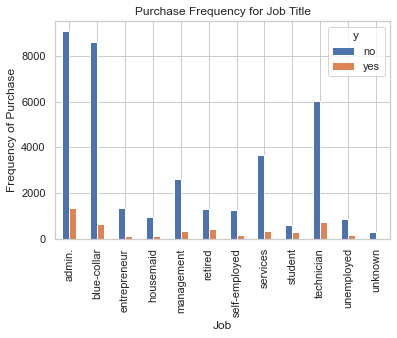

In [ ]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

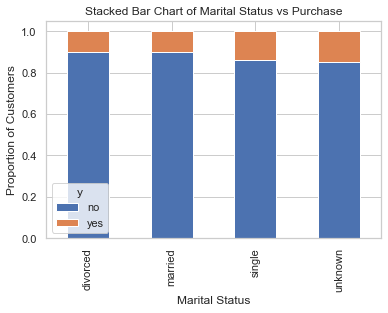

In [ ]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

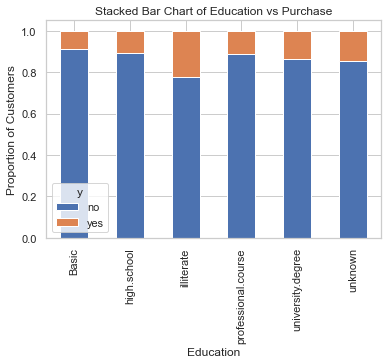

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

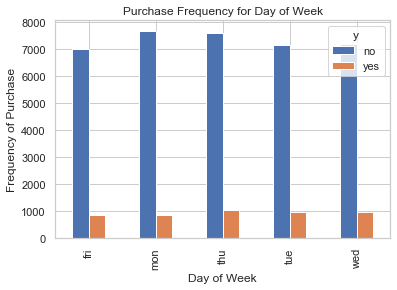

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome

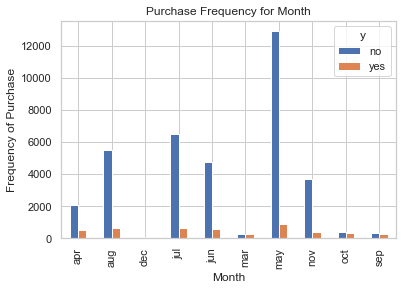

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

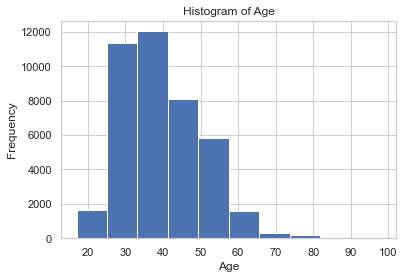

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

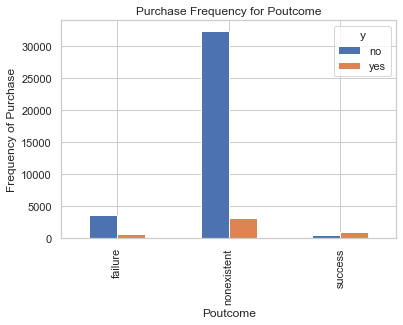

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

### Create dummy variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

### Feature Selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(estimator=logreg, n_features_to_select=18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False  True False  True  True  True False False
  True  True  True  True False False  True False False False  True False
  True]
[33 31  9 36  1 11 22 16  1 30 29  1  5 37 39  1 40  1  1 21 28 44 32 25
 10 42 19 14 41 13  6  2  1 18 43 35 38 23 12 34 24  1 20  1  1  1  4 15
  1  1  1  1 27 26  1  8  7  3  1 17  1]


In [ ]:
np.array(X)[rfe.support_]

array(['previous', 'euribor3m', 'job_blue-collar', 'job_retired',
       'job_services', 'job_student', 'default_no', 'contact_cellular',
       'month_apr', 'month_aug', 'month_dec', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'day_of_week_mon', 'poutcome_failure',
       'poutcome_success'], dtype='<U29')

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [ ]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

### Implementing the model

In [ ]:
!pip install --upgrade numpy statsmodels

     ---------------------------------------- 10.0/10.0 MB 2.4 MB/s eta 0:00:00
     ------------------------------------ 233.9/233.9 KB 493.8 kB/s eta 0:00:00
     ---------------------------------------- 53.5/53.5 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.3.6 requires packaging<22.0.0dev,>=14.3, but you have packaging 24.0 which is incompatible.
You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
!conda update numpy statsmodels

^C


In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y,X)
# result=logit_model.fit()
# print(result.summary())

The p-values for most of the variables are very small, therefore, most of them are significant to the model.

### Logistic Regression Model Fitting

In [ ]:
X

,previous,euribor3m,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,4.857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,4.857,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,4.857,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,4.857,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,1.028,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
41184,0,1.028,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
41185,0,1.028,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
41186,0,1.028,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### Predicting the test set results and caculating the accuracy

In [ ]:
set(y_pred)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize KFold with shuffle=True
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=7)

modelCV = LogisticRegression()
scoring = 'accuracy'

# Assuming X_train and y_train are already defined and preprocessed
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)

print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10838   131]
 [ 1137   251]]


The result is telling us that we have 10872+254 correct predictions and 1122+109 incorrect predictions.

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94     10969
         yes       0.66      0.18      0.28      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357



#### Interpretation: 

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer's preferred term deposit were promoted.

### ROC Curvefrom sklearn import metrics
from ggplot import *

prob = clf1.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(Y_test, prob)

df = pd.DataFrame(dict(fpr=fpr, sensitivity=sensitivity))
ggplot(df, aes(x='fpr', y='sensitivity')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
X_test

,previous,euribor3m,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
15500,0,4.957,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
29034,0,1.405,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
11199,0,4.961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
22247,0,4.963,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
27180,0,4.021,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20920,0,4.964,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
15744,0,4.960,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
34965,0,1.250,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4644,0,4.858,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
y_test[y_test=='yes'] = 1
y_test[y_test=='no'] = 0

In [ ]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
20920    0
15744    1
34965    0
4644     0
20742    1
Name: y, Length: 12357, dtype: object

In [ ]:
#X_test[X_test=='no'].sum()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
y_pred.sum()

382

In [ ]:
logreg.predict(X_test)

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
20920    0
15744    1
34965    0
4644     0
20742    1
Name: y, Length: 12357, dtype: int32

In [ ]:
y_test

15500    1
29034    0
11199    0
22247    0
27180    0
        ..
20920    0
15744    1
34965    0
4644     0
20742    1
Name: y, Length: 12357, dtype: object

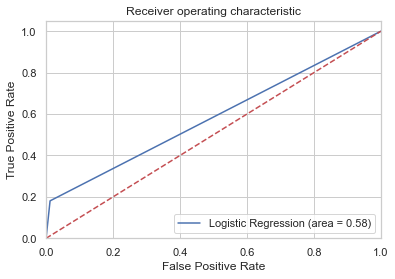

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred = logreg.predict(X_test)
y_pred[y_pred == 'no'] = 0
y_pred[y_pred == 'yes'] = 1
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)
logit_roc_auc = roc_auc_score(y_test.values, y_pred)
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])